In [1]:
import tensorflow as tf
from utils.data import *
from utils.lstm_rnn import *
import os
import pandas as pd
if not os.path.isdir("save"):
    os.mkdir("save")
##### config #####
save_dataset = False # 儲存dataset，true: 生成dataset、false: 使用save/ 儲存的
##### config #####

In [2]:

physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)
for i in range(len(physical_devices)):
    tf.config.experimental.set_memory_growth(physical_devices[i], enable=True)

repeat = 100
if save_dataset:
    X_raw, y = generate_dataset(repeat=repeat)
    X = tf.reshape(X_raw, [y.shape[0],3,60])
    np.save("save/X_raw.npy", X_raw.numpy())
    np.save("save/y.npy", y)
else:
    X_raw = np.load("save/X_raw.npy")
    y = np.load("save/y.npy")

X_raw = tf.convert_to_tensor(X_raw)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [151]:
X_raw.shape

TensorShape([28800000])

In [3]:
try_timesteps=[3,6,9]#list(range(3,18,3))
try_units=[100,200, 300]#[50,100,200,300,180]#list(range(10,200,20))
try_epochs=[150, 200,300]

"""
try_timesteps=[3]
try_units=[180]#list(range(10,200,20))
try_epochs=[150]
"""
df_all = pd.DataFrame([], columns=[["loss", "out_1_loss", "out_2_loss", "out_1_acc", "out_2_acc", "timesteps", "units", "epoch"]])
for timesteps in try_timesteps:
    for units in try_units:
        for epoch in try_epochs:
            X = tf.reshape(X_raw, [y.shape[0],timesteps,180//timesteps])
            train_dataset, val_dataset, test_dataset = split_dataset(X, y)
            
            model = construct_model(timesteps=timesteps, data_dim = 180//timesteps, units=units)
            model, history = compile_fit_model(model,epochs=epoch,train_dataset=train_dataset,val_dataset=val_dataset)
            model.save("saved_model/lstm-rnn-unit("+str(units)+")-timesteps("+str(timesteps)+")-epoch("+str(epoch)+")")
            results = model.evaluate(test_dataset)
            results.extend([timesteps, units, epoch])
            df = pd.DataFrame([results], columns=[["loss", "out_1_loss", "out_2_loss", "out_1_acc", "out_2_acc", "timesteps", "units", "epoch"]])
            df_all = df_all.append(df)
df_all.to_csv("save/result.csv")

112000 24000 24000
train: 112000
val: 24000
test: 24000
new train 112000
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 3, 60)]      0                                            
__________________________________________________________________________________________________
vfc_1_1 (LSTM)                  [(None, 3, 100), (No 64400       input_1[0][0]                    
__________________________________________________________________________________________________
vfc_1_2 (LSTM)                  [(None, 100), (None, 80400       vfc_1_1[0][0]                    
__________________________________________________________________________________________________
vfc_2_1 (LSTM)                  (None, 3, 100)       64400       input_1[0][0]                    
                     

28/28 [==============================] - 1s 26ms/step - loss: 0.1835 - out_1_loss: 0.1022 - out_2_loss: 0.0813 - out_1_acc: 0.9439 - out_2_acc: 0.9553 - val_loss: 0.1993 - val_out_1_loss: 0.1110 - val_out_2_loss: 0.0884 - val_out_1_acc: 0.9398 - val_out_2_acc: 0.9531
Epoch 21/150
28/28 [==============================] - 1s 26ms/step - loss: 0.1824 - out_1_loss: 0.1014 - out_2_loss: 0.0810 - out_1_acc: 0.9440 - out_2_acc: 0.9556 - val_loss: 0.1989 - val_out_1_loss: 0.1105 - val_out_2_loss: 0.0884 - val_out_1_acc: 0.9397 - val_out_2_acc: 0.9534
Epoch 22/150
28/28 [==============================] - 1s 26ms/step - loss: 0.1814 - out_1_loss: 0.1007 - out_2_loss: 0.0806 - out_1_acc: 0.9444 - out_2_acc: 0.9557 - val_loss: 0.1986 - val_out_1_loss: 0.1101 - val_out_2_loss: 0.0885 - val_out_1_acc: 0.9396 - val_out_2_acc: 0.9531
Epoch 23/150
28/28 [==============================] - 1s 25ms/step - loss: 0.1805 - out_1_loss: 0.1001 - out_2_loss: 0.0804 - out_1_acc: 0.9447 - out_2_acc: 0.9558 - val_

28/28 [==============================] - 1s 26ms/step - loss: 0.1563 - out_1_loss: 0.0889 - out_2_loss: 0.0673 - out_1_acc: 0.9509 - out_2_acc: 0.9638 - val_loss: 0.2070 - val_out_1_loss: 0.1112 - val_out_2_loss: 0.0958 - val_out_1_acc: 0.9400 - val_out_2_acc: 0.9534
Epoch 50/150
28/28 [==============================] - 1s 25ms/step - loss: 0.1550 - out_1_loss: 0.0885 - out_2_loss: 0.0665 - out_1_acc: 0.9515 - out_2_acc: 0.9644 - val_loss: 0.2073 - val_out_1_loss: 0.1114 - val_out_2_loss: 0.0958 - val_out_1_acc: 0.9400 - val_out_2_acc: 0.9540
Epoch 51/150
28/28 [==============================] - 1s 26ms/step - loss: 0.1539 - out_1_loss: 0.0881 - out_2_loss: 0.0658 - out_1_acc: 0.9516 - out_2_acc: 0.9649 - val_loss: 0.2084 - val_out_1_loss: 0.1116 - val_out_2_loss: 0.0968 - val_out_1_acc: 0.9401 - val_out_2_acc: 0.9530
Epoch 52/150
28/28 [==============================] - 1s 25ms/step - loss: 0.1522 - out_1_loss: 0.0876 - out_2_loss: 0.0646 - out_1_acc: 0.9521 - out_2_acc: 0.9657 - val_

28/28 [==============================] - 1s 26ms/step - loss: 0.1227 - out_1_loss: 0.0752 - out_2_loss: 0.0476 - out_1_acc: 0.9603 - out_2_acc: 0.9742 - val_loss: 0.2547 - val_out_1_loss: 0.1233 - val_out_2_loss: 0.1314 - val_out_1_acc: 0.9401 - val_out_2_acc: 0.9528
Epoch 79/150
28/28 [==============================] - 1s 26ms/step - loss: 0.1215 - out_1_loss: 0.0747 - out_2_loss: 0.0467 - out_1_acc: 0.9606 - out_2_acc: 0.9745 - val_loss: 0.2573 - val_out_1_loss: 0.1240 - val_out_2_loss: 0.1333 - val_out_1_acc: 0.9398 - val_out_2_acc: 0.9527
Epoch 80/150
28/28 [==============================] - 1s 25ms/step - loss: 0.1205 - out_1_loss: 0.0741 - out_2_loss: 0.0464 - out_1_acc: 0.9609 - out_2_acc: 0.9748 - val_loss: 0.2579 - val_out_1_loss: 0.1241 - val_out_2_loss: 0.1338 - val_out_1_acc: 0.9402 - val_out_2_acc: 0.9531
Epoch 81/150
28/28 [==============================] - 1s 26ms/step - loss: 0.1196 - out_1_loss: 0.0738 - out_2_loss: 0.0459 - out_1_acc: 0.9611 - out_2_acc: 0.9752 - val_

28/28 [==============================] - 1s 26ms/step - loss: 0.0996 - out_1_loss: 0.0629 - out_2_loss: 0.0367 - out_1_acc: 0.9673 - out_2_acc: 0.9810 - val_loss: 0.3058 - val_out_1_loss: 0.1405 - val_out_2_loss: 0.1653 - val_out_1_acc: 0.9404 - val_out_2_acc: 0.9515
Epoch 108/150
28/28 [==============================] - 1s 26ms/step - loss: 0.0991 - out_1_loss: 0.0626 - out_2_loss: 0.0365 - out_1_acc: 0.9676 - out_2_acc: 0.9816 - val_loss: 0.3058 - val_out_1_loss: 0.1403 - val_out_2_loss: 0.1655 - val_out_1_acc: 0.9401 - val_out_2_acc: 0.9523
Epoch 109/150
28/28 [==============================] - 1s 26ms/step - loss: 0.0981 - out_1_loss: 0.0621 - out_2_loss: 0.0360 - out_1_acc: 0.9677 - out_2_acc: 0.9818 - val_loss: 0.3078 - val_out_1_loss: 0.1409 - val_out_2_loss: 0.1669 - val_out_1_acc: 0.9411 - val_out_2_acc: 0.9514
Epoch 110/150
28/28 [==============================] - 1s 25ms/step - loss: 0.0978 - out_1_loss: 0.0615 - out_2_loss: 0.0364 - out_1_acc: 0.9682 - out_2_acc: 0.9818 - v

28/28 [==============================] - 1s 26ms/step - loss: 0.0858 - out_1_loss: 0.0554 - out_2_loss: 0.0303 - out_1_acc: 0.9723 - out_2_acc: 0.9854 - val_loss: 0.3578 - val_out_1_loss: 0.1643 - val_out_2_loss: 0.1936 - val_out_1_acc: 0.9405 - val_out_2_acc: 0.9517
Epoch 137/150
28/28 [==============================] - 1s 26ms/step - loss: 0.0851 - out_1_loss: 0.0547 - out_2_loss: 0.0304 - out_1_acc: 0.9725 - out_2_acc: 0.9852 - val_loss: 0.3559 - val_out_1_loss: 0.1648 - val_out_2_loss: 0.1911 - val_out_1_acc: 0.9411 - val_out_2_acc: 0.9517
Epoch 138/150
28/28 [==============================] - 1s 26ms/step - loss: 0.0841 - out_1_loss: 0.0543 - out_2_loss: 0.0298 - out_1_acc: 0.9729 - out_2_acc: 0.9857 - val_loss: 0.3564 - val_out_1_loss: 0.1642 - val_out_2_loss: 0.1922 - val_out_1_acc: 0.9408 - val_out_2_acc: 0.9518
Epoch 139/150
28/28 [==============================] - 1s 25ms/step - loss: 0.0849 - out_1_loss: 0.0545 - out_2_loss: 0.0304 - out_1_acc: 0.9728 - out_2_acc: 0.9856 - v

28/28 [==============================] - 1s 26ms/step - loss: 2.8541 - out_1_loss: 1.8742 - out_2_loss: 0.9800 - out_1_acc: 0.6183 - out_2_acc: 0.8207 - val_loss: 1.3382 - val_out_1_loss: 0.9533 - val_out_2_loss: 0.3848 - val_out_1_acc: 0.8097 - val_out_2_acc: 0.9323
Epoch 3/200
28/28 [==============================] - 1s 26ms/step - loss: 0.9294 - out_1_loss: 0.6568 - out_2_loss: 0.2726 - out_1_acc: 0.8846 - out_2_acc: 0.9484 - val_loss: 0.6748 - val_out_1_loss: 0.4622 - val_out_2_loss: 0.2126 - val_out_1_acc: 0.9168 - val_out_2_acc: 0.9491
Epoch 4/200
28/28 [==============================] - 1s 26ms/step - loss: 0.5614 - out_1_loss: 0.3898 - out_2_loss: 0.1716 - out_1_acc: 0.9242 - out_2_acc: 0.9517 - val_loss: 0.4832 - val_out_1_loss: 0.3236 - val_out_2_loss: 0.1595 - val_out_1_acc: 0.9306 - val_out_2_acc: 0.9494
Epoch 5/200
28/28 [==============================] - 1s 26ms/step - loss: 0.4159 - out_1_loss: 0.2790 - out_2_loss: 0.1369 - out_1_acc: 0.9342 - out_2_acc: 0.9518 - val_los

28/28 [==============================] - 1s 26ms/step - loss: 0.1745 - out_1_loss: 0.0966 - out_2_loss: 0.0779 - out_1_acc: 0.9463 - out_2_acc: 0.9574 - val_loss: 0.1980 - val_out_1_loss: 0.1081 - val_out_2_loss: 0.0899 - val_out_1_acc: 0.9404 - val_out_2_acc: 0.9511
Epoch 32/200
28/28 [==============================] - 1s 26ms/step - loss: 0.1737 - out_1_loss: 0.0962 - out_2_loss: 0.0775 - out_1_acc: 0.9466 - out_2_acc: 0.9577 - val_loss: 0.1983 - val_out_1_loss: 0.1081 - val_out_2_loss: 0.0902 - val_out_1_acc: 0.9404 - val_out_2_acc: 0.9519
Epoch 33/200
28/28 [==============================] - 1s 26ms/step - loss: 0.1729 - out_1_loss: 0.0958 - out_2_loss: 0.0771 - out_1_acc: 0.9465 - out_2_acc: 0.9579 - val_loss: 0.1984 - val_out_1_loss: 0.1081 - val_out_2_loss: 0.0904 - val_out_1_acc: 0.9405 - val_out_2_acc: 0.9515
Epoch 34/200
28/28 [==============================] - 1s 26ms/step - loss: 0.1720 - out_1_loss: 0.0955 - out_2_loss: 0.0766 - out_1_acc: 0.9469 - out_2_acc: 0.9587 - val_

28/28 [==============================] - 1s 26ms/step - loss: 0.1425 - out_1_loss: 0.0850 - out_2_loss: 0.0575 - out_1_acc: 0.9536 - out_2_acc: 0.9688 - val_loss: 0.2211 - val_out_1_loss: 0.1123 - val_out_2_loss: 0.1087 - val_out_1_acc: 0.9421 - val_out_2_acc: 0.9509
Epoch 61/200
28/28 [==============================] - 1s 26ms/step - loss: 0.1413 - out_1_loss: 0.0845 - out_2_loss: 0.0568 - out_1_acc: 0.9540 - out_2_acc: 0.9693 - val_loss: 0.2226 - val_out_1_loss: 0.1127 - val_out_2_loss: 0.1099 - val_out_1_acc: 0.9420 - val_out_2_acc: 0.9520
Epoch 62/200
28/28 [==============================] - 1s 26ms/step - loss: 0.1402 - out_1_loss: 0.0841 - out_2_loss: 0.0561 - out_1_acc: 0.9543 - out_2_acc: 0.9697 - val_loss: 0.2246 - val_out_1_loss: 0.1131 - val_out_2_loss: 0.1115 - val_out_1_acc: 0.9423 - val_out_2_acc: 0.9516
Epoch 63/200
28/28 [==============================] - 1s 26ms/step - loss: 0.1390 - out_1_loss: 0.0836 - out_2_loss: 0.0554 - out_1_acc: 0.9548 - out_2_acc: 0.9697 - val_

28/28 [==============================] - 1s 26ms/step - loss: 0.1131 - out_1_loss: 0.0704 - out_2_loss: 0.0426 - out_1_acc: 0.9632 - out_2_acc: 0.9771 - val_loss: 0.2752 - val_out_1_loss: 0.1283 - val_out_2_loss: 0.1469 - val_out_1_acc: 0.9421 - val_out_2_acc: 0.9522
Epoch 90/200
28/28 [==============================] - 1s 26ms/step - loss: 0.1121 - out_1_loss: 0.0698 - out_2_loss: 0.0423 - out_1_acc: 0.9633 - out_2_acc: 0.9773 - val_loss: 0.2766 - val_out_1_loss: 0.1286 - val_out_2_loss: 0.1480 - val_out_1_acc: 0.9417 - val_out_2_acc: 0.9523
Epoch 91/200
28/28 [==============================] - 1s 26ms/step - loss: 0.1113 - out_1_loss: 0.0693 - out_2_loss: 0.0421 - out_1_acc: 0.9640 - out_2_acc: 0.9772 - val_loss: 0.2830 - val_out_1_loss: 0.1300 - val_out_2_loss: 0.1530 - val_out_1_acc: 0.9409 - val_out_2_acc: 0.9521
Epoch 92/200
28/28 [==============================] - 1s 26ms/step - loss: 0.1108 - out_1_loss: 0.0691 - out_2_loss: 0.0417 - out_1_acc: 0.9638 - out_2_acc: 0.9777 - val_

28/28 [==============================] - 1s 26ms/step - loss: 0.0916 - out_1_loss: 0.0587 - out_2_loss: 0.0329 - out_1_acc: 0.9699 - out_2_acc: 0.9836 - val_loss: 0.3320 - val_out_1_loss: 0.1527 - val_out_2_loss: 0.1793 - val_out_1_acc: 0.9414 - val_out_2_acc: 0.9535
Epoch 119/200
28/28 [==============================] - 1s 27ms/step - loss: 0.0906 - out_1_loss: 0.0584 - out_2_loss: 0.0322 - out_1_acc: 0.9699 - out_2_acc: 0.9840 - val_loss: 0.3335 - val_out_1_loss: 0.1529 - val_out_2_loss: 0.1806 - val_out_1_acc: 0.9412 - val_out_2_acc: 0.9524
Epoch 120/200
28/28 [==============================] - 1s 26ms/step - loss: 0.0898 - out_1_loss: 0.0580 - out_2_loss: 0.0318 - out_1_acc: 0.9701 - out_2_acc: 0.9846 - val_loss: 0.3344 - val_out_1_loss: 0.1537 - val_out_2_loss: 0.1806 - val_out_1_acc: 0.9402 - val_out_2_acc: 0.9526
Epoch 121/200
28/28 [==============================] - 1s 27ms/step - loss: 0.0897 - out_1_loss: 0.0576 - out_2_loss: 0.0321 - out_1_acc: 0.9705 - out_2_acc: 0.9841 - v

28/28 [==============================] - 1s 26ms/step - loss: 0.0786 - out_1_loss: 0.0505 - out_2_loss: 0.0281 - out_1_acc: 0.9753 - out_2_acc: 0.9868 - val_loss: 0.3856 - val_out_1_loss: 0.1766 - val_out_2_loss: 0.2090 - val_out_1_acc: 0.9412 - val_out_2_acc: 0.9517
Epoch 148/200
28/28 [==============================] - 1s 26ms/step - loss: 0.0780 - out_1_loss: 0.0498 - out_2_loss: 0.0281 - out_1_acc: 0.9755 - out_2_acc: 0.9871 - val_loss: 0.3820 - val_out_1_loss: 0.1768 - val_out_2_loss: 0.2051 - val_out_1_acc: 0.9415 - val_out_2_acc: 0.9522
Epoch 149/200
28/28 [==============================] - 1s 26ms/step - loss: 0.0768 - out_1_loss: 0.0498 - out_2_loss: 0.0270 - out_1_acc: 0.9753 - out_2_acc: 0.9877 - val_loss: 0.3846 - val_out_1_loss: 0.1787 - val_out_2_loss: 0.2060 - val_out_1_acc: 0.9414 - val_out_2_acc: 0.9519
Epoch 150/200
28/28 [==============================] - 1s 26ms/step - loss: 0.0757 - out_1_loss: 0.0498 - out_2_loss: 0.0259 - out_1_acc: 0.9755 - out_2_acc: 0.9882 - v

28/28 [==============================] - 1s 26ms/step - loss: 0.0621 - out_1_loss: 0.0433 - out_2_loss: 0.0188 - out_1_acc: 0.9796 - out_2_acc: 0.9922 - val_loss: 0.4332 - val_out_1_loss: 0.1989 - val_out_2_loss: 0.2343 - val_out_1_acc: 0.9411 - val_out_2_acc: 0.9516
Epoch 177/200
28/28 [==============================] - 1s 26ms/step - loss: 0.0622 - out_1_loss: 0.0432 - out_2_loss: 0.0190 - out_1_acc: 0.9798 - out_2_acc: 0.9918 - val_loss: 0.4316 - val_out_1_loss: 0.2005 - val_out_2_loss: 0.2310 - val_out_1_acc: 0.9406 - val_out_2_acc: 0.9520
Epoch 178/200
28/28 [==============================] - 1s 26ms/step - loss: 0.0597 - out_1_loss: 0.0423 - out_2_loss: 0.0174 - out_1_acc: 0.9802 - out_2_acc: 0.9927 - val_loss: 0.4370 - val_out_1_loss: 0.2020 - val_out_2_loss: 0.2350 - val_out_1_acc: 0.9408 - val_out_2_acc: 0.9525
Epoch 179/200
28/28 [==============================] - 1s 26ms/step - loss: 0.0595 - out_1_loss: 0.0421 - out_2_loss: 0.0174 - out_1_acc: 0.9802 - out_2_acc: 0.9929 - v

Epoch 1/300
28/28 [==============================] - 2s 64ms/step - loss: 6.5632 - out_1_loss: 3.4074 - out_2_loss: 3.1559 - out_1_acc: 0.4188 - out_2_acc: 0.4612 - val_loss: 4.8774 - val_out_1_loss: 2.7725 - val_out_2_loss: 2.1050 - val_out_1_acc: 0.4777 - val_out_2_acc: 0.5786
Epoch 2/300
28/28 [==============================] - 1s 26ms/step - loss: 2.9026 - out_1_loss: 1.8256 - out_2_loss: 1.0769 - out_1_acc: 0.6249 - out_2_acc: 0.7966 - val_loss: 1.3755 - val_out_1_loss: 0.9788 - val_out_2_loss: 0.3967 - val_out_1_acc: 0.8009 - val_out_2_acc: 0.9329
Epoch 3/300
28/28 [==============================] - 1s 26ms/step - loss: 0.9537 - out_1_loss: 0.6797 - out_2_loss: 0.2740 - out_1_acc: 0.8764 - out_2_acc: 0.9493 - val_loss: 0.6807 - val_out_1_loss: 0.4747 - val_out_2_loss: 0.2060 - val_out_1_acc: 0.9090 - val_out_2_acc: 0.9495
Epoch 4/300
28/28 [==============================] - 1s 26ms/step - loss: 0.5655 - out_1_loss: 0.3967 - out_2_loss: 0.1687 - out_1_acc: 0.9241 - out_2_acc: 0.95

28/28 [==============================] - 1s 27ms/step - loss: 0.1755 - out_1_loss: 0.0973 - out_2_loss: 0.0782 - out_1_acc: 0.9456 - out_2_acc: 0.9570 - val_loss: 0.1980 - val_out_1_loss: 0.1084 - val_out_2_loss: 0.0896 - val_out_1_acc: 0.9393 - val_out_2_acc: 0.9529
Epoch 30/300
28/28 [==============================] - 1s 26ms/step - loss: 0.1748 - out_1_loss: 0.0969 - out_2_loss: 0.0779 - out_1_acc: 0.9460 - out_2_acc: 0.9573 - val_loss: 0.1980 - val_out_1_loss: 0.1083 - val_out_2_loss: 0.0897 - val_out_1_acc: 0.9393 - val_out_2_acc: 0.9533
Epoch 31/300
28/28 [==============================] - 1s 26ms/step - loss: 0.1740 - out_1_loss: 0.0965 - out_2_loss: 0.0775 - out_1_acc: 0.9463 - out_2_acc: 0.9578 - val_loss: 0.1982 - val_out_1_loss: 0.1082 - val_out_2_loss: 0.0900 - val_out_1_acc: 0.9396 - val_out_2_acc: 0.9521
Epoch 32/300
28/28 [==============================] - 1s 27ms/step - loss: 0.1733 - out_1_loss: 0.0961 - out_2_loss: 0.0772 - out_1_acc: 0.9465 - out_2_acc: 0.9576 - val_

28/28 [==============================] - 1s 26ms/step - loss: 0.1460 - out_1_loss: 0.0857 - out_2_loss: 0.0603 - out_1_acc: 0.9533 - out_2_acc: 0.9669 - val_loss: 0.2180 - val_out_1_loss: 0.1117 - val_out_2_loss: 0.1062 - val_out_1_acc: 0.9404 - val_out_2_acc: 0.9534
Epoch 59/300
28/28 [==============================] - 1s 26ms/step - loss: 0.1447 - out_1_loss: 0.0852 - out_2_loss: 0.0595 - out_1_acc: 0.9537 - out_2_acc: 0.9673 - val_loss: 0.2192 - val_out_1_loss: 0.1120 - val_out_2_loss: 0.1072 - val_out_1_acc: 0.9409 - val_out_2_acc: 0.9533
Epoch 60/300
28/28 [==============================] - 1s 27ms/step - loss: 0.1436 - out_1_loss: 0.0847 - out_2_loss: 0.0589 - out_1_acc: 0.9538 - out_2_acc: 0.9679 - val_loss: 0.2205 - val_out_1_loss: 0.1124 - val_out_2_loss: 0.1081 - val_out_1_acc: 0.9408 - val_out_2_acc: 0.9529
Epoch 61/300
28/28 [==============================] - 1s 26ms/step - loss: 0.1423 - out_1_loss: 0.0843 - out_2_loss: 0.0580 - out_1_acc: 0.9543 - out_2_acc: 0.9686 - val_

28/28 [==============================] - 1s 26ms/step - loss: 0.1153 - out_1_loss: 0.0712 - out_2_loss: 0.0442 - out_1_acc: 0.9627 - out_2_acc: 0.9759 - val_loss: 0.2756 - val_out_1_loss: 0.1273 - val_out_2_loss: 0.1483 - val_out_1_acc: 0.9415 - val_out_2_acc: 0.9530
Epoch 88/300
28/28 [==============================] - 1s 26ms/step - loss: 0.1148 - out_1_loss: 0.0706 - out_2_loss: 0.0442 - out_1_acc: 0.9630 - out_2_acc: 0.9759 - val_loss: 0.2781 - val_out_1_loss: 0.1280 - val_out_2_loss: 0.1501 - val_out_1_acc: 0.9414 - val_out_2_acc: 0.9521
Epoch 89/300
28/28 [==============================] - 1s 26ms/step - loss: 0.1139 - out_1_loss: 0.0702 - out_2_loss: 0.0437 - out_1_acc: 0.9630 - out_2_acc: 0.9763 - val_loss: 0.2796 - val_out_1_loss: 0.1287 - val_out_2_loss: 0.1510 - val_out_1_acc: 0.9416 - val_out_2_acc: 0.9522
Epoch 90/300
28/28 [==============================] - 1s 27ms/step - loss: 0.1130 - out_1_loss: 0.0697 - out_2_loss: 0.0434 - out_1_acc: 0.9636 - out_2_acc: 0.9764 - val_

28/28 [==============================] - 1s 26ms/step - loss: 0.0936 - out_1_loss: 0.0582 - out_2_loss: 0.0354 - out_1_acc: 0.9708 - out_2_acc: 0.9823 - val_loss: 0.3317 - val_out_1_loss: 0.1519 - val_out_2_loss: 0.1798 - val_out_1_acc: 0.9407 - val_out_2_acc: 0.9530
Epoch 117/300
28/28 [==============================] - 1s 27ms/step - loss: 0.0925 - out_1_loss: 0.0579 - out_2_loss: 0.0346 - out_1_acc: 0.9709 - out_2_acc: 0.9826 - val_loss: 0.3350 - val_out_1_loss: 0.1524 - val_out_2_loss: 0.1826 - val_out_1_acc: 0.9412 - val_out_2_acc: 0.9527
Epoch 118/300
28/28 [==============================] - 1s 26ms/step - loss: 0.0922 - out_1_loss: 0.0575 - out_2_loss: 0.0347 - out_1_acc: 0.9711 - out_2_acc: 0.9830 - val_loss: 0.3365 - val_out_1_loss: 0.1541 - val_out_2_loss: 0.1824 - val_out_1_acc: 0.9406 - val_out_2_acc: 0.9528
Epoch 119/300
28/28 [==============================] - 1s 27ms/step - loss: 0.0917 - out_1_loss: 0.0573 - out_2_loss: 0.0343 - out_1_acc: 0.9713 - out_2_acc: 0.9829 - v

28/28 [==============================] - 1s 26ms/step - loss: 0.0742 - out_1_loss: 0.0493 - out_2_loss: 0.0249 - out_1_acc: 0.9764 - out_2_acc: 0.9886 - val_loss: 0.3950 - val_out_1_loss: 0.1802 - val_out_2_loss: 0.2147 - val_out_1_acc: 0.9397 - val_out_2_acc: 0.9522
Epoch 146/300
28/28 [==============================] - 1s 26ms/step - loss: 0.0742 - out_1_loss: 0.0490 - out_2_loss: 0.0252 - out_1_acc: 0.9768 - out_2_acc: 0.9887 - val_loss: 0.4005 - val_out_1_loss: 0.1817 - val_out_2_loss: 0.2187 - val_out_1_acc: 0.9405 - val_out_2_acc: 0.9523
Epoch 147/300
28/28 [==============================] - 1s 27ms/step - loss: 0.0748 - out_1_loss: 0.0487 - out_2_loss: 0.0261 - out_1_acc: 0.9771 - out_2_acc: 0.9880 - val_loss: 0.4021 - val_out_1_loss: 0.1832 - val_out_2_loss: 0.2189 - val_out_1_acc: 0.9398 - val_out_2_acc: 0.9526
Epoch 148/300
28/28 [==============================] - 1s 26ms/step - loss: 0.0741 - out_1_loss: 0.0485 - out_2_loss: 0.0257 - out_1_acc: 0.9772 - out_2_acc: 0.9882 - v

28/28 [==============================] - 1s 26ms/step - loss: 0.0610 - out_1_loss: 0.0427 - out_2_loss: 0.0182 - out_1_acc: 0.9801 - out_2_acc: 0.9927 - val_loss: 0.4568 - val_out_1_loss: 0.2075 - val_out_2_loss: 0.2493 - val_out_1_acc: 0.9408 - val_out_2_acc: 0.9521
Epoch 175/300
28/28 [==============================] - 1s 27ms/step - loss: 0.0606 - out_1_loss: 0.0425 - out_2_loss: 0.0180 - out_1_acc: 0.9801 - out_2_acc: 0.9925 - val_loss: 0.4590 - val_out_1_loss: 0.2101 - val_out_2_loss: 0.2488 - val_out_1_acc: 0.9403 - val_out_2_acc: 0.9525
Epoch 176/300
28/28 [==============================] - 1s 26ms/step - loss: 0.0594 - out_1_loss: 0.0425 - out_2_loss: 0.0169 - out_1_acc: 0.9806 - out_2_acc: 0.9932 - val_loss: 0.4637 - val_out_1_loss: 0.2102 - val_out_2_loss: 0.2535 - val_out_1_acc: 0.9404 - val_out_2_acc: 0.9532
Epoch 177/300
28/28 [==============================] - 1s 26ms/step - loss: 0.0602 - out_1_loss: 0.0420 - out_2_loss: 0.0182 - out_1_acc: 0.9808 - out_2_acc: 0.9926 - v

Epoch 3/150
28/28 [==============================] - 1s 37ms/step - loss: 0.4954 - out_1_loss: 0.3457 - out_2_loss: 0.1498 - out_1_acc: 0.9276 - out_2_acc: 0.9517 - val_loss: 0.3861 - val_out_1_loss: 0.2506 - val_out_2_loss: 0.1355 - val_out_1_acc: 0.9380 - val_out_2_acc: 0.9507
Epoch 4/150
28/28 [==============================] - 1s 37ms/step - loss: 0.3168 - out_1_loss: 0.2002 - out_2_loss: 0.1166 - out_1_acc: 0.9382 - out_2_acc: 0.9520 - val_loss: 0.2811 - val_out_1_loss: 0.1660 - val_out_2_loss: 0.1150 - val_out_1_acc: 0.9388 - val_out_2_acc: 0.9512
Epoch 5/150
28/28 [==============================] - 1s 37ms/step - loss: 0.2475 - out_1_loss: 0.1445 - out_2_loss: 0.1031 - out_1_acc: 0.9395 - out_2_acc: 0.9523 - val_loss: 0.2445 - val_out_1_loss: 0.1394 - val_out_2_loss: 0.1051 - val_out_1_acc: 0.9392 - val_out_2_acc: 0.9510
Epoch 6/150
28/28 [==============================] - 1s 38ms/step - loss: 0.2229 - out_1_loss: 0.1270 - out_2_loss: 0.0959 - out_1_acc: 0.9403 - out_2_acc: 0.95

28/28 [==============================] - 1s 37ms/step - loss: 0.1612 - out_1_loss: 0.0922 - out_2_loss: 0.0689 - out_1_acc: 0.9482 - out_2_acc: 0.9608 - val_loss: 0.2070 - val_out_1_loss: 0.1113 - val_out_2_loss: 0.0957 - val_out_1_acc: 0.9400 - val_out_2_acc: 0.9519
Epoch 33/150
28/28 [==============================] - 1s 36ms/step - loss: 0.1592 - out_1_loss: 0.0916 - out_2_loss: 0.0676 - out_1_acc: 0.9486 - out_2_acc: 0.9614 - val_loss: 0.2071 - val_out_1_loss: 0.1114 - val_out_2_loss: 0.0957 - val_out_1_acc: 0.9400 - val_out_2_acc: 0.9526
Epoch 34/150
28/28 [==============================] - 1s 36ms/step - loss: 0.1574 - out_1_loss: 0.0910 - out_2_loss: 0.0664 - out_1_acc: 0.9488 - out_2_acc: 0.9621 - val_loss: 0.2086 - val_out_1_loss: 0.1116 - val_out_2_loss: 0.0970 - val_out_1_acc: 0.9403 - val_out_2_acc: 0.9526
Epoch 35/150
28/28 [==============================] - 1s 37ms/step - loss: 0.1556 - out_1_loss: 0.0903 - out_2_loss: 0.0653 - out_1_acc: 0.9494 - out_2_acc: 0.9628 - val_

28/28 [==============================] - 1s 37ms/step - loss: 0.1183 - out_1_loss: 0.0707 - out_2_loss: 0.0476 - out_1_acc: 0.9606 - out_2_acc: 0.9714 - val_loss: 0.2673 - val_out_1_loss: 0.1310 - val_out_2_loss: 0.1364 - val_out_1_acc: 0.9405 - val_out_2_acc: 0.9537
Epoch 62/150
28/28 [==============================] - 1s 37ms/step - loss: 0.1172 - out_1_loss: 0.0701 - out_2_loss: 0.0472 - out_1_acc: 0.9614 - out_2_acc: 0.9721 - val_loss: 0.2699 - val_out_1_loss: 0.1321 - val_out_2_loss: 0.1377 - val_out_1_acc: 0.9406 - val_out_2_acc: 0.9531
Epoch 63/150
28/28 [==============================] - 1s 37ms/step - loss: 0.1166 - out_1_loss: 0.0695 - out_2_loss: 0.0472 - out_1_acc: 0.9616 - out_2_acc: 0.9719 - val_loss: 0.2707 - val_out_1_loss: 0.1331 - val_out_2_loss: 0.1376 - val_out_1_acc: 0.9405 - val_out_2_acc: 0.9525
Epoch 64/150
28/28 [==============================] - 1s 37ms/step - loss: 0.1156 - out_1_loss: 0.0687 - out_2_loss: 0.0469 - out_1_acc: 0.9620 - out_2_acc: 0.9724 - val_

28/28 [==============================] - 1s 39ms/step - loss: 0.0954 - out_1_loss: 0.0557 - out_2_loss: 0.0397 - out_1_acc: 0.9704 - out_2_acc: 0.9788 - val_loss: 0.3216 - val_out_1_loss: 0.1589 - val_out_2_loss: 0.1628 - val_out_1_acc: 0.9418 - val_out_2_acc: 0.9521
Epoch 91/150
28/28 [==============================] - 1s 37ms/step - loss: 0.0945 - out_1_loss: 0.0555 - out_2_loss: 0.0390 - out_1_acc: 0.9708 - out_2_acc: 0.9793 - val_loss: 0.3244 - val_out_1_loss: 0.1621 - val_out_2_loss: 0.1623 - val_out_1_acc: 0.9420 - val_out_2_acc: 0.9513
Epoch 92/150
28/28 [==============================] - 1s 38ms/step - loss: 0.0946 - out_1_loss: 0.0556 - out_2_loss: 0.0390 - out_1_acc: 0.9705 - out_2_acc: 0.9797 - val_loss: 0.3254 - val_out_1_loss: 0.1620 - val_out_2_loss: 0.1634 - val_out_1_acc: 0.9412 - val_out_2_acc: 0.9519
Epoch 93/150
28/28 [==============================] - 1s 37ms/step - loss: 0.0927 - out_1_loss: 0.0548 - out_2_loss: 0.0379 - out_1_acc: 0.9711 - out_2_acc: 0.9802 - val_

28/28 [==============================] - 1s 37ms/step - loss: 0.0729 - out_1_loss: 0.0451 - out_2_loss: 0.0278 - out_1_acc: 0.9780 - out_2_acc: 0.9871 - val_loss: 0.3899 - val_out_1_loss: 0.1928 - val_out_2_loss: 0.1971 - val_out_1_acc: 0.9410 - val_out_2_acc: 0.9518
Epoch 120/150
28/28 [==============================] - 1s 38ms/step - loss: 0.0727 - out_1_loss: 0.0451 - out_2_loss: 0.0276 - out_1_acc: 0.9783 - out_2_acc: 0.9871 - val_loss: 0.3883 - val_out_1_loss: 0.1903 - val_out_2_loss: 0.1980 - val_out_1_acc: 0.9414 - val_out_2_acc: 0.9532
Epoch 121/150
28/28 [==============================] - 1s 37ms/step - loss: 0.0719 - out_1_loss: 0.0447 - out_2_loss: 0.0272 - out_1_acc: 0.9784 - out_2_acc: 0.9872 - val_loss: 0.3914 - val_out_1_loss: 0.1930 - val_out_2_loss: 0.1983 - val_out_1_acc: 0.9414 - val_out_2_acc: 0.9519
Epoch 122/150
28/28 [==============================] - 1s 37ms/step - loss: 0.0705 - out_1_loss: 0.0439 - out_2_loss: 0.0266 - out_1_acc: 0.9784 - out_2_acc: 0.9875 - v

28/28 [==============================] - 1s 38ms/step - loss: 0.0452 - out_1_loss: 0.0324 - out_2_loss: 0.0128 - out_1_acc: 0.9858 - out_2_acc: 0.9947 - val_loss: 0.4655 - val_out_1_loss: 0.2244 - val_out_2_loss: 0.2411 - val_out_1_acc: 0.9405 - val_out_2_acc: 0.9520
Epoch 149/150
28/28 [==============================] - 1s 37ms/step - loss: 0.0450 - out_1_loss: 0.0322 - out_2_loss: 0.0127 - out_1_acc: 0.9858 - out_2_acc: 0.9950 - val_loss: 0.4740 - val_out_1_loss: 0.2281 - val_out_2_loss: 0.2460 - val_out_1_acc: 0.9398 - val_out_2_acc: 0.9528
Epoch 150/150
28/28 [==============================] - 1s 37ms/step - loss: 0.0450 - out_1_loss: 0.0317 - out_2_loss: 0.0133 - out_1_acc: 0.9862 - out_2_acc: 0.9946 - val_loss: 0.4761 - val_out_1_loss: 0.2282 - val_out_2_loss: 0.2479 - val_out_1_acc: 0.9399 - val_out_2_acc: 0.9524
INFO:tensorflow:Assets written to: saved_model/lstm-rnn-unit(200)-timesteps(3)-epoch(150)/assets
6/6 [==============================] - 0s 16ms/step - loss: 0.4487 - ou

Epoch 16/200
28/28 [==============================] - 1s 37ms/step - loss: 0.1820 - out_1_loss: 0.1012 - out_2_loss: 0.0808 - out_1_acc: 0.9431 - out_2_acc: 0.9545 - val_loss: 0.1992 - val_out_1_loss: 0.1107 - val_out_2_loss: 0.0885 - val_out_1_acc: 0.9398 - val_out_2_acc: 0.9514
Epoch 17/200
28/28 [==============================] - 1s 37ms/step - loss: 0.1808 - out_1_loss: 0.1005 - out_2_loss: 0.0803 - out_1_acc: 0.9436 - out_2_acc: 0.9548 - val_loss: 0.1990 - val_out_1_loss: 0.1102 - val_out_2_loss: 0.0887 - val_out_1_acc: 0.9399 - val_out_2_acc: 0.9511
Epoch 18/200
28/28 [==============================] - 1s 37ms/step - loss: 0.1795 - out_1_loss: 0.0998 - out_2_loss: 0.0797 - out_1_acc: 0.9438 - out_2_acc: 0.9552 - val_loss: 0.1989 - val_out_1_loss: 0.1099 - val_out_2_loss: 0.0890 - val_out_1_acc: 0.9398 - val_out_2_acc: 0.9516
Epoch 19/200
28/28 [==============================] - 1s 37ms/step - loss: 0.1784 - out_1_loss: 0.0992 - out_2_loss: 0.0791 - out_1_acc: 0.9440 - out_2_acc: 

28/28 [==============================] - 1s 37ms/step - loss: 0.1377 - out_1_loss: 0.0833 - out_2_loss: 0.0544 - out_1_acc: 0.9534 - out_2_acc: 0.9672 - val_loss: 0.2302 - val_out_1_loss: 0.1155 - val_out_2_loss: 0.1147 - val_out_1_acc: 0.9413 - val_out_2_acc: 0.9528
Epoch 46/200
28/28 [==============================] - 1s 37ms/step - loss: 0.1365 - out_1_loss: 0.0825 - out_2_loss: 0.0540 - out_1_acc: 0.9536 - out_2_acc: 0.9679 - val_loss: 0.2327 - val_out_1_loss: 0.1160 - val_out_2_loss: 0.1167 - val_out_1_acc: 0.9410 - val_out_2_acc: 0.9526
Epoch 47/200
28/28 [==============================] - 1s 38ms/step - loss: 0.1353 - out_1_loss: 0.0817 - out_2_loss: 0.0536 - out_1_acc: 0.9541 - out_2_acc: 0.9679 - val_loss: 0.2381 - val_out_1_loss: 0.1165 - val_out_2_loss: 0.1216 - val_out_1_acc: 0.9415 - val_out_2_acc: 0.9531
Epoch 48/200
28/28 [==============================] - 1s 37ms/step - loss: 0.1343 - out_1_loss: 0.0808 - out_2_loss: 0.0534 - out_1_acc: 0.9548 - out_2_acc: 0.9682 - val_

28/28 [==============================] - 1s 37ms/step - loss: 0.1088 - out_1_loss: 0.0634 - out_2_loss: 0.0454 - out_1_acc: 0.9652 - out_2_acc: 0.9735 - val_loss: 0.2877 - val_out_1_loss: 0.1443 - val_out_2_loss: 0.1434 - val_out_1_acc: 0.9412 - val_out_2_acc: 0.9525
Epoch 75/200
28/28 [==============================] - 1s 37ms/step - loss: 0.1074 - out_1_loss: 0.0628 - out_2_loss: 0.0446 - out_1_acc: 0.9659 - out_2_acc: 0.9743 - val_loss: 0.2913 - val_out_1_loss: 0.1463 - val_out_2_loss: 0.1450 - val_out_1_acc: 0.9412 - val_out_2_acc: 0.9523
Epoch 76/200
28/28 [==============================] - 1s 37ms/step - loss: 0.1069 - out_1_loss: 0.0624 - out_2_loss: 0.0445 - out_1_acc: 0.9663 - out_2_acc: 0.9740 - val_loss: 0.2939 - val_out_1_loss: 0.1481 - val_out_2_loss: 0.1458 - val_out_1_acc: 0.9410 - val_out_2_acc: 0.9515
Epoch 77/200
28/28 [==============================] - 1s 37ms/step - loss: 0.1057 - out_1_loss: 0.0619 - out_2_loss: 0.0437 - out_1_acc: 0.9662 - out_2_acc: 0.9752 - val_

28/28 [==============================] - 1s 37ms/step - loss: 0.0846 - out_1_loss: 0.0502 - out_2_loss: 0.0344 - out_1_acc: 0.9742 - out_2_acc: 0.9822 - val_loss: 0.3481 - val_out_1_loss: 0.1772 - val_out_2_loss: 0.1709 - val_out_1_acc: 0.9417 - val_out_2_acc: 0.9529
Epoch 104/200
28/28 [==============================] - 1s 38ms/step - loss: 0.0844 - out_1_loss: 0.0500 - out_2_loss: 0.0344 - out_1_acc: 0.9746 - out_2_acc: 0.9826 - val_loss: 0.3477 - val_out_1_loss: 0.1776 - val_out_2_loss: 0.1701 - val_out_1_acc: 0.9416 - val_out_2_acc: 0.9513
Epoch 105/200
28/28 [==============================] - 1s 37ms/step - loss: 0.0839 - out_1_loss: 0.0490 - out_2_loss: 0.0349 - out_1_acc: 0.9753 - out_2_acc: 0.9823 - val_loss: 0.3558 - val_out_1_loss: 0.1814 - val_out_2_loss: 0.1744 - val_out_1_acc: 0.9409 - val_out_2_acc: 0.9523
Epoch 106/200
28/28 [==============================] - 1s 37ms/step - loss: 0.0832 - out_1_loss: 0.0486 - out_2_loss: 0.0346 - out_1_acc: 0.9756 - out_2_acc: 0.9826 - v

28/28 [==============================] - 1s 37ms/step - loss: 0.0699 - out_1_loss: 0.0435 - out_2_loss: 0.0264 - out_1_acc: 0.9792 - out_2_acc: 0.9882 - val_loss: 0.4169 - val_out_1_loss: 0.2108 - val_out_2_loss: 0.2061 - val_out_1_acc: 0.9410 - val_out_2_acc: 0.9536
Epoch 133/200
28/28 [==============================] - 1s 37ms/step - loss: 0.0675 - out_1_loss: 0.0420 - out_2_loss: 0.0255 - out_1_acc: 0.9799 - out_2_acc: 0.9882 - val_loss: 0.4107 - val_out_1_loss: 0.2093 - val_out_2_loss: 0.2014 - val_out_1_acc: 0.9403 - val_out_2_acc: 0.9539
Epoch 134/200
28/28 [==============================] - 1s 38ms/step - loss: 0.0639 - out_1_loss: 0.0402 - out_2_loss: 0.0237 - out_1_acc: 0.9813 - out_2_acc: 0.9893 - val_loss: 0.4136 - val_out_1_loss: 0.2096 - val_out_2_loss: 0.2040 - val_out_1_acc: 0.9406 - val_out_2_acc: 0.9532
Epoch 135/200
28/28 [==============================] - 1s 37ms/step - loss: 0.0631 - out_1_loss: 0.0405 - out_2_loss: 0.0226 - out_1_acc: 0.9816 - out_2_acc: 0.9902 - v

28/28 [==============================] - 1s 37ms/step - loss: 0.0295 - out_1_loss: 0.0227 - out_2_loss: 0.0068 - out_1_acc: 0.9910 - out_2_acc: 0.9976 - val_loss: 0.5188 - val_out_1_loss: 0.2575 - val_out_2_loss: 0.2613 - val_out_1_acc: 0.9411 - val_out_2_acc: 0.9530
Epoch 162/200
28/28 [==============================] - 1s 37ms/step - loss: 0.0295 - out_1_loss: 0.0220 - out_2_loss: 0.0075 - out_1_acc: 0.9911 - out_2_acc: 0.9973 - val_loss: 0.5252 - val_out_1_loss: 0.2624 - val_out_2_loss: 0.2629 - val_out_1_acc: 0.9407 - val_out_2_acc: 0.9533
Epoch 163/200
28/28 [==============================] - 1s 37ms/step - loss: 0.0299 - out_1_loss: 0.0220 - out_2_loss: 0.0079 - out_1_acc: 0.9911 - out_2_acc: 0.9971 - val_loss: 0.5301 - val_out_1_loss: 0.2665 - val_out_2_loss: 0.2636 - val_out_1_acc: 0.9406 - val_out_2_acc: 0.9532
Epoch 164/200
28/28 [==============================] - 1s 37ms/step - loss: 0.0275 - out_1_loss: 0.0212 - out_2_loss: 0.0064 - out_1_acc: 0.9921 - out_2_acc: 0.9979 - v

28/28 [==============================] - 1s 38ms/step - loss: 0.0192 - out_1_loss: 0.0150 - out_2_loss: 0.0042 - out_1_acc: 0.9945 - out_2_acc: 0.9986 - val_loss: 0.6381 - val_out_1_loss: 0.3313 - val_out_2_loss: 0.3067 - val_out_1_acc: 0.9385 - val_out_2_acc: 0.9519
Epoch 191/200
28/28 [==============================] - 1s 37ms/step - loss: 0.0197 - out_1_loss: 0.0155 - out_2_loss: 0.0042 - out_1_acc: 0.9944 - out_2_acc: 0.9985 - val_loss: 0.6403 - val_out_1_loss: 0.3355 - val_out_2_loss: 0.3048 - val_out_1_acc: 0.9388 - val_out_2_acc: 0.9518
Epoch 192/200
28/28 [==============================] - 1s 37ms/step - loss: 0.0218 - out_1_loss: 0.0168 - out_2_loss: 0.0050 - out_1_acc: 0.9938 - out_2_acc: 0.9982 - val_loss: 0.6425 - val_out_1_loss: 0.3401 - val_out_2_loss: 0.3023 - val_out_1_acc: 0.9390 - val_out_2_acc: 0.9519
Epoch 193/200
28/28 [==============================] - 1s 37ms/step - loss: 0.0213 - out_1_loss: 0.0154 - out_2_loss: 0.0059 - out_1_acc: 0.9942 - out_2_acc: 0.9980 - v

Epoch 8/300
28/28 [==============================] - 1s 37ms/step - loss: 0.2038 - out_1_loss: 0.1147 - out_2_loss: 0.0890 - out_1_acc: 0.9411 - out_2_acc: 0.9528 - val_loss: 0.2158 - val_out_1_loss: 0.1217 - val_out_2_loss: 0.0941 - val_out_1_acc: 0.9398 - val_out_2_acc: 0.9506
Epoch 9/300
28/28 [==============================] - 1s 37ms/step - loss: 0.1982 - out_1_loss: 0.1113 - out_2_loss: 0.0869 - out_1_acc: 0.9415 - out_2_acc: 0.9532 - val_loss: 0.2112 - val_out_1_loss: 0.1189 - val_out_2_loss: 0.0923 - val_out_1_acc: 0.9395 - val_out_2_acc: 0.9506
Epoch 10/300
28/28 [==============================] - 1s 37ms/step - loss: 0.1940 - out_1_loss: 0.1087 - out_2_loss: 0.0853 - out_1_acc: 0.9419 - out_2_acc: 0.9533 - val_loss: 0.2080 - val_out_1_loss: 0.1168 - val_out_2_loss: 0.0912 - val_out_1_acc: 0.9398 - val_out_2_acc: 0.9506
Epoch 11/300
28/28 [==============================] - 1s 37ms/step - loss: 0.1907 - out_1_loss: 0.1065 - out_2_loss: 0.0842 - out_1_acc: 0.9423 - out_2_acc: 0.

28/28 [==============================] - 1s 37ms/step - loss: 0.1484 - out_1_loss: 0.0882 - out_2_loss: 0.0602 - out_1_acc: 0.9502 - out_2_acc: 0.9643 - val_loss: 0.2153 - val_out_1_loss: 0.1129 - val_out_2_loss: 0.1025 - val_out_1_acc: 0.9407 - val_out_2_acc: 0.9515
Epoch 38/300
28/28 [==============================] - 1s 37ms/step - loss: 0.1467 - out_1_loss: 0.0876 - out_2_loss: 0.0592 - out_1_acc: 0.9506 - out_2_acc: 0.9648 - val_loss: 0.2176 - val_out_1_loss: 0.1136 - val_out_2_loss: 0.1040 - val_out_1_acc: 0.9411 - val_out_2_acc: 0.9510
Epoch 39/300
28/28 [==============================] - 1s 37ms/step - loss: 0.1450 - out_1_loss: 0.0868 - out_2_loss: 0.0582 - out_1_acc: 0.9512 - out_2_acc: 0.9652 - val_loss: 0.2191 - val_out_1_loss: 0.1138 - val_out_2_loss: 0.1053 - val_out_1_acc: 0.9409 - val_out_2_acc: 0.9520
Epoch 40/300
28/28 [==============================] - 1s 38ms/step - loss: 0.1431 - out_1_loss: 0.0861 - out_2_loss: 0.0570 - out_1_acc: 0.9514 - out_2_acc: 0.9654 - val_

28/28 [==============================] - 1s 37ms/step - loss: 0.1129 - out_1_loss: 0.0668 - out_2_loss: 0.0461 - out_1_acc: 0.9635 - out_2_acc: 0.9730 - val_loss: 0.2755 - val_out_1_loss: 0.1335 - val_out_2_loss: 0.1420 - val_out_1_acc: 0.9410 - val_out_2_acc: 0.9528
Epoch 67/300
28/28 [==============================] - 1s 37ms/step - loss: 0.1121 - out_1_loss: 0.0659 - out_2_loss: 0.0462 - out_1_acc: 0.9641 - out_2_acc: 0.9730 - val_loss: 0.2770 - val_out_1_loss: 0.1348 - val_out_2_loss: 0.1422 - val_out_1_acc: 0.9412 - val_out_2_acc: 0.9520
Epoch 68/300
28/28 [==============================] - 1s 37ms/step - loss: 0.1107 - out_1_loss: 0.0653 - out_2_loss: 0.0454 - out_1_acc: 0.9645 - out_2_acc: 0.9737 - val_loss: 0.2784 - val_out_1_loss: 0.1361 - val_out_2_loss: 0.1423 - val_out_1_acc: 0.9410 - val_out_2_acc: 0.9534
Epoch 69/300
28/28 [==============================] - 1s 37ms/step - loss: 0.1097 - out_1_loss: 0.0647 - out_2_loss: 0.0450 - out_1_acc: 0.9647 - out_2_acc: 0.9737 - val_

28/28 [==============================] - 1s 37ms/step - loss: 0.0882 - out_1_loss: 0.0525 - out_2_loss: 0.0357 - out_1_acc: 0.9728 - out_2_acc: 0.9816 - val_loss: 0.3377 - val_out_1_loss: 0.1653 - val_out_2_loss: 0.1725 - val_out_1_acc: 0.9414 - val_out_2_acc: 0.9521
Epoch 96/300
28/28 [==============================] - 1s 37ms/step - loss: 0.0873 - out_1_loss: 0.0522 - out_2_loss: 0.0351 - out_1_acc: 0.9731 - out_2_acc: 0.9821 - val_loss: 0.3377 - val_out_1_loss: 0.1667 - val_out_2_loss: 0.1710 - val_out_1_acc: 0.9415 - val_out_2_acc: 0.9520
Epoch 97/300
28/28 [==============================] - 1s 37ms/step - loss: 0.0868 - out_1_loss: 0.0520 - out_2_loss: 0.0348 - out_1_acc: 0.9733 - out_2_acc: 0.9821 - val_loss: 0.3438 - val_out_1_loss: 0.1681 - val_out_2_loss: 0.1757 - val_out_1_acc: 0.9414 - val_out_2_acc: 0.9523
Epoch 98/300
28/28 [==============================] - 1s 37ms/step - loss: 0.0886 - out_1_loss: 0.0520 - out_2_loss: 0.0366 - out_1_acc: 0.9732 - out_2_acc: 0.9811 - val_

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 3, 60)]      0                                            
__________________________________________________________________________________________________
vfc_1_1 (LSTM)                  [(None, 3, 300), (No 433200      input_7[0][0]                    
__________________________________________________________________________________________________
vfc_1_2 (LSTM)                  [(None, 300), (None, 721200      vfc_1_1[0][0]                    
__________________________________________________________________________________________________
vfc_2_1 (LSTM)                  (None, 3, 300)       433200      input_7[0][0]                    
                                                                 vfc_1_1[0][1]              

Epoch 20/150
28/28 [==============================] - 1s 53ms/step - loss: 0.1710 - out_1_loss: 0.0977 - out_2_loss: 0.0733 - out_1_acc: 0.9448 - out_2_acc: 0.9578 - val_loss: 0.2019 - val_out_1_loss: 0.1086 - val_out_2_loss: 0.0933 - val_out_1_acc: 0.9401 - val_out_2_acc: 0.9520
Epoch 21/150
28/28 [==============================] - 1s 53ms/step - loss: 0.1691 - out_1_loss: 0.0972 - out_2_loss: 0.0719 - out_1_acc: 0.9449 - out_2_acc: 0.9585 - val_loss: 0.2031 - val_out_1_loss: 0.1088 - val_out_2_loss: 0.0942 - val_out_1_acc: 0.9401 - val_out_2_acc: 0.9513
Epoch 22/150
28/28 [==============================] - 1s 53ms/step - loss: 0.1671 - out_1_loss: 0.0966 - out_2_loss: 0.0705 - out_1_acc: 0.9451 - out_2_acc: 0.9593 - val_loss: 0.2042 - val_out_1_loss: 0.1090 - val_out_2_loss: 0.0953 - val_out_1_acc: 0.9399 - val_out_2_acc: 0.9513
Epoch 23/150
28/28 [==============================] - 2s 54ms/step - loss: 0.1651 - out_1_loss: 0.0961 - out_2_loss: 0.0690 - out_1_acc: 0.9455 - out_2_acc: 

28/28 [==============================] - 1s 53ms/step - loss: 0.1234 - out_1_loss: 0.0735 - out_2_loss: 0.0499 - out_1_acc: 0.9582 - out_2_acc: 0.9691 - val_loss: 0.2560 - val_out_1_loss: 0.1274 - val_out_2_loss: 0.1286 - val_out_1_acc: 0.9394 - val_out_2_acc: 0.9509
Epoch 50/150
28/28 [==============================] - 2s 54ms/step - loss: 0.1218 - out_1_loss: 0.0723 - out_2_loss: 0.0495 - out_1_acc: 0.9589 - out_2_acc: 0.9696 - val_loss: 0.2576 - val_out_1_loss: 0.1285 - val_out_2_loss: 0.1291 - val_out_1_acc: 0.9391 - val_out_2_acc: 0.9510
Epoch 51/150
28/28 [==============================] - 1s 53ms/step - loss: 0.1205 - out_1_loss: 0.0715 - out_2_loss: 0.0491 - out_1_acc: 0.9598 - out_2_acc: 0.9696 - val_loss: 0.2605 - val_out_1_loss: 0.1309 - val_out_2_loss: 0.1296 - val_out_1_acc: 0.9399 - val_out_2_acc: 0.9520
Epoch 52/150
28/28 [==============================] - 2s 54ms/step - loss: 0.1196 - out_1_loss: 0.0709 - out_2_loss: 0.0487 - out_1_acc: 0.9599 - out_2_acc: 0.9702 - val_

28/28 [==============================] - 2s 54ms/step - loss: 0.0962 - out_1_loss: 0.0553 - out_2_loss: 0.0409 - out_1_acc: 0.9699 - out_2_acc: 0.9778 - val_loss: 0.3175 - val_out_1_loss: 0.1640 - val_out_2_loss: 0.1535 - val_out_1_acc: 0.9399 - val_out_2_acc: 0.9518
Epoch 79/150
28/28 [==============================] - 1s 53ms/step - loss: 0.0969 - out_1_loss: 0.0559 - out_2_loss: 0.0410 - out_1_acc: 0.9696 - out_2_acc: 0.9773 - val_loss: 0.3200 - val_out_1_loss: 0.1655 - val_out_2_loss: 0.1545 - val_out_1_acc: 0.9400 - val_out_2_acc: 0.9514
Epoch 80/150
28/28 [==============================] - 1s 53ms/step - loss: 0.0977 - out_1_loss: 0.0561 - out_2_loss: 0.0416 - out_1_acc: 0.9700 - out_2_acc: 0.9776 - val_loss: 0.3217 - val_out_1_loss: 0.1666 - val_out_2_loss: 0.1552 - val_out_1_acc: 0.9395 - val_out_2_acc: 0.9517
Epoch 81/150
28/28 [==============================] - 1s 53ms/step - loss: 0.0947 - out_1_loss: 0.0544 - out_2_loss: 0.0403 - out_1_acc: 0.9712 - out_2_acc: 0.9786 - val_

28/28 [==============================] - 1s 53ms/step - loss: 0.0729 - out_1_loss: 0.0446 - out_2_loss: 0.0283 - out_1_acc: 0.9787 - out_2_acc: 0.9870 - val_loss: 0.3838 - val_out_1_loss: 0.1980 - val_out_2_loss: 0.1858 - val_out_1_acc: 0.9405 - val_out_2_acc: 0.9532
Epoch 108/150
28/28 [==============================] - 1s 54ms/step - loss: 0.0723 - out_1_loss: 0.0443 - out_2_loss: 0.0280 - out_1_acc: 0.9787 - out_2_acc: 0.9867 - val_loss: 0.3892 - val_out_1_loss: 0.1973 - val_out_2_loss: 0.1920 - val_out_1_acc: 0.9420 - val_out_2_acc: 0.9538
Epoch 109/150
28/28 [==============================] - 2s 55ms/step - loss: 0.0713 - out_1_loss: 0.0443 - out_2_loss: 0.0270 - out_1_acc: 0.9784 - out_2_acc: 0.9876 - val_loss: 0.3967 - val_out_1_loss: 0.1988 - val_out_2_loss: 0.1979 - val_out_1_acc: 0.9414 - val_out_2_acc: 0.9530
Epoch 110/150
28/28 [==============================] - 1s 53ms/step - loss: 0.0731 - out_1_loss: 0.0451 - out_2_loss: 0.0279 - out_1_acc: 0.9780 - out_2_acc: 0.9869 - v

28/28 [==============================] - 2s 54ms/step - loss: 0.0317 - out_1_loss: 0.0223 - out_2_loss: 0.0094 - out_1_acc: 0.9912 - out_2_acc: 0.9965 - val_loss: 0.5122 - val_out_1_loss: 0.2531 - val_out_2_loss: 0.2591 - val_out_1_acc: 0.9393 - val_out_2_acc: 0.9510
Epoch 137/150
28/28 [==============================] - 2s 54ms/step - loss: 0.0283 - out_1_loss: 0.0205 - out_2_loss: 0.0078 - out_1_acc: 0.9924 - out_2_acc: 0.9970 - val_loss: 0.5219 - val_out_1_loss: 0.2590 - val_out_2_loss: 0.2628 - val_out_1_acc: 0.9398 - val_out_2_acc: 0.9514
Epoch 138/150
28/28 [==============================] - 2s 54ms/step - loss: 0.0268 - out_1_loss: 0.0199 - out_2_loss: 0.0069 - out_1_acc: 0.9921 - out_2_acc: 0.9975 - val_loss: 0.5241 - val_out_1_loss: 0.2607 - val_out_2_loss: 0.2634 - val_out_1_acc: 0.9398 - val_out_2_acc: 0.9531
Epoch 139/150
28/28 [==============================] - 1s 53ms/step - loss: 0.0252 - out_1_loss: 0.0193 - out_2_loss: 0.0059 - out_1_acc: 0.9928 - out_2_acc: 0.9979 - v

Epoch 4/200
28/28 [==============================] - 1s 53ms/step - loss: 0.2621 - out_1_loss: 0.1550 - out_2_loss: 0.1071 - out_1_acc: 0.9402 - out_2_acc: 0.9522 - val_loss: 0.2482 - val_out_1_loss: 0.1393 - val_out_2_loss: 0.1089 - val_out_1_acc: 0.9394 - val_out_2_acc: 0.9509
Epoch 5/200
28/28 [==============================] - 2s 54ms/step - loss: 0.2241 - out_1_loss: 0.1261 - out_2_loss: 0.0980 - out_1_acc: 0.9405 - out_2_acc: 0.9524 - val_loss: 0.2294 - val_out_1_loss: 0.1278 - val_out_2_loss: 0.1016 - val_out_1_acc: 0.9397 - val_out_2_acc: 0.9506
Epoch 6/200
28/28 [==============================] - 2s 54ms/step - loss: 0.2104 - out_1_loss: 0.1176 - out_2_loss: 0.0928 - out_1_acc: 0.9407 - out_2_acc: 0.9522 - val_loss: 0.2181 - val_out_1_loss: 0.1216 - val_out_2_loss: 0.0965 - val_out_1_acc: 0.9397 - val_out_2_acc: 0.9508
Epoch 7/200
28/28 [==============================] - 1s 53ms/step - loss: 0.2022 - out_1_loss: 0.1129 - out_2_loss: 0.0893 - out_1_acc: 0.9411 - out_2_acc: 0.95

28/28 [==============================] - 2s 54ms/step - loss: 0.1477 - out_1_loss: 0.0895 - out_2_loss: 0.0582 - out_1_acc: 0.9495 - out_2_acc: 0.9645 - val_loss: 0.2276 - val_out_1_loss: 0.1177 - val_out_2_loss: 0.1099 - val_out_1_acc: 0.9395 - val_out_2_acc: 0.9525
Epoch 34/200
28/28 [==============================] - 1s 53ms/step - loss: 0.1462 - out_1_loss: 0.0889 - out_2_loss: 0.0574 - out_1_acc: 0.9501 - out_2_acc: 0.9649 - val_loss: 0.2328 - val_out_1_loss: 0.1175 - val_out_2_loss: 0.1153 - val_out_1_acc: 0.9395 - val_out_2_acc: 0.9523
Epoch 35/200
28/28 [==============================] - 2s 54ms/step - loss: 0.1456 - out_1_loss: 0.0882 - out_2_loss: 0.0574 - out_1_acc: 0.9505 - out_2_acc: 0.9648 - val_loss: 0.2353 - val_out_1_loss: 0.1176 - val_out_2_loss: 0.1177 - val_out_1_acc: 0.9402 - val_out_2_acc: 0.9522
Epoch 36/200
28/28 [==============================] - 1s 53ms/step - loss: 0.1458 - out_1_loss: 0.0875 - out_2_loss: 0.0582 - out_1_acc: 0.9508 - out_2_acc: 0.9646 - val_

28/28 [==============================] - 2s 54ms/step - loss: 0.1122 - out_1_loss: 0.0646 - out_2_loss: 0.0476 - out_1_acc: 0.9635 - out_2_acc: 0.9716 - val_loss: 0.2816 - val_out_1_loss: 0.1456 - val_out_2_loss: 0.1359 - val_out_1_acc: 0.9402 - val_out_2_acc: 0.9537
Epoch 63/200
28/28 [==============================] - 1s 53ms/step - loss: 0.1106 - out_1_loss: 0.0643 - out_2_loss: 0.0463 - out_1_acc: 0.9634 - out_2_acc: 0.9725 - val_loss: 0.2870 - val_out_1_loss: 0.1484 - val_out_2_loss: 0.1385 - val_out_1_acc: 0.9404 - val_out_2_acc: 0.9531
Epoch 64/200
28/28 [==============================] - 1s 53ms/step - loss: 0.1105 - out_1_loss: 0.0640 - out_2_loss: 0.0466 - out_1_acc: 0.9638 - out_2_acc: 0.9726 - val_loss: 0.2882 - val_out_1_loss: 0.1488 - val_out_2_loss: 0.1393 - val_out_1_acc: 0.9405 - val_out_2_acc: 0.9530
Epoch 65/200
28/28 [==============================] - 1s 53ms/step - loss: 0.1102 - out_1_loss: 0.0637 - out_2_loss: 0.0465 - out_1_acc: 0.9641 - out_2_acc: 0.9727 - val_

28/28 [==============================] - 2s 55ms/step - loss: 0.0881 - out_1_loss: 0.0509 - out_2_loss: 0.0372 - out_1_acc: 0.9740 - out_2_acc: 0.9808 - val_loss: 0.3376 - val_out_1_loss: 0.1745 - val_out_2_loss: 0.1631 - val_out_1_acc: 0.9408 - val_out_2_acc: 0.9515
Epoch 92/200
28/28 [==============================] - 1s 54ms/step - loss: 0.0846 - out_1_loss: 0.0497 - out_2_loss: 0.0349 - out_1_acc: 0.9747 - out_2_acc: 0.9823 - val_loss: 0.3393 - val_out_1_loss: 0.1765 - val_out_2_loss: 0.1629 - val_out_1_acc: 0.9420 - val_out_2_acc: 0.9525
Epoch 93/200
28/28 [==============================] - 2s 55ms/step - loss: 0.0842 - out_1_loss: 0.0495 - out_2_loss: 0.0347 - out_1_acc: 0.9752 - out_2_acc: 0.9824 - val_loss: 0.3417 - val_out_1_loss: 0.1754 - val_out_2_loss: 0.1662 - val_out_1_acc: 0.9409 - val_out_2_acc: 0.9526
Epoch 94/200
28/28 [==============================] - 2s 55ms/step - loss: 0.0831 - out_1_loss: 0.0492 - out_2_loss: 0.0339 - out_1_acc: 0.9752 - out_2_acc: 0.9829 - val_

28/28 [==============================] - 1s 53ms/step - loss: 0.0655 - out_1_loss: 0.0396 - out_2_loss: 0.0259 - out_1_acc: 0.9816 - out_2_acc: 0.9884 - val_loss: 0.4156 - val_out_1_loss: 0.2101 - val_out_2_loss: 0.2054 - val_out_1_acc: 0.9401 - val_out_2_acc: 0.9524
Epoch 121/200
28/28 [==============================] - 2s 54ms/step - loss: 0.0600 - out_1_loss: 0.0378 - out_2_loss: 0.0222 - out_1_acc: 0.9831 - out_2_acc: 0.9902 - val_loss: 0.4217 - val_out_1_loss: 0.2086 - val_out_2_loss: 0.2131 - val_out_1_acc: 0.9410 - val_out_2_acc: 0.9526
Epoch 122/200
28/28 [==============================] - 1s 53ms/step - loss: 0.0605 - out_1_loss: 0.0374 - out_2_loss: 0.0231 - out_1_acc: 0.9834 - out_2_acc: 0.9901 - val_loss: 0.4170 - val_out_1_loss: 0.2103 - val_out_2_loss: 0.2067 - val_out_1_acc: 0.9406 - val_out_2_acc: 0.9540
Epoch 123/200
28/28 [==============================] - 1s 53ms/step - loss: 0.0582 - out_1_loss: 0.0361 - out_2_loss: 0.0221 - out_1_acc: 0.9839 - out_2_acc: 0.9902 - v

28/28 [==============================] - 1s 53ms/step - loss: 0.0238 - out_1_loss: 0.0182 - out_2_loss: 0.0056 - out_1_acc: 0.9930 - out_2_acc: 0.9980 - val_loss: 0.5462 - val_out_1_loss: 0.2699 - val_out_2_loss: 0.2763 - val_out_1_acc: 0.9403 - val_out_2_acc: 0.9531
Epoch 150/200
28/28 [==============================] - 2s 54ms/step - loss: 0.0220 - out_1_loss: 0.0161 - out_2_loss: 0.0058 - out_1_acc: 0.9940 - out_2_acc: 0.9980 - val_loss: 0.5621 - val_out_1_loss: 0.2749 - val_out_2_loss: 0.2872 - val_out_1_acc: 0.9412 - val_out_2_acc: 0.9518
Epoch 151/200
28/28 [==============================] - 2s 54ms/step - loss: 0.0207 - out_1_loss: 0.0152 - out_2_loss: 0.0056 - out_1_acc: 0.9945 - out_2_acc: 0.9980 - val_loss: 0.5629 - val_out_1_loss: 0.2776 - val_out_2_loss: 0.2853 - val_out_1_acc: 0.9407 - val_out_2_acc: 0.9525
Epoch 152/200
28/28 [==============================] - 2s 54ms/step - loss: 0.0182 - out_1_loss: 0.0140 - out_2_loss: 0.0042 - out_1_acc: 0.9949 - out_2_acc: 0.9986 - v

28/28 [==============================] - 2s 54ms/step - loss: 0.0131 - out_1_loss: 0.0101 - out_2_loss: 0.0031 - out_1_acc: 0.9964 - out_2_acc: 0.9990 - val_loss: 0.6654 - val_out_1_loss: 0.3404 - val_out_2_loss: 0.3250 - val_out_1_acc: 0.9398 - val_out_2_acc: 0.9517
Epoch 179/200
28/28 [==============================] - 2s 54ms/step - loss: 0.0118 - out_1_loss: 0.0094 - out_2_loss: 0.0024 - out_1_acc: 0.9968 - out_2_acc: 0.9992 - val_loss: 0.6712 - val_out_1_loss: 0.3424 - val_out_2_loss: 0.3288 - val_out_1_acc: 0.9403 - val_out_2_acc: 0.9525
Epoch 180/200
28/28 [==============================] - 2s 54ms/step - loss: 0.0121 - out_1_loss: 0.0095 - out_2_loss: 0.0026 - out_1_acc: 0.9967 - out_2_acc: 0.9992 - val_loss: 0.6688 - val_out_1_loss: 0.3329 - val_out_2_loss: 0.3359 - val_out_1_acc: 0.9412 - val_out_2_acc: 0.9515
INFO:tensorflow:Assets written to: saved_model/lstm-rnn-unit(300)-timesteps(3)-epoch(200)/assets
6/6 [==============================] - 0s 20ms/step - loss: 0.6563 - ou

Epoch 16/300
28/28 [==============================] - 1s 53ms/step - loss: 0.1780 - out_1_loss: 0.0997 - out_2_loss: 0.0783 - out_1_acc: 0.9431 - out_2_acc: 0.9557 - val_loss: 0.2029 - val_out_1_loss: 0.1116 - val_out_2_loss: 0.0913 - val_out_1_acc: 0.9388 - val_out_2_acc: 0.9514
Epoch 17/300
28/28 [==============================] - 1s 53ms/step - loss: 0.1763 - out_1_loss: 0.0990 - out_2_loss: 0.0773 - out_1_acc: 0.9434 - out_2_acc: 0.9562 - val_loss: 0.2033 - val_out_1_loss: 0.1116 - val_out_2_loss: 0.0916 - val_out_1_acc: 0.9388 - val_out_2_acc: 0.9517
Epoch 18/300
28/28 [==============================] - 1s 53ms/step - loss: 0.1747 - out_1_loss: 0.0984 - out_2_loss: 0.0763 - out_1_acc: 0.9436 - out_2_acc: 0.9566 - val_loss: 0.2039 - val_out_1_loss: 0.1116 - val_out_2_loss: 0.0923 - val_out_1_acc: 0.9392 - val_out_2_acc: 0.9507
Epoch 19/300
28/28 [==============================] - 2s 54ms/step - loss: 0.1729 - out_1_loss: 0.0977 - out_2_loss: 0.0752 - out_1_acc: 0.9443 - out_2_acc: 

28/28 [==============================] - 1s 53ms/step - loss: 0.1275 - out_1_loss: 0.0768 - out_2_loss: 0.0506 - out_1_acc: 0.9562 - out_2_acc: 0.9676 - val_loss: 0.2514 - val_out_1_loss: 0.1272 - val_out_2_loss: 0.1242 - val_out_1_acc: 0.9399 - val_out_2_acc: 0.9525
Epoch 46/300
28/28 [==============================] - 2s 54ms/step - loss: 0.1260 - out_1_loss: 0.0758 - out_2_loss: 0.0502 - out_1_acc: 0.9567 - out_2_acc: 0.9678 - val_loss: 0.2544 - val_out_1_loss: 0.1286 - val_out_2_loss: 0.1258 - val_out_1_acc: 0.9400 - val_out_2_acc: 0.9526
Epoch 47/300
28/28 [==============================] - 1s 53ms/step - loss: 0.1253 - out_1_loss: 0.0752 - out_2_loss: 0.0502 - out_1_acc: 0.9571 - out_2_acc: 0.9680 - val_loss: 0.2563 - val_out_1_loss: 0.1297 - val_out_2_loss: 0.1266 - val_out_1_acc: 0.9400 - val_out_2_acc: 0.9523
Epoch 48/300
28/28 [==============================] - 1s 53ms/step - loss: 0.1237 - out_1_loss: 0.0740 - out_2_loss: 0.0497 - out_1_acc: 0.9578 - out_2_acc: 0.9685 - val_

28/28 [==============================] - 1s 53ms/step - loss: 0.1011 - out_1_loss: 0.0580 - out_2_loss: 0.0431 - out_1_acc: 0.9674 - out_2_acc: 0.9755 - val_loss: 0.3028 - val_out_1_loss: 0.1594 - val_out_2_loss: 0.1434 - val_out_1_acc: 0.9405 - val_out_2_acc: 0.9529
Epoch 75/300
28/28 [==============================] - 1s 53ms/step - loss: 0.1005 - out_1_loss: 0.0575 - out_2_loss: 0.0429 - out_1_acc: 0.9682 - out_2_acc: 0.9759 - val_loss: 0.3029 - val_out_1_loss: 0.1589 - val_out_2_loss: 0.1440 - val_out_1_acc: 0.9401 - val_out_2_acc: 0.9535
Epoch 76/300
28/28 [==============================] - 1s 53ms/step - loss: 0.1000 - out_1_loss: 0.0569 - out_2_loss: 0.0431 - out_1_acc: 0.9684 - out_2_acc: 0.9761 - val_loss: 0.3075 - val_out_1_loss: 0.1621 - val_out_2_loss: 0.1454 - val_out_1_acc: 0.9408 - val_out_2_acc: 0.9532
Epoch 77/300
28/28 [==============================] - 2s 54ms/step - loss: 0.0998 - out_1_loss: 0.0567 - out_2_loss: 0.0431 - out_1_acc: 0.9688 - out_2_acc: 0.9757 - val_

28/28 [==============================] - 1s 53ms/step - loss: 0.0804 - out_1_loss: 0.0480 - out_2_loss: 0.0324 - out_1_acc: 0.9766 - out_2_acc: 0.9843 - val_loss: 0.3651 - val_out_1_loss: 0.1894 - val_out_2_loss: 0.1757 - val_out_1_acc: 0.9406 - val_out_2_acc: 0.9529
Epoch 104/300
28/28 [==============================] - 2s 55ms/step - loss: 0.0779 - out_1_loss: 0.0474 - out_2_loss: 0.0305 - out_1_acc: 0.9764 - out_2_acc: 0.9850 - val_loss: 0.3759 - val_out_1_loss: 0.1953 - val_out_2_loss: 0.1806 - val_out_1_acc: 0.9412 - val_out_2_acc: 0.9526
Epoch 105/300
28/28 [==============================] - 1s 53ms/step - loss: 0.0759 - out_1_loss: 0.0461 - out_2_loss: 0.0299 - out_1_acc: 0.9774 - out_2_acc: 0.9857 - val_loss: 0.3755 - val_out_1_loss: 0.1956 - val_out_2_loss: 0.1799 - val_out_1_acc: 0.9411 - val_out_2_acc: 0.9523
Epoch 106/300
28/28 [==============================] - 1s 53ms/step - loss: 0.0771 - out_1_loss: 0.0457 - out_2_loss: 0.0314 - out_1_acc: 0.9774 - out_2_acc: 0.9848 - v

28/28 [==============================] - 2s 54ms/step - loss: 0.0378 - out_1_loss: 0.0263 - out_2_loss: 0.0114 - out_1_acc: 0.9887 - out_2_acc: 0.9953 - val_loss: 0.4750 - val_out_1_loss: 0.2421 - val_out_2_loss: 0.2328 - val_out_1_acc: 0.9415 - val_out_2_acc: 0.9534
Epoch 133/300
28/28 [==============================] - 2s 54ms/step - loss: 0.0377 - out_1_loss: 0.0262 - out_2_loss: 0.0115 - out_1_acc: 0.9886 - out_2_acc: 0.9956 - val_loss: 0.4790 - val_out_1_loss: 0.2469 - val_out_2_loss: 0.2320 - val_out_1_acc: 0.9402 - val_out_2_acc: 0.9536
Epoch 134/300
28/28 [==============================] - 1s 53ms/step - loss: 0.0386 - out_1_loss: 0.0262 - out_2_loss: 0.0124 - out_1_acc: 0.9888 - out_2_acc: 0.9950 - val_loss: 0.4856 - val_out_1_loss: 0.2461 - val_out_2_loss: 0.2395 - val_out_1_acc: 0.9406 - val_out_2_acc: 0.9532
Epoch 135/300
28/28 [==============================] - 2s 54ms/step - loss: 0.0380 - out_1_loss: 0.0254 - out_2_loss: 0.0126 - out_1_acc: 0.9893 - out_2_acc: 0.9951 - v

28/28 [==============================] - 2s 54ms/step - loss: 0.0149 - out_1_loss: 0.0117 - out_2_loss: 0.0032 - out_1_acc: 0.9959 - out_2_acc: 0.9989 - val_loss: 0.6149 - val_out_1_loss: 0.3297 - val_out_2_loss: 0.2851 - val_out_1_acc: 0.9417 - val_out_2_acc: 0.9531
Epoch 162/300
28/28 [==============================] - 1s 53ms/step - loss: 0.0137 - out_1_loss: 0.0106 - out_2_loss: 0.0031 - out_1_acc: 0.9963 - out_2_acc: 0.9990 - val_loss: 0.6046 - val_out_1_loss: 0.3216 - val_out_2_loss: 0.2830 - val_out_1_acc: 0.9410 - val_out_2_acc: 0.9540
Epoch 163/300
28/28 [==============================] - 2s 54ms/step - loss: 0.0145 - out_1_loss: 0.0110 - out_2_loss: 0.0035 - out_1_acc: 0.9962 - out_2_acc: 0.9988 - val_loss: 0.6355 - val_out_1_loss: 0.3403 - val_out_2_loss: 0.2952 - val_out_1_acc: 0.9403 - val_out_2_acc: 0.9530
Epoch 164/300
28/28 [==============================] - 1s 54ms/step - loss: 0.0146 - out_1_loss: 0.0115 - out_2_loss: 0.0031 - out_1_acc: 0.9960 - out_2_acc: 0.9988 - v

28/28 [==============================] - 2s 70ms/step - loss: 6.5640 - out_1_loss: 3.3505 - out_2_loss: 3.2135 - out_1_acc: 0.3316 - out_2_acc: 0.3541 - val_loss: 5.1549 - val_out_1_loss: 2.6906 - val_out_2_loss: 2.4644 - val_out_1_acc: 0.3853 - val_out_2_acc: 0.4100
Epoch 2/150
28/28 [==============================] - 1s 31ms/step - loss: 4.2038 - out_1_loss: 2.2165 - out_2_loss: 1.9873 - out_1_acc: 0.4792 - out_2_acc: 0.5139 - val_loss: 3.3119 - val_out_1_loss: 1.8265 - val_out_2_loss: 1.4854 - val_out_1_acc: 0.5420 - val_out_2_acc: 0.6345
Epoch 3/150
28/28 [==============================] - 1s 32ms/step - loss: 2.4862 - out_1_loss: 1.4396 - out_2_loss: 1.0466 - out_1_acc: 0.6434 - out_2_acc: 0.7511 - val_loss: 1.7189 - val_out_1_loss: 1.0354 - val_out_2_loss: 0.6834 - val_out_1_acc: 0.7573 - val_out_2_acc: 0.8518
Epoch 4/150
28/28 [==============================] - 1s 32ms/step - loss: 1.2808 - out_1_loss: 0.7860 - out_2_loss: 0.4948 - out_1_acc: 0.8200 - out_2_acc: 0.8958 - val_los

28/28 [==============================] - 1s 31ms/step - loss: 0.1755 - out_1_loss: 0.0976 - out_2_loss: 0.0779 - out_1_acc: 0.9455 - out_2_acc: 0.9574 - val_loss: 0.1975 - val_out_1_loss: 0.1062 - val_out_2_loss: 0.0913 - val_out_1_acc: 0.9398 - val_out_2_acc: 0.9519
Epoch 30/150
28/28 [==============================] - 1s 32ms/step - loss: 0.1746 - out_1_loss: 0.0973 - out_2_loss: 0.0774 - out_1_acc: 0.9454 - out_2_acc: 0.9575 - val_loss: 0.1966 - val_out_1_loss: 0.1061 - val_out_2_loss: 0.0905 - val_out_1_acc: 0.9398 - val_out_2_acc: 0.9531
Epoch 31/150
28/28 [==============================] - 1s 31ms/step - loss: 0.1739 - out_1_loss: 0.0970 - out_2_loss: 0.0769 - out_1_acc: 0.9456 - out_2_acc: 0.9579 - val_loss: 0.1972 - val_out_1_loss: 0.1061 - val_out_2_loss: 0.0911 - val_out_1_acc: 0.9390 - val_out_2_acc: 0.9518
Epoch 32/150
28/28 [==============================] - 1s 33ms/step - loss: 0.1731 - out_1_loss: 0.0967 - out_2_loss: 0.0764 - out_1_acc: 0.9460 - out_2_acc: 0.9582 - val_

28/28 [==============================] - 1s 32ms/step - loss: 0.1591 - out_1_loss: 0.0910 - out_2_loss: 0.0681 - out_1_acc: 0.9489 - out_2_acc: 0.9622 - val_loss: 0.2071 - val_out_1_loss: 0.1088 - val_out_2_loss: 0.0983 - val_out_1_acc: 0.9390 - val_out_2_acc: 0.9523
Epoch 59/150
28/28 [==============================] - 1s 31ms/step - loss: 0.1605 - out_1_loss: 0.0909 - out_2_loss: 0.0696 - out_1_acc: 0.9488 - out_2_acc: 0.9616 - val_loss: 0.2092 - val_out_1_loss: 0.1095 - val_out_2_loss: 0.0997 - val_out_1_acc: 0.9396 - val_out_2_acc: 0.9532
Epoch 60/150
28/28 [==============================] - 1s 32ms/step - loss: 0.1618 - out_1_loss: 0.0910 - out_2_loss: 0.0707 - out_1_acc: 0.9488 - out_2_acc: 0.9608 - val_loss: 0.2108 - val_out_1_loss: 0.1101 - val_out_2_loss: 0.1007 - val_out_1_acc: 0.9383 - val_out_2_acc: 0.9532
Epoch 61/150
28/28 [==============================] - 1s 31ms/step - loss: 0.1605 - out_1_loss: 0.0912 - out_2_loss: 0.0693 - out_1_acc: 0.9487 - out_2_acc: 0.9617 - val_

28/28 [==============================] - 1s 32ms/step - loss: 0.1435 - out_1_loss: 0.0857 - out_2_loss: 0.0578 - out_1_acc: 0.9522 - out_2_acc: 0.9674 - val_loss: 0.2369 - val_out_1_loss: 0.1161 - val_out_2_loss: 0.1207 - val_out_1_acc: 0.9385 - val_out_2_acc: 0.9525
Epoch 88/150
28/28 [==============================] - 1s 31ms/step - loss: 0.1428 - out_1_loss: 0.0854 - out_2_loss: 0.0574 - out_1_acc: 0.9522 - out_2_acc: 0.9675 - val_loss: 0.2380 - val_out_1_loss: 0.1172 - val_out_2_loss: 0.1208 - val_out_1_acc: 0.9392 - val_out_2_acc: 0.9534
Epoch 89/150
28/28 [==============================] - 1s 32ms/step - loss: 0.1427 - out_1_loss: 0.0852 - out_2_loss: 0.0575 - out_1_acc: 0.9526 - out_2_acc: 0.9673 - val_loss: 0.2394 - val_out_1_loss: 0.1176 - val_out_2_loss: 0.1218 - val_out_1_acc: 0.9391 - val_out_2_acc: 0.9525
Epoch 90/150
28/28 [==============================] - 1s 32ms/step - loss: 0.1415 - out_1_loss: 0.0852 - out_2_loss: 0.0563 - out_1_acc: 0.9523 - out_2_acc: 0.9681 - val_

28/28 [==============================] - 1s 32ms/step - loss: 0.1235 - out_1_loss: 0.0762 - out_2_loss: 0.0473 - out_1_acc: 0.9582 - out_2_acc: 0.9737 - val_loss: 0.2688 - val_out_1_loss: 0.1246 - val_out_2_loss: 0.1442 - val_out_1_acc: 0.9404 - val_out_2_acc: 0.9513
Epoch 117/150
28/28 [==============================] - 1s 32ms/step - loss: 0.1225 - out_1_loss: 0.0757 - out_2_loss: 0.0468 - out_1_acc: 0.9584 - out_2_acc: 0.9738 - val_loss: 0.2717 - val_out_1_loss: 0.1247 - val_out_2_loss: 0.1470 - val_out_1_acc: 0.9399 - val_out_2_acc: 0.9521
Epoch 118/150
28/28 [==============================] - 1s 31ms/step - loss: 0.1220 - out_1_loss: 0.0754 - out_2_loss: 0.0466 - out_1_acc: 0.9588 - out_2_acc: 0.9739 - val_loss: 0.2737 - val_out_1_loss: 0.1254 - val_out_2_loss: 0.1483 - val_out_1_acc: 0.9405 - val_out_2_acc: 0.9524
Epoch 119/150
28/28 [==============================] - 1s 32ms/step - loss: 0.1223 - out_1_loss: 0.0753 - out_2_loss: 0.0470 - out_1_acc: 0.9584 - out_2_acc: 0.9741 - v

28/28 [==============================] - 1s 31ms/step - loss: 0.1080 - out_1_loss: 0.0686 - out_2_loss: 0.0394 - out_1_acc: 0.9633 - out_2_acc: 0.9793 - val_loss: 0.3082 - val_out_1_loss: 0.1419 - val_out_2_loss: 0.1663 - val_out_1_acc: 0.9398 - val_out_2_acc: 0.9513
Epoch 146/150
28/28 [==============================] - 1s 31ms/step - loss: 0.1074 - out_1_loss: 0.0680 - out_2_loss: 0.0393 - out_1_acc: 0.9634 - out_2_acc: 0.9793 - val_loss: 0.3133 - val_out_1_loss: 0.1440 - val_out_2_loss: 0.1693 - val_out_1_acc: 0.9390 - val_out_2_acc: 0.9515
Epoch 147/150
28/28 [==============================] - 1s 31ms/step - loss: 0.1071 - out_1_loss: 0.0676 - out_2_loss: 0.0395 - out_1_acc: 0.9637 - out_2_acc: 0.9794 - val_loss: 0.3113 - val_out_1_loss: 0.1415 - val_out_2_loss: 0.1698 - val_out_1_acc: 0.9396 - val_out_2_acc: 0.9518
Epoch 148/150
28/28 [==============================] - 1s 32ms/step - loss: 0.1074 - out_1_loss: 0.0675 - out_2_loss: 0.0399 - out_1_acc: 0.9635 - out_2_acc: 0.9789 - v

Epoch 13/200
28/28 [==============================] - 1s 31ms/step - loss: 0.2119 - out_1_loss: 0.1199 - out_2_loss: 0.0919 - out_1_acc: 0.9417 - out_2_acc: 0.9542 - val_loss: 0.2268 - val_out_1_loss: 0.1236 - val_out_2_loss: 0.1032 - val_out_1_acc: 0.9408 - val_out_2_acc: 0.9505
Epoch 14/200
28/28 [==============================] - 1s 32ms/step - loss: 0.2046 - out_1_loss: 0.1152 - out_2_loss: 0.0893 - out_1_acc: 0.9417 - out_2_acc: 0.9543 - val_loss: 0.2202 - val_out_1_loss: 0.1192 - val_out_2_loss: 0.1010 - val_out_1_acc: 0.9404 - val_out_2_acc: 0.9505
Epoch 15/200
28/28 [==============================] - 1s 31ms/step - loss: 0.1993 - out_1_loss: 0.1117 - out_2_loss: 0.0875 - out_1_acc: 0.9422 - out_2_acc: 0.9548 - val_loss: 0.2150 - val_out_1_loss: 0.1162 - val_out_2_loss: 0.0988 - val_out_1_acc: 0.9402 - val_out_2_acc: 0.9503
Epoch 16/200
28/28 [==============================] - 1s 31ms/step - loss: 0.1952 - out_1_loss: 0.1090 - out_2_loss: 0.0862 - out_1_acc: 0.9426 - out_2_acc: 

28/28 [==============================] - 1s 31ms/step - loss: 0.1666 - out_1_loss: 0.0943 - out_2_loss: 0.0724 - out_1_acc: 0.9475 - out_2_acc: 0.9607 - val_loss: 0.2063 - val_out_1_loss: 0.1071 - val_out_2_loss: 0.0992 - val_out_1_acc: 0.9403 - val_out_2_acc: 0.9520
Epoch 43/200
28/28 [==============================] - 1s 31ms/step - loss: 0.1661 - out_1_loss: 0.0941 - out_2_loss: 0.0720 - out_1_acc: 0.9478 - out_2_acc: 0.9608 - val_loss: 0.2067 - val_out_1_loss: 0.1067 - val_out_2_loss: 0.1000 - val_out_1_acc: 0.9403 - val_out_2_acc: 0.9521
Epoch 44/200
28/28 [==============================] - 1s 32ms/step - loss: 0.1659 - out_1_loss: 0.0939 - out_2_loss: 0.0720 - out_1_acc: 0.9478 - out_2_acc: 0.9605 - val_loss: 0.2070 - val_out_1_loss: 0.1072 - val_out_2_loss: 0.0998 - val_out_1_acc: 0.9406 - val_out_2_acc: 0.9525
Epoch 45/200
28/28 [==============================] - 1s 31ms/step - loss: 0.1654 - out_1_loss: 0.0937 - out_2_loss: 0.0717 - out_1_acc: 0.9477 - out_2_acc: 0.9606 - val_

28/28 [==============================] - 1s 32ms/step - loss: 0.1472 - out_1_loss: 0.0874 - out_2_loss: 0.0598 - out_1_acc: 0.9513 - out_2_acc: 0.9673 - val_loss: 0.2268 - val_out_1_loss: 0.1128 - val_out_2_loss: 0.1140 - val_out_1_acc: 0.9390 - val_out_2_acc: 0.9510
Epoch 72/200
28/28 [==============================] - 1s 31ms/step - loss: 0.1470 - out_1_loss: 0.0873 - out_2_loss: 0.0597 - out_1_acc: 0.9513 - out_2_acc: 0.9664 - val_loss: 0.2280 - val_out_1_loss: 0.1131 - val_out_2_loss: 0.1149 - val_out_1_acc: 0.9410 - val_out_2_acc: 0.9512
Epoch 73/200
28/28 [==============================] - 1s 31ms/step - loss: 0.1468 - out_1_loss: 0.0872 - out_2_loss: 0.0596 - out_1_acc: 0.9515 - out_2_acc: 0.9668 - val_loss: 0.2292 - val_out_1_loss: 0.1129 - val_out_2_loss: 0.1163 - val_out_1_acc: 0.9408 - val_out_2_acc: 0.9516
Epoch 74/200
28/28 [==============================] - 1s 32ms/step - loss: 0.1456 - out_1_loss: 0.0867 - out_2_loss: 0.0589 - out_1_acc: 0.9518 - out_2_acc: 0.9665 - val_

28/28 [==============================] - 1s 31ms/step - loss: 0.1317 - out_1_loss: 0.0806 - out_2_loss: 0.0510 - out_1_acc: 0.9548 - out_2_acc: 0.9706 - val_loss: 0.2468 - val_out_1_loss: 0.1188 - val_out_2_loss: 0.1280 - val_out_1_acc: 0.9415 - val_out_2_acc: 0.9513
Epoch 101/200
28/28 [==============================] - 1s 31ms/step - loss: 0.1305 - out_1_loss: 0.0803 - out_2_loss: 0.0503 - out_1_acc: 0.9554 - out_2_acc: 0.9715 - val_loss: 0.2456 - val_out_1_loss: 0.1186 - val_out_2_loss: 0.1270 - val_out_1_acc: 0.9405 - val_out_2_acc: 0.9511
Epoch 102/200
28/28 [==============================] - 1s 32ms/step - loss: 0.1292 - out_1_loss: 0.0795 - out_2_loss: 0.0497 - out_1_acc: 0.9563 - out_2_acc: 0.9716 - val_loss: 0.2468 - val_out_1_loss: 0.1192 - val_out_2_loss: 0.1277 - val_out_1_acc: 0.9399 - val_out_2_acc: 0.9520
Epoch 103/200
28/28 [==============================] - 1s 32ms/step - loss: 0.1281 - out_1_loss: 0.0790 - out_2_loss: 0.0491 - out_1_acc: 0.9559 - out_2_acc: 0.9720 - v

28/28 [==============================] - 1s 32ms/step - loss: 0.1139 - out_1_loss: 0.0715 - out_2_loss: 0.0424 - out_1_acc: 0.9613 - out_2_acc: 0.9770 - val_loss: 0.2910 - val_out_1_loss: 0.1348 - val_out_2_loss: 0.1562 - val_out_1_acc: 0.9402 - val_out_2_acc: 0.9515
Epoch 130/200
28/28 [==============================] - 1s 32ms/step - loss: 0.1135 - out_1_loss: 0.0711 - out_2_loss: 0.0424 - out_1_acc: 0.9618 - out_2_acc: 0.9768 - val_loss: 0.2955 - val_out_1_loss: 0.1363 - val_out_2_loss: 0.1592 - val_out_1_acc: 0.9407 - val_out_2_acc: 0.9515
Epoch 131/200
28/28 [==============================] - 1s 31ms/step - loss: 0.1130 - out_1_loss: 0.0711 - out_2_loss: 0.0418 - out_1_acc: 0.9621 - out_2_acc: 0.9775 - val_loss: 0.2947 - val_out_1_loss: 0.1375 - val_out_2_loss: 0.1572 - val_out_1_acc: 0.9407 - val_out_2_acc: 0.9513
Epoch 132/200
28/28 [==============================] - 1s 31ms/step - loss: 0.1124 - out_1_loss: 0.0706 - out_2_loss: 0.0418 - out_1_acc: 0.9615 - out_2_acc: 0.9773 - v

28/28 [==============================] - 1s 31ms/step - loss: 0.0963 - out_1_loss: 0.0605 - out_2_loss: 0.0358 - out_1_acc: 0.9690 - out_2_acc: 0.9816 - val_loss: 0.3274 - val_out_1_loss: 0.1517 - val_out_2_loss: 0.1757 - val_out_1_acc: 0.9400 - val_out_2_acc: 0.9513
Epoch 159/200
28/28 [==============================] - 1s 32ms/step - loss: 0.0959 - out_1_loss: 0.0601 - out_2_loss: 0.0357 - out_1_acc: 0.9690 - out_2_acc: 0.9820 - val_loss: 0.3267 - val_out_1_loss: 0.1522 - val_out_2_loss: 0.1745 - val_out_1_acc: 0.9400 - val_out_2_acc: 0.9508
Epoch 160/200
28/28 [==============================] - 1s 31ms/step - loss: 0.0951 - out_1_loss: 0.0598 - out_2_loss: 0.0353 - out_1_acc: 0.9689 - out_2_acc: 0.9822 - val_loss: 0.3263 - val_out_1_loss: 0.1511 - val_out_2_loss: 0.1751 - val_out_1_acc: 0.9410 - val_out_2_acc: 0.9518
Epoch 161/200
28/28 [==============================] - 1s 33ms/step - loss: 0.0943 - out_1_loss: 0.0596 - out_2_loss: 0.0347 - out_1_acc: 0.9689 - out_2_acc: 0.9827 - v

28/28 [==============================] - 1s 31ms/step - loss: 0.0803 - out_1_loss: 0.0524 - out_2_loss: 0.0279 - out_1_acc: 0.9738 - out_2_acc: 0.9868 - val_loss: 0.3698 - val_out_1_loss: 0.1687 - val_out_2_loss: 0.2012 - val_out_1_acc: 0.9407 - val_out_2_acc: 0.9513
Epoch 188/200
28/28 [==============================] - 1s 32ms/step - loss: 0.0803 - out_1_loss: 0.0520 - out_2_loss: 0.0283 - out_1_acc: 0.9742 - out_2_acc: 0.9863 - val_loss: 0.3736 - val_out_1_loss: 0.1699 - val_out_2_loss: 0.2037 - val_out_1_acc: 0.9415 - val_out_2_acc: 0.9510
Epoch 189/200
28/28 [==============================] - 1s 31ms/step - loss: 0.0796 - out_1_loss: 0.0520 - out_2_loss: 0.0276 - out_1_acc: 0.9743 - out_2_acc: 0.9872 - val_loss: 0.3770 - val_out_1_loss: 0.1709 - val_out_2_loss: 0.2062 - val_out_1_acc: 0.9411 - val_out_2_acc: 0.9517
Epoch 190/200
28/28 [==============================] - 1s 32ms/step - loss: 0.0794 - out_1_loss: 0.0516 - out_2_loss: 0.0278 - out_1_acc: 0.9744 - out_2_acc: 0.9872 - v

Epoch 5/300
28/28 [==============================] - 1s 32ms/step - loss: 0.7363 - out_1_loss: 0.4495 - out_2_loss: 0.2868 - out_1_acc: 0.8984 - out_2_acc: 0.9354 - val_loss: 0.6303 - val_out_1_loss: 0.3843 - val_out_2_loss: 0.2460 - val_out_1_acc: 0.9122 - val_out_2_acc: 0.9402
Epoch 6/300
28/28 [==============================] - 1s 32ms/step - loss: 0.5287 - out_1_loss: 0.3280 - out_2_loss: 0.2007 - out_1_acc: 0.9222 - out_2_acc: 0.9462 - val_loss: 0.4794 - val_out_1_loss: 0.2922 - val_out_2_loss: 0.1873 - val_out_1_acc: 0.9280 - val_out_2_acc: 0.9492
Epoch 7/300
28/28 [==============================] - 1s 33ms/step - loss: 0.4064 - out_1_loss: 0.2494 - out_2_loss: 0.1570 - out_1_acc: 0.9312 - out_2_acc: 0.9522 - val_loss: 0.3819 - val_out_1_loss: 0.2287 - val_out_2_loss: 0.1532 - val_out_1_acc: 0.9345 - val_out_2_acc: 0.9503
Epoch 8/300
28/28 [==============================] - 1s 32ms/step - loss: 0.3306 - out_1_loss: 0.1986 - out_2_loss: 0.1319 - out_1_acc: 0.9363 - out_2_acc: 0.95

28/28 [==============================] - 1s 32ms/step - loss: 0.1715 - out_1_loss: 0.0963 - out_2_loss: 0.0752 - out_1_acc: 0.9460 - out_2_acc: 0.9589 - val_loss: 0.2029 - val_out_1_loss: 0.1085 - val_out_2_loss: 0.0944 - val_out_1_acc: 0.9400 - val_out_2_acc: 0.9508
Epoch 35/300
28/28 [==============================] - 1s 33ms/step - loss: 0.1707 - out_1_loss: 0.0959 - out_2_loss: 0.0748 - out_1_acc: 0.9464 - out_2_acc: 0.9593 - val_loss: 0.2027 - val_out_1_loss: 0.1085 - val_out_2_loss: 0.0942 - val_out_1_acc: 0.9394 - val_out_2_acc: 0.9512
Epoch 36/300
28/28 [==============================] - 1s 32ms/step - loss: 0.1699 - out_1_loss: 0.0956 - out_2_loss: 0.0742 - out_1_acc: 0.9463 - out_2_acc: 0.9596 - val_loss: 0.2032 - val_out_1_loss: 0.1086 - val_out_2_loss: 0.0946 - val_out_1_acc: 0.9400 - val_out_2_acc: 0.9510
Epoch 37/300
28/28 [==============================] - 1s 32ms/step - loss: 0.1691 - out_1_loss: 0.0953 - out_2_loss: 0.0739 - out_1_acc: 0.9467 - out_2_acc: 0.9600 - val_

28/28 [==============================] - 1s 33ms/step - loss: 0.1528 - out_1_loss: 0.0886 - out_2_loss: 0.0642 - out_1_acc: 0.9497 - out_2_acc: 0.9647 - val_loss: 0.2182 - val_out_1_loss: 0.1123 - val_out_2_loss: 0.1060 - val_out_1_acc: 0.9408 - val_out_2_acc: 0.9513
Epoch 64/300
28/28 [==============================] - 1s 32ms/step - loss: 0.1523 - out_1_loss: 0.0885 - out_2_loss: 0.0638 - out_1_acc: 0.9502 - out_2_acc: 0.9647 - val_loss: 0.2196 - val_out_1_loss: 0.1133 - val_out_2_loss: 0.1063 - val_out_1_acc: 0.9397 - val_out_2_acc: 0.9512
Epoch 65/300
28/28 [==============================] - 1s 32ms/step - loss: 0.1513 - out_1_loss: 0.0881 - out_2_loss: 0.0632 - out_1_acc: 0.9505 - out_2_acc: 0.9653 - val_loss: 0.2208 - val_out_1_loss: 0.1128 - val_out_2_loss: 0.1080 - val_out_1_acc: 0.9416 - val_out_2_acc: 0.9509
Epoch 66/300
28/28 [==============================] - 1s 32ms/step - loss: 0.1510 - out_1_loss: 0.0880 - out_2_loss: 0.0630 - out_1_acc: 0.9501 - out_2_acc: 0.9652 - val_

28/28 [==============================] - 1s 32ms/step - loss: 0.1360 - out_1_loss: 0.0820 - out_2_loss: 0.0540 - out_1_acc: 0.9545 - out_2_acc: 0.9695 - val_loss: 0.2466 - val_out_1_loss: 0.1202 - val_out_2_loss: 0.1265 - val_out_1_acc: 0.9402 - val_out_2_acc: 0.9509
Epoch 93/300
28/28 [==============================] - 1s 34ms/step - loss: 0.1352 - out_1_loss: 0.0815 - out_2_loss: 0.0537 - out_1_acc: 0.9546 - out_2_acc: 0.9698 - val_loss: 0.2498 - val_out_1_loss: 0.1201 - val_out_2_loss: 0.1297 - val_out_1_acc: 0.9403 - val_out_2_acc: 0.9515
Epoch 94/300
28/28 [==============================] - 1s 33ms/step - loss: 0.1342 - out_1_loss: 0.0812 - out_2_loss: 0.0531 - out_1_acc: 0.9546 - out_2_acc: 0.9704 - val_loss: 0.2515 - val_out_1_loss: 0.1205 - val_out_2_loss: 0.1310 - val_out_1_acc: 0.9398 - val_out_2_acc: 0.9514
Epoch 95/300
28/28 [==============================] - 1s 33ms/step - loss: 0.1330 - out_1_loss: 0.0803 - out_2_loss: 0.0528 - out_1_acc: 0.9552 - out_2_acc: 0.9701 - val_

28/28 [==============================] - 1s 33ms/step - loss: 0.1188 - out_1_loss: 0.0717 - out_2_loss: 0.0471 - out_1_acc: 0.9608 - out_2_acc: 0.9738 - val_loss: 0.2836 - val_out_1_loss: 0.1350 - val_out_2_loss: 0.1486 - val_out_1_acc: 0.9406 - val_out_2_acc: 0.9510
Epoch 122/300
28/28 [==============================] - 1s 32ms/step - loss: 0.1175 - out_1_loss: 0.0712 - out_2_loss: 0.0464 - out_1_acc: 0.9613 - out_2_acc: 0.9741 - val_loss: 0.2860 - val_out_1_loss: 0.1369 - val_out_2_loss: 0.1491 - val_out_1_acc: 0.9407 - val_out_2_acc: 0.9514
Epoch 123/300
28/28 [==============================] - 1s 33ms/step - loss: 0.1180 - out_1_loss: 0.0712 - out_2_loss: 0.0468 - out_1_acc: 0.9611 - out_2_acc: 0.9744 - val_loss: 0.2897 - val_out_1_loss: 0.1379 - val_out_2_loss: 0.1518 - val_out_1_acc: 0.9404 - val_out_2_acc: 0.9503
Epoch 124/300
28/28 [==============================] - 1s 32ms/step - loss: 0.1176 - out_1_loss: 0.0713 - out_2_loss: 0.0463 - out_1_acc: 0.9612 - out_2_acc: 0.9743 - v

28/28 [==============================] - 1s 32ms/step - loss: 0.1002 - out_1_loss: 0.0625 - out_2_loss: 0.0377 - out_1_acc: 0.9669 - out_2_acc: 0.9801 - val_loss: 0.3295 - val_out_1_loss: 0.1529 - val_out_2_loss: 0.1766 - val_out_1_acc: 0.9400 - val_out_2_acc: 0.9510
Epoch 151/300
28/28 [==============================] - 1s 32ms/step - loss: 0.1000 - out_1_loss: 0.0618 - out_2_loss: 0.0382 - out_1_acc: 0.9678 - out_2_acc: 0.9797 - val_loss: 0.3296 - val_out_1_loss: 0.1525 - val_out_2_loss: 0.1771 - val_out_1_acc: 0.9409 - val_out_2_acc: 0.9516
Epoch 152/300
28/28 [==============================] - 1s 33ms/step - loss: 0.0992 - out_1_loss: 0.0613 - out_2_loss: 0.0379 - out_1_acc: 0.9681 - out_2_acc: 0.9803 - val_loss: 0.3346 - val_out_1_loss: 0.1556 - val_out_2_loss: 0.1790 - val_out_1_acc: 0.9404 - val_out_2_acc: 0.9498
Epoch 153/300
28/28 [==============================] - 1s 33ms/step - loss: 0.0992 - out_1_loss: 0.0612 - out_2_loss: 0.0379 - out_1_acc: 0.9679 - out_2_acc: 0.9804 - v

28/28 [==============================] - 1s 34ms/step - loss: 0.0870 - out_1_loss: 0.0552 - out_2_loss: 0.0318 - out_1_acc: 0.9715 - out_2_acc: 0.9841 - val_loss: 0.3725 - val_out_1_loss: 0.1753 - val_out_2_loss: 0.1972 - val_out_1_acc: 0.9388 - val_out_2_acc: 0.9519
Epoch 180/300
28/28 [==============================] - 1s 32ms/step - loss: 0.0860 - out_1_loss: 0.0549 - out_2_loss: 0.0310 - out_1_acc: 0.9718 - out_2_acc: 0.9845 - val_loss: 0.3706 - val_out_1_loss: 0.1723 - val_out_2_loss: 0.1983 - val_out_1_acc: 0.9394 - val_out_2_acc: 0.9518
Epoch 181/300
28/28 [==============================] - 1s 33ms/step - loss: 0.0871 - out_1_loss: 0.0555 - out_2_loss: 0.0316 - out_1_acc: 0.9712 - out_2_acc: 0.9842 - val_loss: 0.3744 - val_out_1_loss: 0.1733 - val_out_2_loss: 0.2011 - val_out_1_acc: 0.9408 - val_out_2_acc: 0.9507
Epoch 182/300
28/28 [==============================] - 1s 32ms/step - loss: 0.0868 - out_1_loss: 0.0549 - out_2_loss: 0.0319 - out_1_acc: 0.9716 - out_2_acc: 0.9843 - v

28/28 [==============================] - 1s 35ms/step - loss: 0.0716 - out_1_loss: 0.0475 - out_2_loss: 0.0241 - out_1_acc: 0.9765 - out_2_acc: 0.9889 - val_loss: 0.4291 - val_out_1_loss: 0.1985 - val_out_2_loss: 0.2306 - val_out_1_acc: 0.9407 - val_out_2_acc: 0.9514
Epoch 209/300
28/28 [==============================] - 1s 33ms/step - loss: 0.0709 - out_1_loss: 0.0470 - out_2_loss: 0.0240 - out_1_acc: 0.9771 - out_2_acc: 0.9889 - val_loss: 0.4312 - val_out_1_loss: 0.1973 - val_out_2_loss: 0.2339 - val_out_1_acc: 0.9392 - val_out_2_acc: 0.9523
Epoch 210/300
28/28 [==============================] - 1s 33ms/step - loss: 0.0711 - out_1_loss: 0.0477 - out_2_loss: 0.0234 - out_1_acc: 0.9762 - out_2_acc: 0.9894 - val_loss: 0.4369 - val_out_1_loss: 0.1982 - val_out_2_loss: 0.2387 - val_out_1_acc: 0.9411 - val_out_2_acc: 0.9509
Epoch 211/300
28/28 [==============================] - 1s 32ms/step - loss: 0.0693 - out_1_loss: 0.0462 - out_2_loss: 0.0231 - out_1_acc: 0.9775 - out_2_acc: 0.9896 - v

28/28 [==============================] - 1s 32ms/step - loss: 0.0557 - out_1_loss: 0.0391 - out_2_loss: 0.0167 - out_1_acc: 0.9812 - out_2_acc: 0.9928 - val_loss: 0.4933 - val_out_1_loss: 0.2236 - val_out_2_loss: 0.2697 - val_out_1_acc: 0.9401 - val_out_2_acc: 0.9500
Epoch 238/300
28/28 [==============================] - 1s 32ms/step - loss: 0.0557 - out_1_loss: 0.0398 - out_2_loss: 0.0159 - out_1_acc: 0.9815 - out_2_acc: 0.9930 - val_loss: 0.4959 - val_out_1_loss: 0.2224 - val_out_2_loss: 0.2734 - val_out_1_acc: 0.9408 - val_out_2_acc: 0.9512
Epoch 239/300
28/28 [==============================] - 1s 33ms/step - loss: 0.0550 - out_1_loss: 0.0391 - out_2_loss: 0.0159 - out_1_acc: 0.9814 - out_2_acc: 0.9933 - val_loss: 0.4983 - val_out_1_loss: 0.2228 - val_out_2_loss: 0.2755 - val_out_1_acc: 0.9402 - val_out_2_acc: 0.9506
Epoch 240/300
28/28 [==============================] - 1s 32ms/step - loss: 0.0552 - out_1_loss: 0.0389 - out_2_loss: 0.0163 - out_1_acc: 0.9822 - out_2_acc: 0.9930 - v

28/28 [==============================] - 1s 33ms/step - loss: 0.0474 - out_1_loss: 0.0340 - out_2_loss: 0.0133 - out_1_acc: 0.9848 - out_2_acc: 0.9946 - val_loss: 0.5451 - val_out_1_loss: 0.2481 - val_out_2_loss: 0.2970 - val_out_1_acc: 0.9404 - val_out_2_acc: 0.9506
Epoch 267/300
28/28 [==============================] - 1s 32ms/step - loss: 0.0442 - out_1_loss: 0.0328 - out_2_loss: 0.0114 - out_1_acc: 0.9856 - out_2_acc: 0.9956 - val_loss: 0.5513 - val_out_1_loss: 0.2490 - val_out_2_loss: 0.3024 - val_out_1_acc: 0.9409 - val_out_2_acc: 0.9508
Epoch 268/300
28/28 [==============================] - 1s 32ms/step - loss: 0.0429 - out_1_loss: 0.0321 - out_2_loss: 0.0108 - out_1_acc: 0.9859 - out_2_acc: 0.9958 - val_loss: 0.5519 - val_out_1_loss: 0.2522 - val_out_2_loss: 0.2998 - val_out_1_acc: 0.9417 - val_out_2_acc: 0.9510
Epoch 269/300
28/28 [==============================] - 1s 33ms/step - loss: 0.0431 - out_1_loss: 0.0317 - out_2_loss: 0.0114 - out_1_acc: 0.9860 - out_2_acc: 0.9956 - v

28/28 [==============================] - 1s 33ms/step - loss: 0.0357 - out_1_loss: 0.0285 - out_2_loss: 0.0072 - out_1_acc: 0.9875 - out_2_acc: 0.9974 - val_loss: 0.6201 - val_out_1_loss: 0.2810 - val_out_2_loss: 0.3392 - val_out_1_acc: 0.9406 - val_out_2_acc: 0.9509
Epoch 296/300
28/28 [==============================] - 1s 32ms/step - loss: 0.0353 - out_1_loss: 0.0279 - out_2_loss: 0.0074 - out_1_acc: 0.9884 - out_2_acc: 0.9972 - val_loss: 0.6131 - val_out_1_loss: 0.2807 - val_out_2_loss: 0.3324 - val_out_1_acc: 0.9408 - val_out_2_acc: 0.9498
Epoch 297/300
28/28 [==============================] - 1s 32ms/step - loss: 0.0333 - out_1_loss: 0.0265 - out_2_loss: 0.0068 - out_1_acc: 0.9885 - out_2_acc: 0.9975 - val_loss: 0.6158 - val_out_1_loss: 0.2824 - val_out_2_loss: 0.3334 - val_out_1_acc: 0.9410 - val_out_2_acc: 0.9521
Epoch 298/300
28/28 [==============================] - 1s 33ms/step - loss: 0.0331 - out_1_loss: 0.0259 - out_2_loss: 0.0073 - out_1_acc: 0.9889 - out_2_acc: 0.9973 - v

Epoch 13/150
28/28 [==============================] - 1s 51ms/step - loss: 0.1881 - out_1_loss: 0.1061 - out_2_loss: 0.0820 - out_1_acc: 0.9432 - out_2_acc: 0.9562 - val_loss: 0.2099 - val_out_1_loss: 0.1142 - val_out_2_loss: 0.0957 - val_out_1_acc: 0.9406 - val_out_2_acc: 0.9513
Epoch 14/150
28/28 [==============================] - 1s 51ms/step - loss: 0.1847 - out_1_loss: 0.1041 - out_2_loss: 0.0806 - out_1_acc: 0.9436 - out_2_acc: 0.9566 - val_loss: 0.2078 - val_out_1_loss: 0.1127 - val_out_2_loss: 0.0951 - val_out_1_acc: 0.9408 - val_out_2_acc: 0.9505
Epoch 15/150
28/28 [==============================] - 1s 51ms/step - loss: 0.1822 - out_1_loss: 0.1025 - out_2_loss: 0.0797 - out_1_acc: 0.9438 - out_2_acc: 0.9568 - val_loss: 0.2069 - val_out_1_loss: 0.1117 - val_out_2_loss: 0.0951 - val_out_1_acc: 0.9410 - val_out_2_acc: 0.9506
Epoch 16/150
28/28 [==============================] - 1s 50ms/step - loss: 0.1802 - out_1_loss: 0.1012 - out_2_loss: 0.0791 - out_1_acc: 0.9439 - out_2_acc: 

28/28 [==============================] - 2s 68ms/step - loss: 0.1466 - out_1_loss: 0.0866 - out_2_loss: 0.0600 - out_1_acc: 0.9517 - out_2_acc: 0.9655 - val_loss: 0.2206 - val_out_1_loss: 0.1150 - val_out_2_loss: 0.1056 - val_out_1_acc: 0.9408 - val_out_2_acc: 0.9519
Epoch 43/150
28/28 [==============================] - 1s 52ms/step - loss: 0.1455 - out_1_loss: 0.0861 - out_2_loss: 0.0594 - out_1_acc: 0.9517 - out_2_acc: 0.9659 - val_loss: 0.2238 - val_out_1_loss: 0.1155 - val_out_2_loss: 0.1083 - val_out_1_acc: 0.9395 - val_out_2_acc: 0.9516
Epoch 44/150
28/28 [==============================] - 1s 52ms/step - loss: 0.1441 - out_1_loss: 0.0856 - out_2_loss: 0.0585 - out_1_acc: 0.9520 - out_2_acc: 0.9664 - val_loss: 0.2244 - val_out_1_loss: 0.1157 - val_out_2_loss: 0.1087 - val_out_1_acc: 0.9393 - val_out_2_acc: 0.9511
Epoch 45/150
28/28 [==============================] - 1s 51ms/step - loss: 0.1443 - out_1_loss: 0.0855 - out_2_loss: 0.0588 - out_1_acc: 0.9519 - out_2_acc: 0.9661 - val_

28/28 [==============================] - 1s 51ms/step - loss: 0.1250 - out_1_loss: 0.0747 - out_2_loss: 0.0503 - out_1_acc: 0.9569 - out_2_acc: 0.9702 - val_loss: 0.2603 - val_out_1_loss: 0.1294 - val_out_2_loss: 0.1309 - val_out_1_acc: 0.9398 - val_out_2_acc: 0.9528
Epoch 72/150
28/28 [==============================] - 1s 51ms/step - loss: 0.1233 - out_1_loss: 0.0735 - out_2_loss: 0.0498 - out_1_acc: 0.9586 - out_2_acc: 0.9703 - val_loss: 0.2646 - val_out_1_loss: 0.1312 - val_out_2_loss: 0.1335 - val_out_1_acc: 0.9405 - val_out_2_acc: 0.9535
Epoch 73/150
28/28 [==============================] - 1s 53ms/step - loss: 0.1217 - out_1_loss: 0.0725 - out_2_loss: 0.0491 - out_1_acc: 0.9590 - out_2_acc: 0.9707 - val_loss: 0.2637 - val_out_1_loss: 0.1310 - val_out_2_loss: 0.1327 - val_out_1_acc: 0.9409 - val_out_2_acc: 0.9537
Epoch 74/150
28/28 [==============================] - 1s 52ms/step - loss: 0.1197 - out_1_loss: 0.0711 - out_2_loss: 0.0486 - out_1_acc: 0.9598 - out_2_acc: 0.9711 - val_

28/28 [==============================] - 1s 53ms/step - loss: 0.1052 - out_1_loss: 0.0613 - out_2_loss: 0.0438 - out_1_acc: 0.9657 - out_2_acc: 0.9749 - val_loss: 0.3063 - val_out_1_loss: 0.1542 - val_out_2_loss: 0.1520 - val_out_1_acc: 0.9402 - val_out_2_acc: 0.9515
Epoch 101/150
28/28 [==============================] - 1s 52ms/step - loss: 0.1043 - out_1_loss: 0.0609 - out_2_loss: 0.0435 - out_1_acc: 0.9661 - out_2_acc: 0.9753 - val_loss: 0.3053 - val_out_1_loss: 0.1554 - val_out_2_loss: 0.1499 - val_out_1_acc: 0.9396 - val_out_2_acc: 0.9513
Epoch 102/150
28/28 [==============================] - 1s 53ms/step - loss: 0.1054 - out_1_loss: 0.0617 - out_2_loss: 0.0437 - out_1_acc: 0.9657 - out_2_acc: 0.9754 - val_loss: 0.3050 - val_out_1_loss: 0.1549 - val_out_2_loss: 0.1501 - val_out_1_acc: 0.9398 - val_out_2_acc: 0.9518
Epoch 103/150
28/28 [==============================] - 1s 51ms/step - loss: 0.1040 - out_1_loss: 0.0615 - out_2_loss: 0.0425 - out_1_acc: 0.9658 - out_2_acc: 0.9761 - v

28/28 [==============================] - 1s 52ms/step - loss: 0.0881 - out_1_loss: 0.0523 - out_2_loss: 0.0358 - out_1_acc: 0.9727 - out_2_acc: 0.9816 - val_loss: 0.3555 - val_out_1_loss: 0.1785 - val_out_2_loss: 0.1770 - val_out_1_acc: 0.9405 - val_out_2_acc: 0.9525
Epoch 130/150
28/28 [==============================] - 1s 53ms/step - loss: 0.0887 - out_1_loss: 0.0529 - out_2_loss: 0.0359 - out_1_acc: 0.9725 - out_2_acc: 0.9813 - val_loss: 0.3542 - val_out_1_loss: 0.1765 - val_out_2_loss: 0.1776 - val_out_1_acc: 0.9418 - val_out_2_acc: 0.9515
Epoch 131/150
28/28 [==============================] - 1s 53ms/step - loss: 0.0854 - out_1_loss: 0.0513 - out_2_loss: 0.0341 - out_1_acc: 0.9740 - out_2_acc: 0.9827 - val_loss: 0.3601 - val_out_1_loss: 0.1788 - val_out_2_loss: 0.1812 - val_out_1_acc: 0.9421 - val_out_2_acc: 0.9522
Epoch 132/150
28/28 [==============================] - 1s 51ms/step - loss: 0.0851 - out_1_loss: 0.0511 - out_2_loss: 0.0340 - out_1_acc: 0.9733 - out_2_acc: 0.9826 - v

Epoch 1/200
28/28 [==============================] - 3s 92ms/step - loss: 5.7166 - out_1_loss: 2.9295 - out_2_loss: 2.7871 - out_1_acc: 0.3858 - out_2_acc: 0.4017 - val_loss: 4.1276 - val_out_1_loss: 2.1647 - val_out_2_loss: 1.9629 - val_out_1_acc: 0.4696 - val_out_2_acc: 0.5363
Epoch 2/200
28/28 [==============================] - 1s 50ms/step - loss: 3.1337 - out_1_loss: 1.8501 - out_2_loss: 1.2836 - out_1_acc: 0.5278 - out_2_acc: 0.6896 - val_loss: 2.1740 - val_out_1_loss: 1.4502 - val_out_2_loss: 0.7239 - val_out_1_acc: 0.6305 - val_out_2_acc: 0.8260
Epoch 3/200
28/28 [==============================] - 2s 54ms/step - loss: 1.4289 - out_1_loss: 0.9444 - out_2_loss: 0.4844 - out_1_acc: 0.7750 - out_2_acc: 0.8824 - val_loss: 0.8508 - val_out_1_loss: 0.5273 - val_out_2_loss: 0.3235 - val_out_1_acc: 0.8889 - val_out_2_acc: 0.9215
Epoch 4/200
28/28 [==============================] - 1s 51ms/step - loss: 0.6291 - out_1_loss: 0.3919 - out_2_loss: 0.2372 - out_1_acc: 0.9109 - out_2_acc: 0.93

28/28 [==============================] - 1s 51ms/step - loss: 0.1636 - out_1_loss: 0.0927 - out_2_loss: 0.0709 - out_1_acc: 0.9479 - out_2_acc: 0.9603 - val_loss: 0.2060 - val_out_1_loss: 0.1093 - val_out_2_loss: 0.0967 - val_out_1_acc: 0.9406 - val_out_2_acc: 0.9518
Epoch 30/200
28/28 [==============================] - 1s 51ms/step - loss: 0.1615 - out_1_loss: 0.0919 - out_2_loss: 0.0696 - out_1_acc: 0.9481 - out_2_acc: 0.9607 - val_loss: 0.2086 - val_out_1_loss: 0.1102 - val_out_2_loss: 0.0985 - val_out_1_acc: 0.9406 - val_out_2_acc: 0.9517
Epoch 31/200
28/28 [==============================] - 1s 51ms/step - loss: 0.1601 - out_1_loss: 0.0913 - out_2_loss: 0.0689 - out_1_acc: 0.9489 - out_2_acc: 0.9606 - val_loss: 0.2058 - val_out_1_loss: 0.1092 - val_out_2_loss: 0.0966 - val_out_1_acc: 0.9401 - val_out_2_acc: 0.9517
Epoch 32/200
28/28 [==============================] - 1s 50ms/step - loss: 0.1587 - out_1_loss: 0.0909 - out_2_loss: 0.0679 - out_1_acc: 0.9488 - out_2_acc: 0.9614 - val_

28/28 [==============================] - 1s 53ms/step - loss: 0.1313 - out_1_loss: 0.0787 - out_2_loss: 0.0526 - out_1_acc: 0.9549 - out_2_acc: 0.9678 - val_loss: 0.2403 - val_out_1_loss: 0.1191 - val_out_2_loss: 0.1212 - val_out_1_acc: 0.9395 - val_out_2_acc: 0.9518
Epoch 59/200
28/28 [==============================] - 1s 52ms/step - loss: 0.1294 - out_1_loss: 0.0776 - out_2_loss: 0.0518 - out_1_acc: 0.9559 - out_2_acc: 0.9686 - val_loss: 0.2430 - val_out_1_loss: 0.1194 - val_out_2_loss: 0.1236 - val_out_1_acc: 0.9401 - val_out_2_acc: 0.9516
Epoch 60/200
28/28 [==============================] - 1s 50ms/step - loss: 0.1282 - out_1_loss: 0.0765 - out_2_loss: 0.0517 - out_1_acc: 0.9567 - out_2_acc: 0.9689 - val_loss: 0.2455 - val_out_1_loss: 0.1213 - val_out_2_loss: 0.1242 - val_out_1_acc: 0.9405 - val_out_2_acc: 0.9521
Epoch 61/200
28/28 [==============================] - 1s 51ms/step - loss: 0.1277 - out_1_loss: 0.0764 - out_2_loss: 0.0513 - out_1_acc: 0.9567 - out_2_acc: 0.9694 - val_

28/28 [==============================] - 1s 52ms/step - loss: 0.1119 - out_1_loss: 0.0656 - out_2_loss: 0.0463 - out_1_acc: 0.9631 - out_2_acc: 0.9730 - val_loss: 0.2778 - val_out_1_loss: 0.1394 - val_out_2_loss: 0.1384 - val_out_1_acc: 0.9407 - val_out_2_acc: 0.9520
Epoch 88/200
28/28 [==============================] - 1s 50ms/step - loss: 0.1119 - out_1_loss: 0.0652 - out_2_loss: 0.0467 - out_1_acc: 0.9633 - out_2_acc: 0.9726 - val_loss: 0.2789 - val_out_1_loss: 0.1401 - val_out_2_loss: 0.1388 - val_out_1_acc: 0.9404 - val_out_2_acc: 0.9517
Epoch 89/200
28/28 [==============================] - 1s 51ms/step - loss: 0.1118 - out_1_loss: 0.0655 - out_2_loss: 0.0464 - out_1_acc: 0.9634 - out_2_acc: 0.9736 - val_loss: 0.2803 - val_out_1_loss: 0.1425 - val_out_2_loss: 0.1378 - val_out_1_acc: 0.9402 - val_out_2_acc: 0.9536
Epoch 90/200
28/28 [==============================] - 1s 51ms/step - loss: 0.1107 - out_1_loss: 0.0651 - out_2_loss: 0.0457 - out_1_acc: 0.9633 - out_2_acc: 0.9736 - val_

28/28 [==============================] - 1s 52ms/step - loss: 0.0934 - out_1_loss: 0.0553 - out_2_loss: 0.0381 - out_1_acc: 0.9705 - out_2_acc: 0.9802 - val_loss: 0.3319 - val_out_1_loss: 0.1630 - val_out_2_loss: 0.1689 - val_out_1_acc: 0.9417 - val_out_2_acc: 0.9526
Epoch 117/200
28/28 [==============================] - 1s 51ms/step - loss: 0.0930 - out_1_loss: 0.0549 - out_2_loss: 0.0381 - out_1_acc: 0.9704 - out_2_acc: 0.9799 - val_loss: 0.3243 - val_out_1_loss: 0.1615 - val_out_2_loss: 0.1628 - val_out_1_acc: 0.9414 - val_out_2_acc: 0.9532
Epoch 118/200
28/28 [==============================] - 1s 51ms/step - loss: 0.0929 - out_1_loss: 0.0549 - out_2_loss: 0.0380 - out_1_acc: 0.9709 - out_2_acc: 0.9800 - val_loss: 0.3274 - val_out_1_loss: 0.1632 - val_out_2_loss: 0.1641 - val_out_1_acc: 0.9390 - val_out_2_acc: 0.9523
Epoch 119/200
28/28 [==============================] - 1s 51ms/step - loss: 0.0935 - out_1_loss: 0.0546 - out_2_loss: 0.0389 - out_1_acc: 0.9711 - out_2_acc: 0.9795 - v

28/28 [==============================] - 1s 51ms/step - loss: 0.0748 - out_1_loss: 0.0466 - out_2_loss: 0.0282 - out_1_acc: 0.9769 - out_2_acc: 0.9866 - val_loss: 0.3857 - val_out_1_loss: 0.1862 - val_out_2_loss: 0.1995 - val_out_1_acc: 0.9412 - val_out_2_acc: 0.9525
Epoch 146/200
28/28 [==============================] - 1s 51ms/step - loss: 0.0747 - out_1_loss: 0.0466 - out_2_loss: 0.0281 - out_1_acc: 0.9774 - out_2_acc: 0.9866 - val_loss: 0.3810 - val_out_1_loss: 0.1833 - val_out_2_loss: 0.1977 - val_out_1_acc: 0.9410 - val_out_2_acc: 0.9525
Epoch 147/200
28/28 [==============================] - 1s 53ms/step - loss: 0.0721 - out_1_loss: 0.0445 - out_2_loss: 0.0275 - out_1_acc: 0.9782 - out_2_acc: 0.9868 - val_loss: 0.3791 - val_out_1_loss: 0.1830 - val_out_2_loss: 0.1962 - val_out_1_acc: 0.9413 - val_out_2_acc: 0.9533
Epoch 148/200
28/28 [==============================] - 1s 53ms/step - loss: 0.0722 - out_1_loss: 0.0449 - out_2_loss: 0.0273 - out_1_acc: 0.9780 - out_2_acc: 0.9868 - v

28/28 [==============================] - 1s 51ms/step - loss: 0.0484 - out_1_loss: 0.0334 - out_2_loss: 0.0150 - out_1_acc: 0.9850 - out_2_acc: 0.9933 - val_loss: 0.4755 - val_out_1_loss: 0.2327 - val_out_2_loss: 0.2428 - val_out_1_acc: 0.9406 - val_out_2_acc: 0.9526
Epoch 175/200
28/28 [==============================] - 1s 51ms/step - loss: 0.0476 - out_1_loss: 0.0330 - out_2_loss: 0.0146 - out_1_acc: 0.9855 - out_2_acc: 0.9936 - val_loss: 0.4741 - val_out_1_loss: 0.2316 - val_out_2_loss: 0.2425 - val_out_1_acc: 0.9390 - val_out_2_acc: 0.9520
Epoch 176/200
28/28 [==============================] - 1s 52ms/step - loss: 0.0479 - out_1_loss: 0.0328 - out_2_loss: 0.0151 - out_1_acc: 0.9858 - out_2_acc: 0.9937 - val_loss: 0.4804 - val_out_1_loss: 0.2344 - val_out_2_loss: 0.2460 - val_out_1_acc: 0.9403 - val_out_2_acc: 0.9518
Epoch 177/200
28/28 [==============================] - 1s 52ms/step - loss: 0.0468 - out_1_loss: 0.0325 - out_2_loss: 0.0143 - out_1_acc: 0.9856 - out_2_acc: 0.9939 - v

Epoch 1/300
28/28 [==============================] - 2s 88ms/step - loss: 5.7416 - out_1_loss: 2.9513 - out_2_loss: 2.7902 - out_1_acc: 0.3763 - out_2_acc: 0.4303 - val_loss: 4.1807 - val_out_1_loss: 2.2009 - val_out_2_loss: 1.9799 - val_out_1_acc: 0.4541 - val_out_2_acc: 0.5260
Epoch 2/300
28/28 [==============================] - 1s 51ms/step - loss: 3.1537 - out_1_loss: 1.8492 - out_2_loss: 1.3046 - out_1_acc: 0.5329 - out_2_acc: 0.6796 - val_loss: 2.0806 - val_out_1_loss: 1.3749 - val_out_2_loss: 0.7057 - val_out_1_acc: 0.6661 - val_out_2_acc: 0.8277
Epoch 3/300
28/28 [==============================] - 1s 52ms/step - loss: 1.3592 - out_1_loss: 0.8947 - out_2_loss: 0.4645 - out_1_acc: 0.7901 - out_2_acc: 0.8906 - val_loss: 0.8339 - val_out_1_loss: 0.5264 - val_out_2_loss: 0.3075 - val_out_1_acc: 0.8824 - val_out_2_acc: 0.9276
Epoch 4/300
28/28 [==============================] - 1s 52ms/step - loss: 0.6207 - out_1_loss: 0.3914 - out_2_loss: 0.2293 - out_1_acc: 0.9093 - out_2_acc: 0.94

28/28 [==============================] - 1s 51ms/step - loss: 0.1608 - out_1_loss: 0.0925 - out_2_loss: 0.0684 - out_1_acc: 0.9482 - out_2_acc: 0.9616 - val_loss: 0.2097 - val_out_1_loss: 0.1084 - val_out_2_loss: 0.1013 - val_out_1_acc: 0.9404 - val_out_2_acc: 0.9526
Epoch 30/300
28/28 [==============================] - 1s 51ms/step - loss: 0.1602 - out_1_loss: 0.0922 - out_2_loss: 0.0680 - out_1_acc: 0.9479 - out_2_acc: 0.9613 - val_loss: 0.2114 - val_out_1_loss: 0.1083 - val_out_2_loss: 0.1031 - val_out_1_acc: 0.9402 - val_out_2_acc: 0.9509
Epoch 31/300
28/28 [==============================] - 2s 54ms/step - loss: 0.1592 - out_1_loss: 0.0917 - out_2_loss: 0.0675 - out_1_acc: 0.9487 - out_2_acc: 0.9613 - val_loss: 0.2123 - val_out_1_loss: 0.1085 - val_out_2_loss: 0.1038 - val_out_1_acc: 0.9405 - val_out_2_acc: 0.9523
Epoch 32/300
28/28 [==============================] - 1s 51ms/step - loss: 0.1574 - out_1_loss: 0.0910 - out_2_loss: 0.0663 - out_1_acc: 0.9491 - out_2_acc: 0.9628 - val_

28/28 [==============================] - 2s 55ms/step - loss: 0.1338 - out_1_loss: 0.0812 - out_2_loss: 0.0526 - out_1_acc: 0.9547 - out_2_acc: 0.9695 - val_loss: 0.2488 - val_out_1_loss: 0.1193 - val_out_2_loss: 0.1295 - val_out_1_acc: 0.9404 - val_out_2_acc: 0.9511
Epoch 59/300
28/28 [==============================] - 1s 51ms/step - loss: 0.1345 - out_1_loss: 0.0809 - out_2_loss: 0.0536 - out_1_acc: 0.9550 - out_2_acc: 0.9689 - val_loss: 0.2480 - val_out_1_loss: 0.1196 - val_out_2_loss: 0.1283 - val_out_1_acc: 0.9408 - val_out_2_acc: 0.9515
Epoch 60/300
28/28 [==============================] - 1s 51ms/step - loss: 0.1337 - out_1_loss: 0.0807 - out_2_loss: 0.0530 - out_1_acc: 0.9553 - out_2_acc: 0.9692 - val_loss: 0.2518 - val_out_1_loss: 0.1215 - val_out_2_loss: 0.1302 - val_out_1_acc: 0.9399 - val_out_2_acc: 0.9521
Epoch 61/300
28/28 [==============================] - 1s 51ms/step - loss: 0.1340 - out_1_loss: 0.0806 - out_2_loss: 0.0534 - out_1_acc: 0.9554 - out_2_acc: 0.9686 - val_

28/28 [==============================] - 1s 51ms/step - loss: 0.1119 - out_1_loss: 0.0658 - out_2_loss: 0.0461 - out_1_acc: 0.9632 - out_2_acc: 0.9735 - val_loss: 0.2836 - val_out_1_loss: 0.1387 - val_out_2_loss: 0.1449 - val_out_1_acc: 0.9413 - val_out_2_acc: 0.9519
Epoch 88/300
28/28 [==============================] - 1s 52ms/step - loss: 0.1117 - out_1_loss: 0.0659 - out_2_loss: 0.0458 - out_1_acc: 0.9632 - out_2_acc: 0.9731 - val_loss: 0.2860 - val_out_1_loss: 0.1384 - val_out_2_loss: 0.1476 - val_out_1_acc: 0.9400 - val_out_2_acc: 0.9516
Epoch 89/300
28/28 [==============================] - 1s 51ms/step - loss: 0.1108 - out_1_loss: 0.0650 - out_2_loss: 0.0457 - out_1_acc: 0.9634 - out_2_acc: 0.9736 - val_loss: 0.2868 - val_out_1_loss: 0.1393 - val_out_2_loss: 0.1475 - val_out_1_acc: 0.9401 - val_out_2_acc: 0.9505
Epoch 90/300
28/28 [==============================] - 1s 50ms/step - loss: 0.1096 - out_1_loss: 0.0643 - out_2_loss: 0.0453 - out_1_acc: 0.9644 - out_2_acc: 0.9739 - val_

28/28 [==============================] - 1s 50ms/step - loss: 0.0911 - out_1_loss: 0.0546 - out_2_loss: 0.0365 - out_1_acc: 0.9718 - out_2_acc: 0.9809 - val_loss: 0.3285 - val_out_1_loss: 0.1603 - val_out_2_loss: 0.1682 - val_out_1_acc: 0.9402 - val_out_2_acc: 0.9517
Epoch 117/300
28/28 [==============================] - 1s 51ms/step - loss: 0.0915 - out_1_loss: 0.0542 - out_2_loss: 0.0373 - out_1_acc: 0.9716 - out_2_acc: 0.9802 - val_loss: 0.3361 - val_out_1_loss: 0.1649 - val_out_2_loss: 0.1712 - val_out_1_acc: 0.9398 - val_out_2_acc: 0.9523
Epoch 118/300
28/28 [==============================] - 1s 51ms/step - loss: 0.0909 - out_1_loss: 0.0543 - out_2_loss: 0.0365 - out_1_acc: 0.9719 - out_2_acc: 0.9810 - val_loss: 0.3314 - val_out_1_loss: 0.1627 - val_out_2_loss: 0.1687 - val_out_1_acc: 0.9399 - val_out_2_acc: 0.9527
Epoch 119/300
28/28 [==============================] - 1s 51ms/step - loss: 0.0910 - out_1_loss: 0.0541 - out_2_loss: 0.0369 - out_1_acc: 0.9725 - out_2_acc: 0.9806 - v

28/28 [==============================] - 1s 52ms/step - loss: 0.0710 - out_1_loss: 0.0442 - out_2_loss: 0.0268 - out_1_acc: 0.9786 - out_2_acc: 0.9872 - val_loss: 0.3913 - val_out_1_loss: 0.1882 - val_out_2_loss: 0.2030 - val_out_1_acc: 0.9396 - val_out_2_acc: 0.9511
Epoch 146/300
28/28 [==============================] - 1s 53ms/step - loss: 0.0677 - out_1_loss: 0.0431 - out_2_loss: 0.0247 - out_1_acc: 0.9792 - out_2_acc: 0.9885 - val_loss: 0.3980 - val_out_1_loss: 0.1912 - val_out_2_loss: 0.2068 - val_out_1_acc: 0.9391 - val_out_2_acc: 0.9514
Epoch 147/300
28/28 [==============================] - 1s 51ms/step - loss: 0.0657 - out_1_loss: 0.0426 - out_2_loss: 0.0231 - out_1_acc: 0.9792 - out_2_acc: 0.9893 - val_loss: 0.3960 - val_out_1_loss: 0.1885 - val_out_2_loss: 0.2075 - val_out_1_acc: 0.9402 - val_out_2_acc: 0.9523
Epoch 148/300
28/28 [==============================] - 1s 51ms/step - loss: 0.0631 - out_1_loss: 0.0412 - out_2_loss: 0.0219 - out_1_acc: 0.9806 - out_2_acc: 0.9903 - v

28/28 [==============================] - 1s 51ms/step - loss: 0.0481 - out_1_loss: 0.0314 - out_2_loss: 0.0167 - out_1_acc: 0.9868 - out_2_acc: 0.9928 - val_loss: 0.4823 - val_out_1_loss: 0.2270 - val_out_2_loss: 0.2553 - val_out_1_acc: 0.9395 - val_out_2_acc: 0.9511
Epoch 175/300
28/28 [==============================] - 1s 51ms/step - loss: 0.0485 - out_1_loss: 0.0317 - out_2_loss: 0.0168 - out_1_acc: 0.9858 - out_2_acc: 0.9928 - val_loss: 0.5000 - val_out_1_loss: 0.2334 - val_out_2_loss: 0.2667 - val_out_1_acc: 0.9403 - val_out_2_acc: 0.9511
Epoch 176/300
28/28 [==============================] - 1s 51ms/step - loss: 0.0480 - out_1_loss: 0.0313 - out_2_loss: 0.0167 - out_1_acc: 0.9861 - out_2_acc: 0.9928 - val_loss: 0.4868 - val_out_1_loss: 0.2302 - val_out_2_loss: 0.2566 - val_out_1_acc: 0.9402 - val_out_2_acc: 0.9507
Epoch 177/300
28/28 [==============================] - 1s 51ms/step - loss: 0.0469 - out_1_loss: 0.0319 - out_2_loss: 0.0150 - out_1_acc: 0.9859 - out_2_acc: 0.9938 - v

28/28 [==============================] - 2s 54ms/step - loss: 0.0279 - out_1_loss: 0.0202 - out_2_loss: 0.0077 - out_1_acc: 0.9921 - out_2_acc: 0.9970 - val_loss: 0.5668 - val_out_1_loss: 0.2684 - val_out_2_loss: 0.2984 - val_out_1_acc: 0.9408 - val_out_2_acc: 0.9516
Epoch 204/300
28/28 [==============================] - 1s 51ms/step - loss: 0.0270 - out_1_loss: 0.0201 - out_2_loss: 0.0070 - out_1_acc: 0.9920 - out_2_acc: 0.9973 - val_loss: 0.5833 - val_out_1_loss: 0.2707 - val_out_2_loss: 0.3126 - val_out_1_acc: 0.9409 - val_out_2_acc: 0.9513
Epoch 205/300
28/28 [==============================] - 1s 51ms/step - loss: 0.0271 - out_1_loss: 0.0197 - out_2_loss: 0.0074 - out_1_acc: 0.9922 - out_2_acc: 0.9973 - val_loss: 0.5700 - val_out_1_loss: 0.2685 - val_out_2_loss: 0.3015 - val_out_1_acc: 0.9406 - val_out_2_acc: 0.9522
Epoch 206/300
28/28 [==============================] - 1s 50ms/step - loss: 0.0248 - out_1_loss: 0.0178 - out_2_loss: 0.0070 - out_1_acc: 0.9931 - out_2_acc: 0.9973 - v

28/28 [==============================] - 1s 51ms/step - loss: 0.0180 - out_1_loss: 0.0124 - out_2_loss: 0.0056 - out_1_acc: 0.9953 - out_2_acc: 0.9981 - val_loss: 0.6410 - val_out_1_loss: 0.3123 - val_out_2_loss: 0.3288 - val_out_1_acc: 0.9419 - val_out_2_acc: 0.9520
Epoch 233/300
28/28 [==============================] - 1s 51ms/step - loss: 0.0158 - out_1_loss: 0.0112 - out_2_loss: 0.0045 - out_1_acc: 0.9960 - out_2_acc: 0.9985 - val_loss: 0.6542 - val_out_1_loss: 0.3209 - val_out_2_loss: 0.3334 - val_out_1_acc: 0.9402 - val_out_2_acc: 0.9520
Epoch 234/300
28/28 [==============================] - 1s 51ms/step - loss: 0.0160 - out_1_loss: 0.0117 - out_2_loss: 0.0042 - out_1_acc: 0.9956 - out_2_acc: 0.9986 - val_loss: 0.6556 - val_out_1_loss: 0.3222 - val_out_2_loss: 0.3334 - val_out_1_acc: 0.9406 - val_out_2_acc: 0.9515
Epoch 235/300
28/28 [==============================] - 1s 51ms/step - loss: 0.0179 - out_1_loss: 0.0130 - out_2_loss: 0.0049 - out_1_acc: 0.9955 - out_2_acc: 0.9982 - v

Epoch 1/150
28/28 [==============================] - 3s 117ms/step - loss: 5.2928 - out_1_loss: 2.7231 - out_2_loss: 2.5697 - out_1_acc: 0.4283 - out_2_acc: 0.4478 - val_loss: 3.6685 - val_out_1_loss: 1.9764 - val_out_2_loss: 1.6921 - val_out_1_acc: 0.4909 - val_out_2_acc: 0.5652
Epoch 2/150
28/28 [==============================] - 2s 81ms/step - loss: 2.4928 - out_1_loss: 1.4925 - out_2_loss: 1.0002 - out_1_acc: 0.6073 - out_2_acc: 0.7415 - val_loss: 1.4301 - val_out_1_loss: 0.9221 - val_out_2_loss: 0.5080 - val_out_1_acc: 0.7688 - val_out_2_acc: 0.8740
Epoch 3/150
28/28 [==============================] - 2s 80ms/step - loss: 0.9260 - out_1_loss: 0.5910 - out_2_loss: 0.3350 - out_1_acc: 0.8594 - out_2_acc: 0.9155 - val_loss: 0.6009 - val_out_1_loss: 0.3771 - val_out_2_loss: 0.2239 - val_out_1_acc: 0.9134 - val_out_2_acc: 0.9392
Epoch 4/150
28/28 [==============================] - 2s 82ms/step - loss: 0.4559 - out_1_loss: 0.2879 - out_2_loss: 0.1680 - out_1_acc: 0.9234 - out_2_acc: 0.9

28/28 [==============================] - 2s 84ms/step - loss: 0.1483 - out_1_loss: 0.0886 - out_2_loss: 0.0598 - out_1_acc: 0.9508 - out_2_acc: 0.9647 - val_loss: 0.2212 - val_out_1_loss: 0.1147 - val_out_2_loss: 0.1066 - val_out_1_acc: 0.9407 - val_out_2_acc: 0.9515
Epoch 30/150
28/28 [==============================] - 2s 82ms/step - loss: 0.1458 - out_1_loss: 0.0876 - out_2_loss: 0.0582 - out_1_acc: 0.9511 - out_2_acc: 0.9654 - val_loss: 0.2228 - val_out_1_loss: 0.1145 - val_out_2_loss: 0.1084 - val_out_1_acc: 0.9400 - val_out_2_acc: 0.9524
Epoch 31/150
28/28 [==============================] - 2s 83ms/step - loss: 0.1439 - out_1_loss: 0.0864 - out_2_loss: 0.0575 - out_1_acc: 0.9517 - out_2_acc: 0.9654 - val_loss: 0.2246 - val_out_1_loss: 0.1148 - val_out_2_loss: 0.1097 - val_out_1_acc: 0.9403 - val_out_2_acc: 0.9521
Epoch 32/150
28/28 [==============================] - 2s 83ms/step - loss: 0.1428 - out_1_loss: 0.0857 - out_2_loss: 0.0571 - out_1_acc: 0.9522 - out_2_acc: 0.9662 - val_

28/28 [==============================] - 2s 83ms/step - loss: 0.1192 - out_1_loss: 0.0693 - out_2_loss: 0.0499 - out_1_acc: 0.9604 - out_2_acc: 0.9696 - val_loss: 0.2582 - val_out_1_loss: 0.1303 - val_out_2_loss: 0.1279 - val_out_1_acc: 0.9399 - val_out_2_acc: 0.9515
Epoch 59/150
28/28 [==============================] - 2s 83ms/step - loss: 0.1175 - out_1_loss: 0.0683 - out_2_loss: 0.0492 - out_1_acc: 0.9608 - out_2_acc: 0.9701 - val_loss: 0.2595 - val_out_1_loss: 0.1307 - val_out_2_loss: 0.1288 - val_out_1_acc: 0.9404 - val_out_2_acc: 0.9523
Epoch 60/150
28/28 [==============================] - 2s 82ms/step - loss: 0.1168 - out_1_loss: 0.0677 - out_2_loss: 0.0490 - out_1_acc: 0.9608 - out_2_acc: 0.9701 - val_loss: 0.2615 - val_out_1_loss: 0.1321 - val_out_2_loss: 0.1293 - val_out_1_acc: 0.9398 - val_out_2_acc: 0.9509
Epoch 61/150
28/28 [==============================] - 2s 83ms/step - loss: 0.1157 - out_1_loss: 0.0669 - out_2_loss: 0.0488 - out_1_acc: 0.9616 - out_2_acc: 0.9703 - val_

28/28 [==============================] - 2s 83ms/step - loss: 0.1060 - out_1_loss: 0.0613 - out_2_loss: 0.0447 - out_1_acc: 0.9657 - out_2_acc: 0.9748 - val_loss: 0.3032 - val_out_1_loss: 0.1552 - val_out_2_loss: 0.1480 - val_out_1_acc: 0.9402 - val_out_2_acc: 0.9514
Epoch 88/150
28/28 [==============================] - 2s 84ms/step - loss: 0.1049 - out_1_loss: 0.0604 - out_2_loss: 0.0445 - out_1_acc: 0.9664 - out_2_acc: 0.9752 - val_loss: 0.3133 - val_out_1_loss: 0.1580 - val_out_2_loss: 0.1553 - val_out_1_acc: 0.9398 - val_out_2_acc: 0.9508
Epoch 89/150
28/28 [==============================] - 2s 84ms/step - loss: 0.1047 - out_1_loss: 0.0609 - out_2_loss: 0.0438 - out_1_acc: 0.9659 - out_2_acc: 0.9755 - val_loss: 0.3091 - val_out_1_loss: 0.1593 - val_out_2_loss: 0.1498 - val_out_1_acc: 0.9396 - val_out_2_acc: 0.9513
Epoch 90/150
28/28 [==============================] - 2s 82ms/step - loss: 0.1054 - out_1_loss: 0.0607 - out_2_loss: 0.0447 - out_1_acc: 0.9664 - out_2_acc: 0.9750 - val_

28/28 [==============================] - 2s 83ms/step - loss: 0.0807 - out_1_loss: 0.0473 - out_2_loss: 0.0334 - out_1_acc: 0.9770 - out_2_acc: 0.9834 - val_loss: 0.3777 - val_out_1_loss: 0.1880 - val_out_2_loss: 0.1897 - val_out_1_acc: 0.9392 - val_out_2_acc: 0.9499
Epoch 117/150
28/28 [==============================] - 2s 82ms/step - loss: 0.0822 - out_1_loss: 0.0484 - out_2_loss: 0.0338 - out_1_acc: 0.9756 - out_2_acc: 0.9835 - val_loss: 0.3738 - val_out_1_loss: 0.1845 - val_out_2_loss: 0.1892 - val_out_1_acc: 0.9387 - val_out_2_acc: 0.9521
Epoch 118/150
28/28 [==============================] - 2s 83ms/step - loss: 0.0796 - out_1_loss: 0.0471 - out_2_loss: 0.0325 - out_1_acc: 0.9763 - out_2_acc: 0.9838 - val_loss: 0.3773 - val_out_1_loss: 0.1845 - val_out_2_loss: 0.1927 - val_out_1_acc: 0.9404 - val_out_2_acc: 0.9519
Epoch 119/150
28/28 [==============================] - 2s 84ms/step - loss: 0.0805 - out_1_loss: 0.0477 - out_2_loss: 0.0328 - out_1_acc: 0.9768 - out_2_acc: 0.9838 - v

28/28 [==============================] - 2s 82ms/step - loss: 0.0497 - out_1_loss: 0.0319 - out_2_loss: 0.0178 - out_1_acc: 0.9860 - out_2_acc: 0.9921 - val_loss: 0.4734 - val_out_1_loss: 0.2288 - val_out_2_loss: 0.2446 - val_out_1_acc: 0.9405 - val_out_2_acc: 0.9509
Epoch 146/150
28/28 [==============================] - 2s 82ms/step - loss: 0.0489 - out_1_loss: 0.0314 - out_2_loss: 0.0175 - out_1_acc: 0.9861 - out_2_acc: 0.9925 - val_loss: 0.4831 - val_out_1_loss: 0.2388 - val_out_2_loss: 0.2444 - val_out_1_acc: 0.9392 - val_out_2_acc: 0.9515
Epoch 147/150
28/28 [==============================] - 2s 83ms/step - loss: 0.0462 - out_1_loss: 0.0301 - out_2_loss: 0.0161 - out_1_acc: 0.9869 - out_2_acc: 0.9932 - val_loss: 0.4900 - val_out_1_loss: 0.2362 - val_out_2_loss: 0.2538 - val_out_1_acc: 0.9404 - val_out_2_acc: 0.9512
Epoch 148/150
28/28 [==============================] - 2s 83ms/step - loss: 0.0457 - out_1_loss: 0.0296 - out_2_loss: 0.0161 - out_1_acc: 0.9869 - out_2_acc: 0.9929 - v

Epoch 13/200
28/28 [==============================] - 2s 81ms/step - loss: 0.1794 - out_1_loss: 0.1016 - out_2_loss: 0.0779 - out_1_acc: 0.9442 - out_2_acc: 0.9578 - val_loss: 0.2080 - val_out_1_loss: 0.1125 - val_out_2_loss: 0.0954 - val_out_1_acc: 0.9388 - val_out_2_acc: 0.9518
Epoch 14/200
28/28 [==============================] - 2s 82ms/step - loss: 0.1768 - out_1_loss: 0.1005 - out_2_loss: 0.0763 - out_1_acc: 0.9445 - out_2_acc: 0.9579 - val_loss: 0.2055 - val_out_1_loss: 0.1117 - val_out_2_loss: 0.0938 - val_out_1_acc: 0.9385 - val_out_2_acc: 0.9527
Epoch 15/200
28/28 [==============================] - 2s 83ms/step - loss: 0.1749 - out_1_loss: 0.0992 - out_2_loss: 0.0756 - out_1_acc: 0.9452 - out_2_acc: 0.9586 - val_loss: 0.2058 - val_out_1_loss: 0.1118 - val_out_2_loss: 0.0940 - val_out_1_acc: 0.9383 - val_out_2_acc: 0.9530
Epoch 16/200
28/28 [==============================] - 2s 82ms/step - loss: 0.1735 - out_1_loss: 0.0981 - out_2_loss: 0.0754 - out_1_acc: 0.9458 - out_2_acc: 

28/28 [==============================] - 2s 83ms/step - loss: 0.1333 - out_1_loss: 0.0799 - out_2_loss: 0.0534 - out_1_acc: 0.9546 - out_2_acc: 0.9672 - val_loss: 0.2408 - val_out_1_loss: 0.1220 - val_out_2_loss: 0.1188 - val_out_1_acc: 0.9395 - val_out_2_acc: 0.9528
Epoch 43/200
28/28 [==============================] - 2s 82ms/step - loss: 0.1324 - out_1_loss: 0.0793 - out_2_loss: 0.0531 - out_1_acc: 0.9548 - out_2_acc: 0.9678 - val_loss: 0.2434 - val_out_1_loss: 0.1223 - val_out_2_loss: 0.1211 - val_out_1_acc: 0.9405 - val_out_2_acc: 0.9517
Epoch 44/200
28/28 [==============================] - 2s 82ms/step - loss: 0.1314 - out_1_loss: 0.0783 - out_2_loss: 0.0531 - out_1_acc: 0.9550 - out_2_acc: 0.9681 - val_loss: 0.2436 - val_out_1_loss: 0.1210 - val_out_2_loss: 0.1226 - val_out_1_acc: 0.9407 - val_out_2_acc: 0.9530
Epoch 45/200
28/28 [==============================] - 2s 82ms/step - loss: 0.1295 - out_1_loss: 0.0766 - out_2_loss: 0.0529 - out_1_acc: 0.9563 - out_2_acc: 0.9681 - val_

28/28 [==============================] - 2s 83ms/step - loss: 0.1110 - out_1_loss: 0.0643 - out_2_loss: 0.0467 - out_1_acc: 0.9642 - out_2_acc: 0.9730 - val_loss: 0.2897 - val_out_1_loss: 0.1525 - val_out_2_loss: 0.1372 - val_out_1_acc: 0.9398 - val_out_2_acc: 0.9528
Epoch 72/200
28/28 [==============================] - 2s 83ms/step - loss: 0.1100 - out_1_loss: 0.0640 - out_2_loss: 0.0459 - out_1_acc: 0.9642 - out_2_acc: 0.9736 - val_loss: 0.2940 - val_out_1_loss: 0.1539 - val_out_2_loss: 0.1401 - val_out_1_acc: 0.9404 - val_out_2_acc: 0.9531
Epoch 73/200
28/28 [==============================] - 2s 84ms/step - loss: 0.1105 - out_1_loss: 0.0642 - out_2_loss: 0.0463 - out_1_acc: 0.9643 - out_2_acc: 0.9732 - val_loss: 0.2987 - val_out_1_loss: 0.1556 - val_out_2_loss: 0.1431 - val_out_1_acc: 0.9393 - val_out_2_acc: 0.9528
Epoch 74/200
28/28 [==============================] - 2s 83ms/step - loss: 0.1141 - out_1_loss: 0.0651 - out_2_loss: 0.0489 - out_1_acc: 0.9634 - out_2_acc: 0.9720 - val_

28/28 [==============================] - 2s 82ms/step - loss: 0.0916 - out_1_loss: 0.0531 - out_2_loss: 0.0385 - out_1_acc: 0.9724 - out_2_acc: 0.9795 - val_loss: 0.3373 - val_out_1_loss: 0.1733 - val_out_2_loss: 0.1641 - val_out_1_acc: 0.9389 - val_out_2_acc: 0.9526
Epoch 101/200
28/28 [==============================] - 2s 84ms/step - loss: 0.0906 - out_1_loss: 0.0529 - out_2_loss: 0.0376 - out_1_acc: 0.9727 - out_2_acc: 0.9803 - val_loss: 0.3494 - val_out_1_loss: 0.1776 - val_out_2_loss: 0.1718 - val_out_1_acc: 0.9399 - val_out_2_acc: 0.9532
Epoch 102/200
28/28 [==============================] - 2s 82ms/step - loss: 0.0893 - out_1_loss: 0.0517 - out_2_loss: 0.0375 - out_1_acc: 0.9732 - out_2_acc: 0.9807 - val_loss: 0.3488 - val_out_1_loss: 0.1775 - val_out_2_loss: 0.1712 - val_out_1_acc: 0.9398 - val_out_2_acc: 0.9525
Epoch 103/200
28/28 [==============================] - 2s 83ms/step - loss: 0.0898 - out_1_loss: 0.0522 - out_2_loss: 0.0375 - out_1_acc: 0.9733 - out_2_acc: 0.9807 - v

28/28 [==============================] - 2s 84ms/step - loss: 0.0668 - out_1_loss: 0.0417 - out_2_loss: 0.0251 - out_1_acc: 0.9806 - out_2_acc: 0.9885 - val_loss: 0.4250 - val_out_1_loss: 0.2084 - val_out_2_loss: 0.2167 - val_out_1_acc: 0.9405 - val_out_2_acc: 0.9522
Epoch 130/200
28/28 [==============================] - 2s 82ms/step - loss: 0.0656 - out_1_loss: 0.0410 - out_2_loss: 0.0246 - out_1_acc: 0.9807 - out_2_acc: 0.9890 - val_loss: 0.4202 - val_out_1_loss: 0.2075 - val_out_2_loss: 0.2126 - val_out_1_acc: 0.9402 - val_out_2_acc: 0.9516
Epoch 131/200
28/28 [==============================] - 2s 83ms/step - loss: 0.0633 - out_1_loss: 0.0398 - out_2_loss: 0.0235 - out_1_acc: 0.9810 - out_2_acc: 0.9893 - val_loss: 0.4346 - val_out_1_loss: 0.2134 - val_out_2_loss: 0.2212 - val_out_1_acc: 0.9407 - val_out_2_acc: 0.9509
Epoch 132/200
28/28 [==============================] - 2s 82ms/step - loss: 0.0658 - out_1_loss: 0.0406 - out_2_loss: 0.0251 - out_1_acc: 0.9812 - out_2_acc: 0.9883 - v

28/28 [==============================] - 2s 83ms/step - loss: 0.0383 - out_1_loss: 0.0259 - out_2_loss: 0.0124 - out_1_acc: 0.9893 - out_2_acc: 0.9953 - val_loss: 0.5243 - val_out_1_loss: 0.2609 - val_out_2_loss: 0.2634 - val_out_1_acc: 0.9410 - val_out_2_acc: 0.9517
Epoch 159/200
28/28 [==============================] - 2s 82ms/step - loss: 0.0384 - out_1_loss: 0.0255 - out_2_loss: 0.0129 - out_1_acc: 0.9892 - out_2_acc: 0.9947 - val_loss: 0.5156 - val_out_1_loss: 0.2579 - val_out_2_loss: 0.2577 - val_out_1_acc: 0.9398 - val_out_2_acc: 0.9525
Epoch 160/200
28/28 [==============================] - 2s 83ms/step - loss: 0.0352 - out_1_loss: 0.0244 - out_2_loss: 0.0107 - out_1_acc: 0.9899 - out_2_acc: 0.9957 - val_loss: 0.5225 - val_out_1_loss: 0.2594 - val_out_2_loss: 0.2631 - val_out_1_acc: 0.9407 - val_out_2_acc: 0.9522
Epoch 161/200
28/28 [==============================] - 2s 83ms/step - loss: 0.0342 - out_1_loss: 0.0242 - out_2_loss: 0.0100 - out_1_acc: 0.9903 - out_2_acc: 0.9961 - v

28/28 [==============================] - 2s 83ms/step - loss: 0.0257 - out_1_loss: 0.0178 - out_2_loss: 0.0079 - out_1_acc: 0.9930 - out_2_acc: 0.9971 - val_loss: 0.6299 - val_out_1_loss: 0.3200 - val_out_2_loss: 0.3099 - val_out_1_acc: 0.9406 - val_out_2_acc: 0.9509
Epoch 188/200
28/28 [==============================] - 2s 83ms/step - loss: 0.0242 - out_1_loss: 0.0167 - out_2_loss: 0.0075 - out_1_acc: 0.9934 - out_2_acc: 0.9971 - val_loss: 0.6344 - val_out_1_loss: 0.3196 - val_out_2_loss: 0.3148 - val_out_1_acc: 0.9413 - val_out_2_acc: 0.9516
Epoch 189/200
28/28 [==============================] - 2s 83ms/step - loss: 0.0248 - out_1_loss: 0.0166 - out_2_loss: 0.0082 - out_1_acc: 0.9935 - out_2_acc: 0.9971 - val_loss: 0.6329 - val_out_1_loss: 0.3154 - val_out_2_loss: 0.3176 - val_out_1_acc: 0.9410 - val_out_2_acc: 0.9520
Epoch 190/200
28/28 [==============================] - 2s 83ms/step - loss: 0.0231 - out_1_loss: 0.0158 - out_2_loss: 0.0073 - out_1_acc: 0.9940 - out_2_acc: 0.9973 - v

Epoch 13/300
28/28 [==============================] - 2s 82ms/step - loss: 0.1809 - out_1_loss: 0.1028 - out_2_loss: 0.0781 - out_1_acc: 0.9445 - out_2_acc: 0.9577 - val_loss: 0.2136 - val_out_1_loss: 0.1171 - val_out_2_loss: 0.0965 - val_out_1_acc: 0.9397 - val_out_2_acc: 0.9521
Epoch 14/300
28/28 [==============================] - 2s 82ms/step - loss: 0.1779 - out_1_loss: 0.1014 - out_2_loss: 0.0765 - out_1_acc: 0.9452 - out_2_acc: 0.9579 - val_loss: 0.2126 - val_out_1_loss: 0.1161 - val_out_2_loss: 0.0964 - val_out_1_acc: 0.9388 - val_out_2_acc: 0.9525
Epoch 15/300
28/28 [==============================] - 2s 82ms/step - loss: 0.1738 - out_1_loss: 0.0994 - out_2_loss: 0.0745 - out_1_acc: 0.9460 - out_2_acc: 0.9583 - val_loss: 0.2133 - val_out_1_loss: 0.1159 - val_out_2_loss: 0.0975 - val_out_1_acc: 0.9396 - val_out_2_acc: 0.9520
Epoch 16/300
28/28 [==============================] - 2s 80ms/step - loss: 0.1709 - out_1_loss: 0.0980 - out_2_loss: 0.0729 - out_1_acc: 0.9462 - out_2_acc: 

28/28 [==============================] - 2s 83ms/step - loss: 0.1284 - out_1_loss: 0.0759 - out_2_loss: 0.0525 - out_1_acc: 0.9572 - out_2_acc: 0.9681 - val_loss: 0.2488 - val_out_1_loss: 0.1238 - val_out_2_loss: 0.1249 - val_out_1_acc: 0.9408 - val_out_2_acc: 0.9512
Epoch 43/300
28/28 [==============================] - 2s 83ms/step - loss: 0.1273 - out_1_loss: 0.0752 - out_2_loss: 0.0521 - out_1_acc: 0.9574 - out_2_acc: 0.9677 - val_loss: 0.2487 - val_out_1_loss: 0.1234 - val_out_2_loss: 0.1253 - val_out_1_acc: 0.9408 - val_out_2_acc: 0.9517
Epoch 44/300
28/28 [==============================] - 2s 83ms/step - loss: 0.1270 - out_1_loss: 0.0748 - out_2_loss: 0.0521 - out_1_acc: 0.9573 - out_2_acc: 0.9679 - val_loss: 0.2493 - val_out_1_loss: 0.1248 - val_out_2_loss: 0.1246 - val_out_1_acc: 0.9417 - val_out_2_acc: 0.9524
Epoch 45/300
28/28 [==============================] - 2s 82ms/step - loss: 0.1253 - out_1_loss: 0.0738 - out_2_loss: 0.0515 - out_1_acc: 0.9584 - out_2_acc: 0.9681 - val_

28/28 [==============================] - 2s 83ms/step - loss: 0.1110 - out_1_loss: 0.0628 - out_2_loss: 0.0481 - out_1_acc: 0.9643 - out_2_acc: 0.9713 - val_loss: 0.2970 - val_out_1_loss: 0.1546 - val_out_2_loss: 0.1424 - val_out_1_acc: 0.9397 - val_out_2_acc: 0.9527
Epoch 72/300
28/28 [==============================] - 2s 83ms/step - loss: 0.1099 - out_1_loss: 0.0624 - out_2_loss: 0.0475 - out_1_acc: 0.9648 - out_2_acc: 0.9712 - val_loss: 0.3003 - val_out_1_loss: 0.1563 - val_out_2_loss: 0.1440 - val_out_1_acc: 0.9397 - val_out_2_acc: 0.9515
Epoch 73/300
28/28 [==============================] - 2s 83ms/step - loss: 0.1098 - out_1_loss: 0.0627 - out_2_loss: 0.0471 - out_1_acc: 0.9650 - out_2_acc: 0.9723 - val_loss: 0.3012 - val_out_1_loss: 0.1570 - val_out_2_loss: 0.1442 - val_out_1_acc: 0.9399 - val_out_2_acc: 0.9515
Epoch 74/300
28/28 [==============================] - 2s 82ms/step - loss: 0.1100 - out_1_loss: 0.0624 - out_2_loss: 0.0476 - out_1_acc: 0.9646 - out_2_acc: 0.9720 - val_

28/28 [==============================] - 2s 82ms/step - loss: 0.0946 - out_1_loss: 0.0533 - out_2_loss: 0.0413 - out_1_acc: 0.9718 - out_2_acc: 0.9780 - val_loss: 0.3399 - val_out_1_loss: 0.1714 - val_out_2_loss: 0.1684 - val_out_1_acc: 0.9390 - val_out_2_acc: 0.9515
Epoch 101/300
28/28 [==============================] - 2s 83ms/step - loss: 0.0928 - out_1_loss: 0.0531 - out_2_loss: 0.0397 - out_1_acc: 0.9720 - out_2_acc: 0.9790 - val_loss: 0.3449 - val_out_1_loss: 0.1729 - val_out_2_loss: 0.1719 - val_out_1_acc: 0.9387 - val_out_2_acc: 0.9517
Epoch 102/300
28/28 [==============================] - 2s 81ms/step - loss: 0.0930 - out_1_loss: 0.0532 - out_2_loss: 0.0398 - out_1_acc: 0.9715 - out_2_acc: 0.9788 - val_loss: 0.3526 - val_out_1_loss: 0.1755 - val_out_2_loss: 0.1770 - val_out_1_acc: 0.9398 - val_out_2_acc: 0.9520
Epoch 103/300
28/28 [==============================] - 2s 83ms/step - loss: 0.0932 - out_1_loss: 0.0539 - out_2_loss: 0.0393 - out_1_acc: 0.9713 - out_2_acc: 0.9792 - v

28/28 [==============================] - 2s 83ms/step - loss: 0.0682 - out_1_loss: 0.0411 - out_2_loss: 0.0271 - out_1_acc: 0.9807 - out_2_acc: 0.9871 - val_loss: 0.4257 - val_out_1_loss: 0.2081 - val_out_2_loss: 0.2177 - val_out_1_acc: 0.9393 - val_out_2_acc: 0.9511
Epoch 130/300
28/28 [==============================] - 2s 82ms/step - loss: 0.0705 - out_1_loss: 0.0421 - out_2_loss: 0.0284 - out_1_acc: 0.9803 - out_2_acc: 0.9865 - val_loss: 0.4250 - val_out_1_loss: 0.2105 - val_out_2_loss: 0.2145 - val_out_1_acc: 0.9409 - val_out_2_acc: 0.9518
Epoch 131/300
28/28 [==============================] - 2s 83ms/step - loss: 0.0706 - out_1_loss: 0.0429 - out_2_loss: 0.0277 - out_1_acc: 0.9800 - out_2_acc: 0.9869 - val_loss: 0.4272 - val_out_1_loss: 0.2122 - val_out_2_loss: 0.2150 - val_out_1_acc: 0.9396 - val_out_2_acc: 0.9515
Epoch 132/300
28/28 [==============================] - 2s 83ms/step - loss: 0.0665 - out_1_loss: 0.0410 - out_2_loss: 0.0255 - out_1_acc: 0.9807 - out_2_acc: 0.9880 - v

28/28 [==============================] - 2s 82ms/step - loss: 0.0138 - out_1_loss: 0.0090 - out_2_loss: 0.0048 - out_1_acc: 0.9968 - out_2_acc: 0.9984 - val_loss: 0.6871 - val_out_1_loss: 0.3524 - val_out_2_loss: 0.3347 - val_out_1_acc: 0.9399 - val_out_2_acc: 0.9523
Epoch 203/300
28/28 [==============================] - 2s 83ms/step - loss: 0.0134 - out_1_loss: 0.0089 - out_2_loss: 0.0045 - out_1_acc: 0.9969 - out_2_acc: 0.9984 - val_loss: 0.7126 - val_out_1_loss: 0.3622 - val_out_2_loss: 0.3505 - val_out_1_acc: 0.9397 - val_out_2_acc: 0.9517
Epoch 204/300
28/28 [==============================] - 2s 84ms/step - loss: 0.0148 - out_1_loss: 0.0098 - out_2_loss: 0.0051 - out_1_acc: 0.9965 - out_2_acc: 0.9983 - val_loss: 0.7062 - val_out_1_loss: 0.3613 - val_out_2_loss: 0.3448 - val_out_1_acc: 0.9397 - val_out_2_acc: 0.9512
Epoch 205/300
28/28 [==============================] - 2s 82ms/step - loss: 0.0129 - out_1_loss: 0.0086 - out_2_loss: 0.0043 - out_1_acc: 0.9969 - out_2_acc: 0.9985 - v

28/28 [==============================] - 2s 83ms/step - loss: 0.0047 - out_1_loss: 0.0034 - out_2_loss: 0.0013 - out_1_acc: 0.9989 - out_2_acc: 0.9996 - val_loss: 0.7739 - val_out_1_loss: 0.4017 - val_out_2_loss: 0.3722 - val_out_1_acc: 0.9391 - val_out_2_acc: 0.9513
Epoch 232/300
28/28 [==============================] - 2s 82ms/step - loss: 0.0045 - out_1_loss: 0.0032 - out_2_loss: 0.0013 - out_1_acc: 0.9988 - out_2_acc: 0.9996 - val_loss: 0.7703 - val_out_1_loss: 0.3982 - val_out_2_loss: 0.3721 - val_out_1_acc: 0.9391 - val_out_2_acc: 0.9517
INFO:tensorflow:Assets written to: saved_model/lstm-rnn-unit(300)-timesteps(6)-epoch(300)/assets
6/6 [==============================] - 0s 30ms/step - loss: 0.7539 - out_1_loss: 0.3902 - out_2_loss: 0.3636 - out_1_acc: 0.9395 - out_2_acc: 0.9522
112000 24000 24000
train: 112000
val: 24000
test: 24000
new train 112000
Model: "model_18"
__________________________________________________________________________________________________
Layer (type)  

Epoch 17/150
28/28 [==============================] - 1s 39ms/step - loss: 0.2066 - out_1_loss: 0.1164 - out_2_loss: 0.0901 - out_1_acc: 0.9412 - out_2_acc: 0.9557 - val_loss: 0.2232 - val_out_1_loss: 0.1219 - val_out_2_loss: 0.1013 - val_out_1_acc: 0.9395 - val_out_2_acc: 0.9501
Epoch 18/150
28/28 [==============================] - 1s 38ms/step - loss: 0.2017 - out_1_loss: 0.1132 - out_2_loss: 0.0885 - out_1_acc: 0.9415 - out_2_acc: 0.9557 - val_loss: 0.2189 - val_out_1_loss: 0.1198 - val_out_2_loss: 0.0991 - val_out_1_acc: 0.9394 - val_out_2_acc: 0.9507
Epoch 19/150
28/28 [==============================] - 1s 39ms/step - loss: 0.1974 - out_1_loss: 0.1105 - out_2_loss: 0.0869 - out_1_acc: 0.9419 - out_2_acc: 0.9556 - val_loss: 0.2160 - val_out_1_loss: 0.1181 - val_out_2_loss: 0.0980 - val_out_1_acc: 0.9404 - val_out_2_acc: 0.9507
Epoch 20/150
28/28 [==============================] - 1s 38ms/step - loss: 0.1942 - out_1_loss: 0.1086 - out_2_loss: 0.0856 - out_1_acc: 0.9419 - out_2_acc: 

28/28 [==============================] - 1s 39ms/step - loss: 0.1709 - out_1_loss: 0.0960 - out_2_loss: 0.0749 - out_1_acc: 0.9451 - out_2_acc: 0.9594 - val_loss: 0.2054 - val_out_1_loss: 0.1090 - val_out_2_loss: 0.0964 - val_out_1_acc: 0.9396 - val_out_2_acc: 0.9523
Epoch 47/150
28/28 [==============================] - 1s 40ms/step - loss: 0.1706 - out_1_loss: 0.0960 - out_2_loss: 0.0746 - out_1_acc: 0.9455 - out_2_acc: 0.9597 - val_loss: 0.2057 - val_out_1_loss: 0.1106 - val_out_2_loss: 0.0952 - val_out_1_acc: 0.9386 - val_out_2_acc: 0.9519
Epoch 48/150
28/28 [==============================] - 1s 38ms/step - loss: 0.1708 - out_1_loss: 0.0964 - out_2_loss: 0.0744 - out_1_acc: 0.9453 - out_2_acc: 0.9600 - val_loss: 0.2040 - val_out_1_loss: 0.1089 - val_out_2_loss: 0.0951 - val_out_1_acc: 0.9398 - val_out_2_acc: 0.9516
Epoch 49/150
28/28 [==============================] - 1s 39ms/step - loss: 0.1711 - out_1_loss: 0.0968 - out_2_loss: 0.0742 - out_1_acc: 0.9452 - out_2_acc: 0.9598 - val_

28/28 [==============================] - 1s 38ms/step - loss: 0.1592 - out_1_loss: 0.0919 - out_2_loss: 0.0673 - out_1_acc: 0.9477 - out_2_acc: 0.9633 - val_loss: 0.2095 - val_out_1_loss: 0.1079 - val_out_2_loss: 0.1016 - val_out_1_acc: 0.9401 - val_out_2_acc: 0.9519
Epoch 76/150
28/28 [==============================] - 1s 38ms/step - loss: 0.1588 - out_1_loss: 0.0916 - out_2_loss: 0.0672 - out_1_acc: 0.9479 - out_2_acc: 0.9634 - val_loss: 0.2122 - val_out_1_loss: 0.1090 - val_out_2_loss: 0.1032 - val_out_1_acc: 0.9403 - val_out_2_acc: 0.9513
Epoch 77/150
28/28 [==============================] - 1s 38ms/step - loss: 0.1583 - out_1_loss: 0.0915 - out_2_loss: 0.0669 - out_1_acc: 0.9480 - out_2_acc: 0.9628 - val_loss: 0.2113 - val_out_1_loss: 0.1093 - val_out_2_loss: 0.1020 - val_out_1_acc: 0.9405 - val_out_2_acc: 0.9515
Epoch 78/150
28/28 [==============================] - 1s 38ms/step - loss: 0.1586 - out_1_loss: 0.0916 - out_2_loss: 0.0671 - out_1_acc: 0.9472 - out_2_acc: 0.9632 - val_

28/28 [==============================] - 1s 39ms/step - loss: 0.1482 - out_1_loss: 0.0883 - out_2_loss: 0.0599 - out_1_acc: 0.9493 - out_2_acc: 0.9669 - val_loss: 0.2233 - val_out_1_loss: 0.1146 - val_out_2_loss: 0.1087 - val_out_1_acc: 0.9387 - val_out_2_acc: 0.9513
Epoch 105/150
28/28 [==============================] - 1s 38ms/step - loss: 0.1480 - out_1_loss: 0.0882 - out_2_loss: 0.0597 - out_1_acc: 0.9499 - out_2_acc: 0.9667 - val_loss: 0.2226 - val_out_1_loss: 0.1132 - val_out_2_loss: 0.1094 - val_out_1_acc: 0.9395 - val_out_2_acc: 0.9520
Epoch 106/150
28/28 [==============================] - 1s 39ms/step - loss: 0.1471 - out_1_loss: 0.0879 - out_2_loss: 0.0593 - out_1_acc: 0.9501 - out_2_acc: 0.9672 - val_loss: 0.2248 - val_out_1_loss: 0.1140 - val_out_2_loss: 0.1108 - val_out_1_acc: 0.9377 - val_out_2_acc: 0.9508
Epoch 107/150
28/28 [==============================] - 1s 39ms/step - loss: 0.1472 - out_1_loss: 0.0885 - out_2_loss: 0.0587 - out_1_acc: 0.9498 - out_2_acc: 0.9677 - v

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



28/28 [==============================] - 2s 68ms/step - loss: 0.1316 - out_1_loss: 0.0800 - out_2_loss: 0.0516 - out_1_acc: 0.9556 - out_2_acc: 0.9689 - val_loss: 0.2499 - val_out_1_loss: 0.1223 - val_out_2_loss: 0.1276 - val_out_1_acc: 0.9397 - val_out_2_acc: 0.9516
Epoch 77/150
28/28 [==============================] - 2s 68ms/step - loss: 0.1301 - out_1_loss: 0.0795 - out_2_loss: 0.0506 - out_1_acc: 0.9556 - out_2_acc: 0.9695 - val_loss: 0.2506 - val_out_1_loss: 0.1231 - val_out_2_loss: 0.1275 - val_out_1_acc: 0.9395 - val_out_2_acc: 0.9524
Epoch 78/150
28/28 [==============================] - 2s 68ms/step - loss: 0.1294 - out_1_loss: 0.0791 - out_2_loss: 0.0503 - out_1_acc: 0.9566 - out_2_acc: 0.9698 - val_loss: 0.2556 - val_out_1_loss: 0.1256 - val_out_2_loss: 0.1300 - val_out_1_acc: 0.9394 - val_out_2_acc: 0.9523
Epoch 79/150
28/28 [==============================] - 2s 66ms/step - loss: 0.1296 - out_1_loss: 0.0792 - out_2_loss: 0.0504 - out_1_acc: 0.9559 - out_2_acc: 0.9700 - val_

28/28 [==============================] - 2s 67ms/step - loss: 0.1188 - out_1_loss: 0.0717 - out_2_loss: 0.0470 - out_1_acc: 0.9599 - out_2_acc: 0.9728 - val_loss: 0.2950 - val_out_1_loss: 0.1415 - val_out_2_loss: 0.1535 - val_out_1_acc: 0.9390 - val_out_2_acc: 0.9515
Epoch 106/150
28/28 [==============================] - 2s 66ms/step - loss: 0.1191 - out_1_loss: 0.0718 - out_2_loss: 0.0473 - out_1_acc: 0.9599 - out_2_acc: 0.9723 - val_loss: 0.2899 - val_out_1_loss: 0.1412 - val_out_2_loss: 0.1487 - val_out_1_acc: 0.9396 - val_out_2_acc: 0.9509
Epoch 107/150
28/28 [==============================] - 2s 66ms/step - loss: 0.1186 - out_1_loss: 0.0716 - out_2_loss: 0.0471 - out_1_acc: 0.9599 - out_2_acc: 0.9731 - val_loss: 0.2955 - val_out_1_loss: 0.1425 - val_out_2_loss: 0.1530 - val_out_1_acc: 0.9385 - val_out_2_acc: 0.9512
Epoch 108/150
28/28 [==============================] - 2s 67ms/step - loss: 0.1182 - out_1_loss: 0.0714 - out_2_loss: 0.0468 - out_1_acc: 0.9601 - out_2_acc: 0.9735 - v

Epoch 1/200
28/28 [==============================] - 3s 103ms/step - loss: 5.9831 - out_1_loss: 3.0405 - out_2_loss: 2.9426 - out_1_acc: 0.2762 - out_2_acc: 0.2996 - val_loss: 4.7133 - val_out_1_loss: 2.4827 - val_out_2_loss: 2.2306 - val_out_1_acc: 0.3494 - val_out_2_acc: 0.3890
Epoch 2/200
28/28 [==============================] - 2s 66ms/step - loss: 3.6130 - out_1_loss: 1.9852 - out_2_loss: 1.6278 - out_1_acc: 0.4508 - out_2_acc: 0.5315 - val_loss: 2.5254 - val_out_1_loss: 1.4861 - val_out_2_loss: 1.0394 - val_out_1_acc: 0.5677 - val_out_2_acc: 0.6881
Epoch 3/200
28/28 [==============================] - 2s 65ms/step - loss: 1.8409 - out_1_loss: 1.1325 - out_2_loss: 0.7084 - out_1_acc: 0.6655 - out_2_acc: 0.7934 - val_loss: 1.3150 - val_out_1_loss: 0.8260 - val_out_2_loss: 0.4890 - val_out_1_acc: 0.7598 - val_out_2_acc: 0.8603
Epoch 4/200
28/28 [==============================] - 2s 66ms/step - loss: 0.9942 - out_1_loss: 0.6413 - out_2_loss: 0.3529 - out_1_acc: 0.8131 - out_2_acc: 0.9

28/28 [==============================] - 2s 68ms/step - loss: 0.1686 - out_1_loss: 0.0973 - out_2_loss: 0.0713 - out_1_acc: 0.9464 - out_2_acc: 0.9608 - val_loss: 0.2153 - val_out_1_loss: 0.1168 - val_out_2_loss: 0.0984 - val_out_1_acc: 0.9382 - val_out_2_acc: 0.9508
Epoch 30/200
28/28 [==============================] - 2s 66ms/step - loss: 0.1672 - out_1_loss: 0.0965 - out_2_loss: 0.0707 - out_1_acc: 0.9467 - out_2_acc: 0.9614 - val_loss: 0.2158 - val_out_1_loss: 0.1166 - val_out_2_loss: 0.0992 - val_out_1_acc: 0.9384 - val_out_2_acc: 0.9515
Epoch 31/200
28/28 [==============================] - 2s 66ms/step - loss: 0.1664 - out_1_loss: 0.0964 - out_2_loss: 0.0700 - out_1_acc: 0.9469 - out_2_acc: 0.9615 - val_loss: 0.2171 - val_out_1_loss: 0.1169 - val_out_2_loss: 0.1002 - val_out_1_acc: 0.9388 - val_out_2_acc: 0.9513
Epoch 32/200
28/28 [==============================] - 2s 66ms/step - loss: 0.1661 - out_1_loss: 0.0962 - out_2_loss: 0.0698 - out_1_acc: 0.9474 - out_2_acc: 0.9620 - val_

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



28/28 [==============================] - 2s 67ms/step - loss: 0.0801 - out_1_loss: 0.0498 - out_2_loss: 0.0303 - out_1_acc: 0.9746 - out_2_acc: 0.9857 - val_loss: 0.3776 - val_out_1_loss: 0.1796 - val_out_2_loss: 0.1980 - val_out_1_acc: 0.9410 - val_out_2_acc: 0.9529
Epoch 191/300
28/28 [==============================] - 2s 66ms/step - loss: 0.0790 - out_1_loss: 0.0496 - out_2_loss: 0.0295 - out_1_acc: 0.9751 - out_2_acc: 0.9860 - val_loss: 0.3832 - val_out_1_loss: 0.1801 - val_out_2_loss: 0.2031 - val_out_1_acc: 0.9416 - val_out_2_acc: 0.9528
Epoch 192/300
28/28 [==============================] - 2s 67ms/step - loss: 0.0795 - out_1_loss: 0.0511 - out_2_loss: 0.0284 - out_1_acc: 0.9744 - out_2_acc: 0.9865 - val_loss: 0.3798 - val_out_1_loss: 0.1832 - val_out_2_loss: 0.1966 - val_out_1_acc: 0.9408 - val_out_2_acc: 0.9540
Epoch 193/300
28/28 [==============================] - 2s 67ms/step - loss: 0.0795 - out_1_loss: 0.0514 - out_2_loss: 0.0280 - out_1_acc: 0.9740 - out_2_acc: 0.9869 - v

28/28 [==============================] - 2s 67ms/step - loss: 0.0587 - out_1_loss: 0.0421 - out_2_loss: 0.0167 - out_1_acc: 0.9797 - out_2_acc: 0.9926 - val_loss: 0.4705 - val_out_1_loss: 0.2160 - val_out_2_loss: 0.2545 - val_out_1_acc: 0.9411 - val_out_2_acc: 0.9517
Epoch 220/300
28/28 [==============================] - 2s 68ms/step - loss: 0.0587 - out_1_loss: 0.0415 - out_2_loss: 0.0172 - out_1_acc: 0.9801 - out_2_acc: 0.9922 - val_loss: 0.4614 - val_out_1_loss: 0.2167 - val_out_2_loss: 0.2447 - val_out_1_acc: 0.9410 - val_out_2_acc: 0.9517
Epoch 221/300
28/28 [==============================] - 2s 66ms/step - loss: 0.0589 - out_1_loss: 0.0427 - out_2_loss: 0.0162 - out_1_acc: 0.9793 - out_2_acc: 0.9929 - val_loss: 0.4712 - val_out_1_loss: 0.2158 - val_out_2_loss: 0.2554 - val_out_1_acc: 0.9410 - val_out_2_acc: 0.9524
Epoch 222/300
28/28 [==============================] - 2s 67ms/step - loss: 0.0596 - out_1_loss: 0.0424 - out_2_loss: 0.0172 - out_1_acc: 0.9796 - out_2_acc: 0.9925 - v

Epoch 2/150
28/28 [==============================] - 3s 108ms/step - loss: 3.1798 - out_1_loss: 1.8204 - out_2_loss: 1.3593 - out_1_acc: 0.4933 - out_2_acc: 0.5985 - val_loss: 2.1067 - val_out_1_loss: 1.1898 - val_out_2_loss: 0.9169 - val_out_1_acc: 0.6574 - val_out_2_acc: 0.7308
Epoch 3/150
28/28 [==============================] - 3s 108ms/step - loss: 1.4847 - out_1_loss: 0.8775 - out_2_loss: 0.6072 - out_1_acc: 0.7361 - out_2_acc: 0.8222 - val_loss: 1.0985 - val_out_1_loss: 0.6630 - val_out_2_loss: 0.4356 - val_out_1_acc: 0.7994 - val_out_2_acc: 0.8676
Epoch 4/150
28/28 [==============================] - 3s 109ms/step - loss: 0.8351 - out_1_loss: 0.5225 - out_2_loss: 0.3126 - out_1_acc: 0.8428 - out_2_acc: 0.9079 - val_loss: 0.6517 - val_out_1_loss: 0.4048 - val_out_2_loss: 0.2470 - val_out_1_acc: 0.8808 - val_out_2_acc: 0.9280
Epoch 5/150
28/28 [==============================] - 3s 110ms/step - loss: 0.5208 - out_1_loss: 0.3320 - out_2_loss: 0.1889 - out_1_acc: 0.8990 - out_2_acc: 

28/28 [==============================] - 3s 112ms/step - loss: 0.1570 - out_1_loss: 0.0927 - out_2_loss: 0.0643 - out_1_acc: 0.9490 - out_2_acc: 0.9632 - val_loss: 0.2297 - val_out_1_loss: 0.1215 - val_out_2_loss: 0.1081 - val_out_1_acc: 0.9392 - val_out_2_acc: 0.9519
Epoch 32/150
28/28 [==============================] - 3s 112ms/step - loss: 0.1570 - out_1_loss: 0.0922 - out_2_loss: 0.0648 - out_1_acc: 0.9493 - out_2_acc: 0.9628 - val_loss: 0.2298 - val_out_1_loss: 0.1222 - val_out_2_loss: 0.1076 - val_out_1_acc: 0.9391 - val_out_2_acc: 0.9505
Epoch 33/150
28/28 [==============================] - 3s 111ms/step - loss: 0.1570 - out_1_loss: 0.0928 - out_2_loss: 0.0643 - out_1_acc: 0.9490 - out_2_acc: 0.9627 - val_loss: 0.2283 - val_out_1_loss: 0.1205 - val_out_2_loss: 0.1077 - val_out_1_acc: 0.9401 - val_out_2_acc: 0.9510
Epoch 34/150
28/28 [==============================] - 3s 112ms/step - loss: 0.1563 - out_1_loss: 0.0912 - out_2_loss: 0.0651 - out_1_acc: 0.9494 - out_2_acc: 0.9631 - 

28/28 [==============================] - 3s 111ms/step - loss: 0.1288 - out_1_loss: 0.0770 - out_2_loss: 0.0518 - out_1_acc: 0.9567 - out_2_acc: 0.9685 - val_loss: 0.2647 - val_out_1_loss: 0.1313 - val_out_2_loss: 0.1334 - val_out_1_acc: 0.9387 - val_out_2_acc: 0.9507
Epoch 61/150
24/28 [========================>.....] - ETA: 0s - loss: 0.1297 - out_1_loss: 0.0771 - out_2_loss: 0.0526 - out_1_acc: 0.9563 - out_2_acc: 0.9677

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



28/28 [==============================] - 3s 112ms/step - loss: 0.0547 - out_1_loss: 0.0379 - out_2_loss: 0.0168 - out_1_acc: 0.9823 - out_2_acc: 0.9925 - val_loss: 0.5209 - val_out_1_loss: 0.2402 - val_out_2_loss: 0.2807 - val_out_1_acc: 0.9400 - val_out_2_acc: 0.9521
Epoch 200/300
28/28 [==============================] - 3s 113ms/step - loss: 0.0534 - out_1_loss: 0.0368 - out_2_loss: 0.0166 - out_1_acc: 0.9825 - out_2_acc: 0.9926 - val_loss: 0.5181 - val_out_1_loss: 0.2373 - val_out_2_loss: 0.2808 - val_out_1_acc: 0.9400 - val_out_2_acc: 0.9521
Epoch 201/300
28/28 [==============================] - 3s 112ms/step - loss: 0.0532 - out_1_loss: 0.0361 - out_2_loss: 0.0171 - out_1_acc: 0.9833 - out_2_acc: 0.9920 - val_loss: 0.5167 - val_out_1_loss: 0.2396 - val_out_2_loss: 0.2771 - val_out_1_acc: 0.9396 - val_out_2_acc: 0.9518
Epoch 202/300
28/28 [==============================] - 3s 111ms/step - loss: 0.0521 - out_1_loss: 0.0364 - out_2_loss: 0.0157 - out_1_acc: 0.9832 - out_2_acc: 0.9929

Epoch 228/300
28/28 [==============================] - 3s 112ms/step - loss: 0.0304 - out_1_loss: 0.0216 - out_2_loss: 0.0088 - out_1_acc: 0.9909 - out_2_acc: 0.9964 - val_loss: 0.5970 - val_out_1_loss: 0.2867 - val_out_2_loss: 0.3103 - val_out_1_acc: 0.9407 - val_out_2_acc: 0.9517
Epoch 229/300
28/28 [==============================] - 3s 112ms/step - loss: 0.0296 - out_1_loss: 0.0214 - out_2_loss: 0.0082 - out_1_acc: 0.9910 - out_2_acc: 0.9967 - val_loss: 0.5891 - val_out_1_loss: 0.2836 - val_out_2_loss: 0.3054 - val_out_1_acc: 0.9402 - val_out_2_acc: 0.9515
Epoch 230/300
28/28 [==============================] - 3s 111ms/step - loss: 0.0291 - out_1_loss: 0.0206 - out_2_loss: 0.0085 - out_1_acc: 0.9915 - out_2_acc: 0.9968 - val_loss: 0.5989 - val_out_1_loss: 0.2857 - val_out_2_loss: 0.3133 - val_out_1_acc: 0.9408 - val_out_2_acc: 0.9518
Epoch 231/300
28/28 [==============================] - 3s 111ms/step - loss: 0.0291 - out_1_loss: 0.0198 - out_2_loss: 0.0094 - out_1_acc: 0.9919 - out

Epoch 257/300
28/28 [==============================] - 3s 110ms/step - loss: 0.0182 - out_1_loss: 0.0121 - out_2_loss: 0.0062 - out_1_acc: 0.9954 - out_2_acc: 0.9978 - val_loss: 0.7185 - val_out_1_loss: 0.3588 - val_out_2_loss: 0.3597 - val_out_1_acc: 0.9410 - val_out_2_acc: 0.9514
Epoch 258/300
28/28 [==============================] - 3s 110ms/step - loss: 0.0175 - out_1_loss: 0.0116 - out_2_loss: 0.0059 - out_1_acc: 0.9955 - out_2_acc: 0.9978 - val_loss: 0.7241 - val_out_1_loss: 0.3649 - val_out_2_loss: 0.3593 - val_out_1_acc: 0.9413 - val_out_2_acc: 0.9531
Epoch 259/300
28/28 [==============================] - 3s 112ms/step - loss: 0.0186 - out_1_loss: 0.0129 - out_2_loss: 0.0056 - out_1_acc: 0.9952 - out_2_acc: 0.9979 - val_loss: 0.7220 - val_out_1_loss: 0.3623 - val_out_2_loss: 0.3597 - val_out_1_acc: 0.9402 - val_out_2_acc: 0.9514
Epoch 260/300
28/28 [==============================] - 3s 112ms/step - loss: 0.0215 - out_1_loss: 0.0146 - out_2_loss: 0.0068 - out_1_acc: 0.9945 - out

In [6]:
df_all

,loss,out_1_loss,out_2_loss,out_1_acc,out_2_acc,timesteps,units,epoch
0,0.355148,0.157957,0.197190,0.943708,0.953292,3,100,150
0,0.478453,0.214341,0.264112,0.940667,0.952542,3,100,200
0,0.460420,0.209530,0.250890,0.942583,0.953500,3,100,300
0,0.448695,0.212640,0.236055,0.942375,0.954833,3,200,150
0,0.653737,0.328468,0.325268,0.942000,0.953167,3,200,200
0,0.374218,0.183500,0.190718,0.940583,0.953167,3,200,300
0,0.556743,0.278242,0.278501,0.941000,0.952292,3,300,150
0,0.656323,0.337308,0.319015,0.940917,0.951917,3,300,200
0,0.661425,0.337478,0.323947,0.942208,0.952417,3,300,300
0,0.297995,0.138405,0.159590,0.938875,0.952292,6,100,150


In [1]:
import pandas as pd
df_all = pd.read_csv("save/result.csv", index_col=None)

In [7]:
d = df_all.copy().reset_index(drop=True)
_max =  d[["out_1_acc","out_2_acc"]].sum(axis=1).max()
best_result = d[ d[["out_1_acc","out_2_acc"]].sum(axis=1)==_max]
print(best_result)
best_unit = int(best_result.iloc[0]['units'])
best_timesteps = int(best_result.iloc[0]['timesteps'])
best_epoch = int(best_result.iloc[0]['epoch'])

X = tf.reshape(X_raw, [y.shape[0],best_timesteps,180//best_timesteps])
train_dataset, val_dataset, test_dataset = split_dataset(X, y)

best_model = tf.keras.models.load_model("saved_model/lstm-rnn-unit("+str(best_unit)+")-timesteps("+str(best_timesteps)+")-epoch("+str(best_epoch)+")")
#y_pred = best_model.predict(test_dataset)
#best_model.evaluate(test_dataset)

       loss out_1_loss out_2_loss out_1_acc out_2_acc timesteps units epoch
3  0.448695    0.21264   0.236055  0.942375  0.954833         3   200   150
112000 24000 24000
train: 112000
val: 24000
test: 24000
new train 112000


In [131]:
np.sort([[2,1]], axis=1)

array([[1, 2]])

In [133]:
X, y = generate_dataset(repeat=1)
print(X.shape, y.shape)

num of freq combination (1600, 2)
(288000,)01392
(288000,) (1600, 2, 40)


In [220]:
X_test.shape

(1, 3, 60)

In [284]:
# 最新測試
sampling_rate = 30
y_true = np.argmax( y, axis=2 )
y_true = np.unique(y_true, axis=0)
print(y_true.shape)
y_preds = np.zeros((y_true.shape[0], 2))
result_matrix = np.zeros( (40,40,3) )

i=0
for f1, f2 in y_true:
    #print(f1, f2)
    start = time.time()
    X_test = np_generate_signal([f1,f2],sampling_rate)
    X_test = X_test.reshape([1,best_timesteps,180//best_timesteps])
    y_pred = best_model.predict(X_test)
    
    y_pred = list(np.argmax(y_pred, axis = 2))
    result_matrix[f1][f2] += [abs(f1-int(y_pred[0])), abs(f2-int(y_pred[1])), abs((f1+f2)-(int(y_pred[0])+int(y_pred[1])))]
    y_preds[i] = y_pred
    
    print(100-round((y_true.shape[0]-i)/y_true.shape[0],2)*100,time.time()-start, end="\r")
    i+=1

(820, 2)


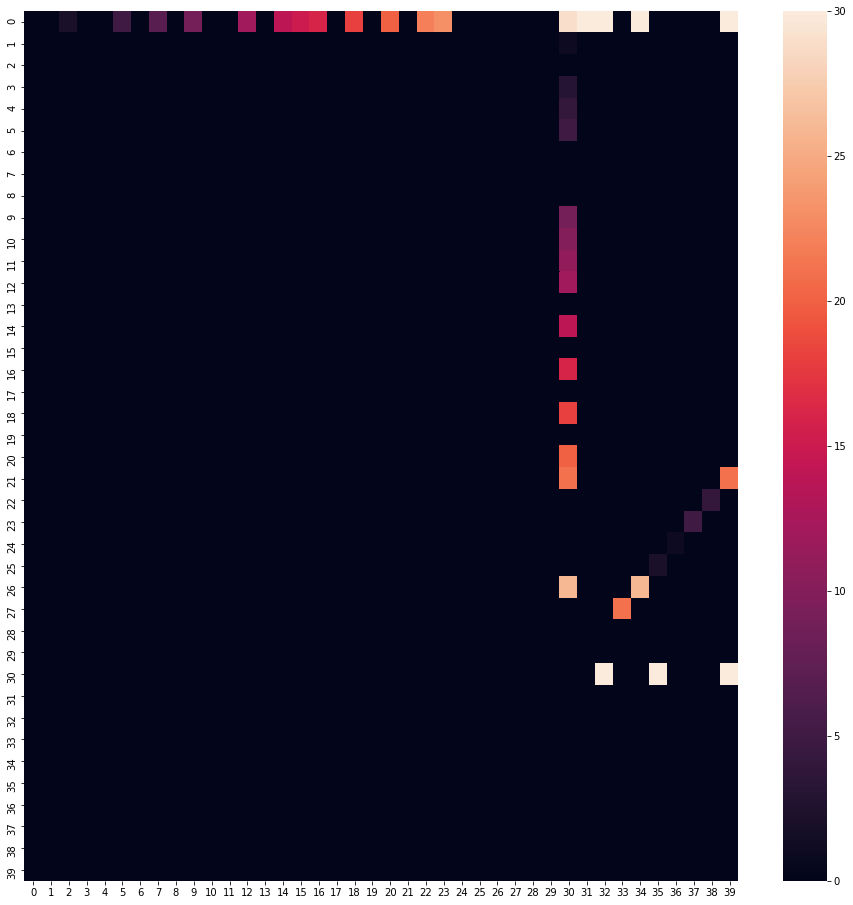

In [297]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
np.savetxt("f1_matrix.csv", result_matrix[:,:,0], delimiter=",")
sns.heatmap(result_matrix[:,:,0])
plt.savefig("f1_matrix.png")

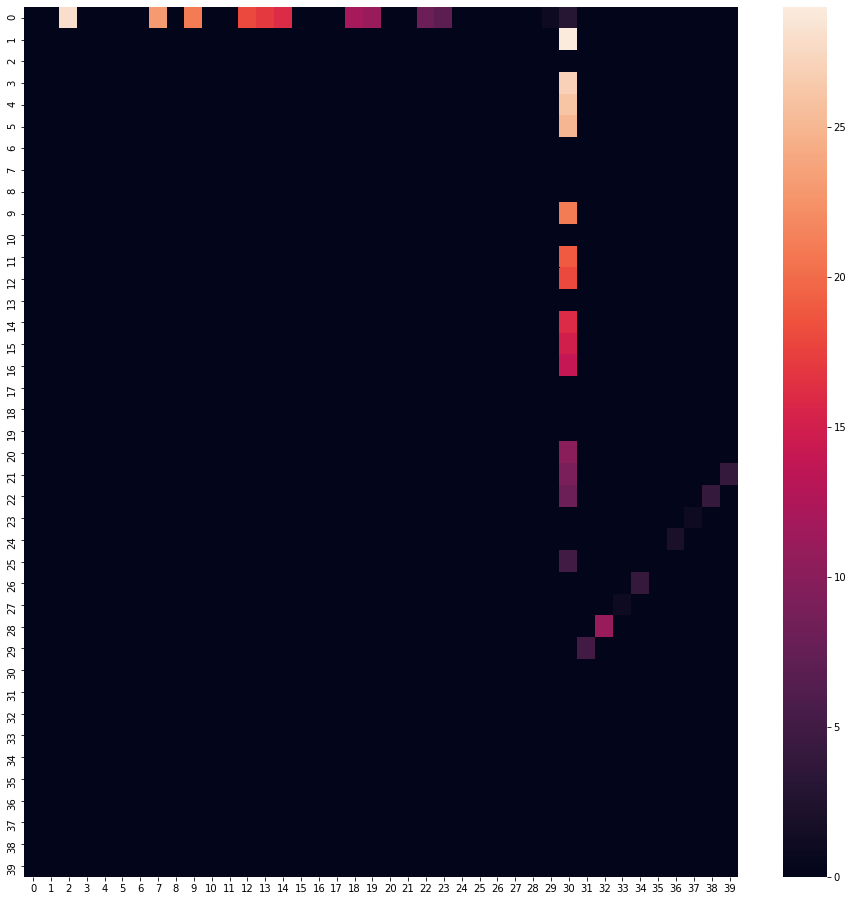

In [299]:
plt.figure(figsize=(16,16))
np.savetxt("f2_matrix.csv", result_matrix[:,:,1], delimiter=",")
sns.heatmap(result_matrix[:,:,1])
plt.savefig("f2_matrix.png")

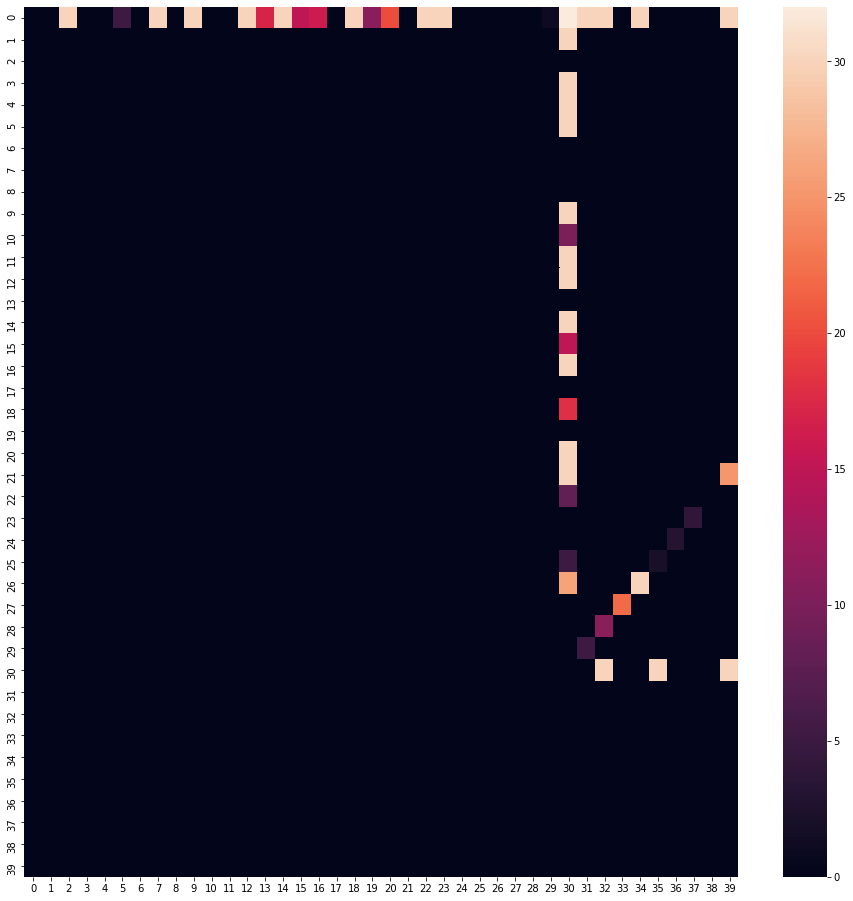

In [301]:
plt.figure(figsize=(16,16))
np.savetxt("fCombone_matrix.csv", result_matrix[:,:,2], delimiter=",")
sns.heatmap(result_matrix[:,:,2])
plt.savefig("fCombone_matrix.png")

In [ ]:
def test_fequence():
    sampling_rate = 30
    y_true = np.argmax( y, axis=2 )
    y_true = np.unique(y_true, axis=0)
    print(y_true.shape)
    for f1, f2 in y_true:
        #print(f1, f2)
        s = np_generate_signal([f1,f2],sampling_rate)
        X_test = X_test.reshape([1,best_timesteps,180//best_timesteps])
        y_pred = best_model.predict(X_test)
        #y_pred = np.array([y_pred_1, y_pred_2]).sort()
        y_pred = np.argmax(y_pred, axis = 2)

In [210]:
a[0]=34
a = np.sort(a, axis=0)
a

[array([[4.46279785e-07, 6.98145494e-14, 2.33478883e-12, 7.59068622e-20,
         4.10294501e-16, 1.62270072e-10, 4.82517455e-12, 5.21158897e-12,
         4.19165657e-12, 1.39542418e-16, 6.73716725e-14, 3.08990538e-14,
         9.99931812e-01, 1.05143193e-10, 4.34227784e-12, 6.71630212e-15,
         9.00853725e-10, 1.10208283e-13, 1.01224469e-13, 1.18029162e-13,
         5.83057803e-21, 5.27000998e-10, 1.95810868e-10, 5.36742387e-11,
         9.63500113e-11, 9.59014552e-13, 1.57186902e-11, 3.35900300e-14,
         6.60254300e-05, 1.60698555e-11, 1.64591756e-06, 3.50081563e-13,
         3.38775342e-20, 1.28500082e-08, 6.53171137e-12, 1.05062436e-13,
         7.94309063e-11, 8.48779380e-10, 1.57507714e-15, 1.51009478e-12]],
       dtype=float32),
 array([[5.0993550e-12, 2.4339555e-10, 1.2016673e-12, 1.5750065e-09,
         3.4357023e-10, 1.2233755e-09, 1.1173384e-10, 3.4300292e-08,
         3.9659378e-09, 2.3780229e-13, 1.6062122e-12, 4.0381773e-09,
         1.6145525e-07, 8.4467748e-09,

In [211]:
a = np.argmax(y_pred, axis = 2)
a

array([[12],
       [33]])

In [216]:
nX= X.numpy()
result_matrix = np.zeros((40,40))
ans = np.zeros([y.shape[0], 2])
pred = np.zeros([y.shape[0], 2])
for i in np.arange(y.shape[0]):
    #a1, a2 = np.argmax(y[i][0]), np.argmax(y[i][1])
    X_test = nX[ 180*i:180*(i+1) ].copy()
    X_test = X_test.reshape([1,best_timesteps,180//best_timesteps])
    
    y_pred = best_model.predict(X_test)
    y_pred_1, y_pred_2 = y_pred[0], y_pred[1]
    #ans[i, :] = [a1,a2]
    #pred[i, :] = [y_pred_1,y_pred_2]
    print(y.shape[0]-i, end="\r")
    

KeyboardInterrupt: 

In [77]:
a = np.zeros((3,2))
a

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [79]:
a[0,:] = [1,2]
a

array([[1., 2.],
       [0., 0.],
       [0., 0.]])

array([[1., 2.],
       [0., 0.],
       [0., 0.]])

In [126]:
def test_fequence2(test_y):
    #test_y = [5,45]
    _test_X = np_generate_signal(test_y,30)
    test_X = tf.reshape(_test_X, [1,3,60])
    test_X = tf.convert_to_tensor(test_X)
    y_pred = best_model.predict(test_X)
    y_pred_1, y_pred_2 = np.argmax(y_pred[0]), np.argmax(y_pred[1])
    #print(y_pred_1, y_pred_2)
    return y_pred_1, y_pred_2

In [27]:
[ for f1,f2 in zip(np.arange(0, 40, 5),np.arange(0, 40, 5))]


SyntaxError: invalid syntax (<ipython-input-27-53dab83e919d>, line 1)

In [29]:
list(zip(np.arange(0, 40, 5),np.arange(0, 40, 5)))

[(0, 0), (5, 5), (10, 10), (15, 15), (20, 20), (25, 25), (30, 30), (35, 35)]

In [10]:
y_pred_1, y_pred_2 = test_fequence([0,0])
print(y_pred_1, y_pred_2)

0 0


In [127]:
df_all = pd.DataFrame([], columns=[["y1", "y2", "y_pred_1", "y_pred_2"]])
for y1 in np.arange(5, 40, 5):
    for y2 in np.arange(40, 0, -5):
        if (y2<y1):
            continue
        y_pred_1, y_pred_2 = test_fequence([y1,y2])
        df = pd.DataFrame([[y1/2, y2/2, y_pred_1/2, y_pred_2/2]], columns=[["y1", "y2", "y_pred_1", "y_pred_2"]])    
        df_all = df_all.append(df)
df_all.to_csv("save/testing-freq-results.csv")

In [12]:
df_all

,y1,y2,y_pred_1,y_pred_2
0,2.5,20.0,2.5,15.0
0,2.5,17.5,2.5,17.5
0,2.5,15.0,0.0,2.5
0,2.5,12.5,2.5,12.5
0,2.5,10.0,2.5,10.0
0,2.5,7.5,2.5,7.5
0,2.5,5.0,2.5,5.0
0,2.5,2.5,2.5,2.5
0,5.0,20.0,14.5,18.0
0,5.0,17.5,5.0,17.5


In [ ]:
y.sh